# Michaelis Menten model

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

__file = r"C:\Users\Victor\Desktop\disertation_2022\experiments\michaelis_menten"

my_path = os.path.abspath(__file)

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [2]:
import os

__file = r"C:\Users\Victor\Desktop\disertation_2022\experiments\michaelis_menten"

my_path = os.path.abspath(__file)

(100, 4)


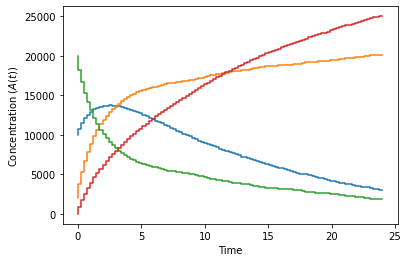

In [4]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

np.random.seed(1)
values = model.simulate(k, times)
print(values.shape)
# print("s = (" + str(len(times)) + ", " + str(model.n_outputs()) + ")")
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.MeanSquaredError(problem)

log_prior = pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()
# plt.savefig(my_path + './michaelis_data.pdf')

# Rejection ABC

In [9]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(7e5)

abc.set_parallel(True)

# set target number of samples
abc.set_n_samples(500)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:07.2
2     16     0.125            0:11.5
3     32     0.15625          0:17.8
20    392    0.0586734694     3:03.6
40    648    0.0709876543     5:10.3
60    1032   0.0668604651     7:30.3
80    1616   0.0587871287    10:48.7
100   1904   0.0619747899    12:26.3
120   2352   0.0599489796    14:58.5
140   2856   0.0581232493    17:42.3
160   3248   0.0584975369    19:58.9
180   3624   0.0587748344    22:37.5
200   4112   0.0578793774    25:55.8
220   4464   0.0582437276    28:08.5
240   4784   0.0597826087    30:10.2
260   5272   0.05823217      33:32.1
280   5792   0.0568024862    36:49.1
300   6232   0.0571245186    39:08.3
320   6584   0.0578675577    40:57.9
340   7056   0.0582482993    43:25.1
360   7568   0.0576109937    46:07.8
380   7928   0.0577699294    48:07.1
400   8312   0.0578681424    50:07.9
cnt_sampled=8584
Halting: target nu

In [10]:
print(len(samples))

500


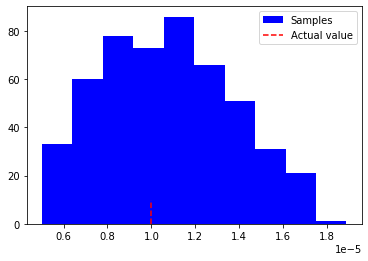

In [11]:

plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

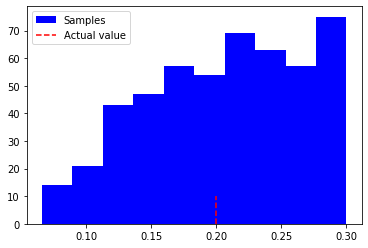

In [12]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

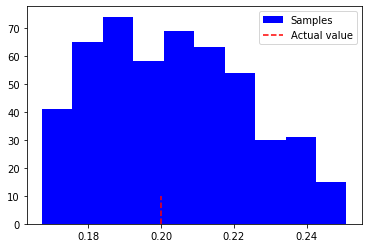

In [13]:
plt.hist(samples[:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC

In [22]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e6, 1e6, 7e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(100)

abc.sampler().set_perturbation_kernel(
    pints.UniformLogPrior([-1e-6, -0.05, -0.1], [1e-6, 0.05, 0.1])
)

# set target number of samples
abc.set_n_samples(1000)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)
abc.set_log_interval(1)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=3000000.0
Iter. Eval. Acceptance rate Time m:s
1     8      0.375            0:05.5
2     16     0.4375           0:09.5
3     24     0.375            0:13.1
4     32     0.375            0:17.1
5     40     0.4              0:20.2
6     48     0.395833333      0:22.9
7     72     0.347222222      0:32.0
8     88     0.306818182      0:38.1
9     96     0.3125           0:41.3
10    104    0.317307692      0:45.4
11    120    0.291666667      0:52.2
12    128    0.296875         0:55.8
13    136    0.294117647      0:58.8
14    152    0.289473684      1:05.4
15    160    0.3              1:08.8
16    168    0.297619047619   1:11.5
17    176    0.306818182      1:14.6
18    184    0.315217391      1:18.2
19    192    0.328125         1:22.8
20    200    0.34             1:26.5
21    208    0.331730769      1:30.8
22    216    0.342592593      1:34.7
23    224    0.334821429      1:38.0
24    232    

In [23]:
samples_flat = np.array([sublist for sublist in samples])

print(len(samples_flat))

1002


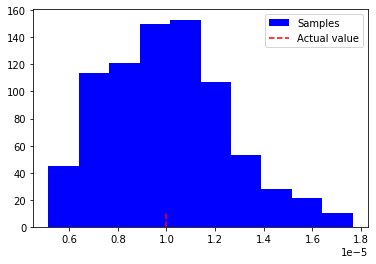

In [24]:
samples_flat = np.array([sublist for sublist in samples])

plt.hist(samples_flat[200:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

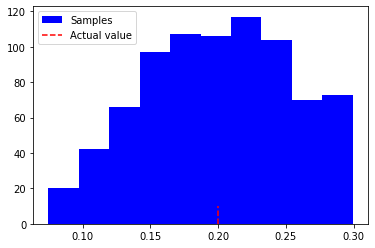

In [25]:
plt.hist(samples_flat[200:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

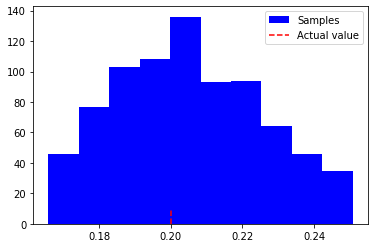

In [26]:
plt.hist(samples_flat[200:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC Original

In [3]:
np.random.seed(1)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e6, 1e6, 7e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(500)

abc.sampler().set_perturbation_kernel(
    pints.UniformLogPrior([-1e-6, -0.05, -0.1], [1e-6, 0.05, 0.1])
)

# set target number of samples
abc.set_n_samples(1500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=3000000.0
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:09.8
2     16     0.1875           0:13.8
3     24     0.166666667      0:17.4
20    176    0.227272727      1:26.9
40    344    0.270348837      2:20.1
60    520    0.246153846      3:16.8
80    680    0.247058824      4:08.0
100   840    0.253571429      5:00.1
120   1000   0.269            5:51.7
140   1184   0.271114865      6:51.7
160   1352   0.276627219      7:47.3
180   1528   0.269633508      8:42.9
200   1704   0.266431925      9:37.7
220   1872   0.264957265     10:30.1
Starting t=1, with threshold=1000000.0
240   2040   0.264215686     11:25.7
260   2216   0.264440433213  12:25.6
280   2392   0.263795987     13:25.3
300   2592   0.259645062     14:33.4
320   2760   0.257971014     15:29.5
340   2936   0.254087193     16:28.6
360   3128   0.250639386     17:31.1
380   3320   0.24939759      18:35.6
400   3528 

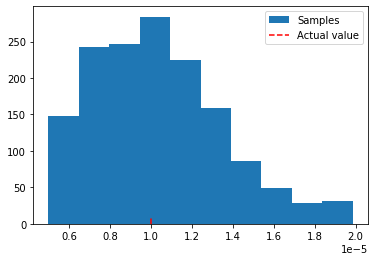

In [4]:
plt.hist(samples[:,0], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

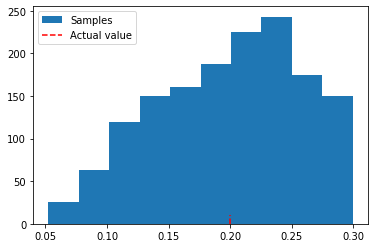

In [7]:
plt.hist(samples[:,1], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

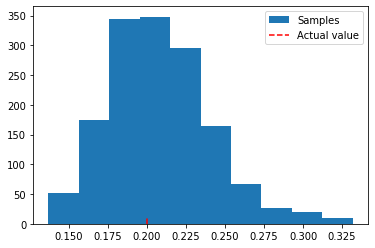

In [8]:
plt.hist(samples[:,2], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Adaptive PMC worse

In [4]:
np.random.seed(0)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(450)

# set p_acc_min
abc.sampler().set_p_acc_min(0.2)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in parallel with 8 worker processess.
w_mean=[1.20423192e-05 1.79144917e-01 2.43430531e-01]
resulting var=[[ 3.94561310e-11  5.94752357e-08 -3.93439210e-08]
 [ 5.94752357e-08  1.05940217e-02  1.73395399e-03]
 [-3.93439210e-08  1.73395399e-03  1.35545920e-02]]
epsilon=14060447.655000001
w_mean=[1.21787992e-05 1.72247623e-01 2.59267248e-01]
resulting var=[[ 2.99943276e-11 -4.68985185e-08 -1.54685121e-07]
 [-4.68985185e-08  9.21788245e-03  2.23662399e-03]
 [-1.54685121e-07  2.23662399e-03  1.22463870e-02]]
epsilon=11422789.235
w_mean=[1.16968185e-05 1.87203346e-01 2.51446127e-01]
resulting var=[[ 3.23630268e-11 -8.09323520e-08 -2.39099369e-07]
 [-8.09323520e-08  9.55645893e-03  3.67230523e-03]
 [-2.39099369e-07  3.67230523e-03  1.13827959e-02]]
epsilon=9547663.9975
w_mean=[1.20626138e-05 1.93792711e-01 2.48670100e-01]
resulting var=[[ 3.84495587e-11 -2.81345750e-08 -3.55596590e-07]
 [-2.81345750e-08  8.34226639e-03  2.87651161e-03]
 [-3.55596590e-

# Adaptive PMC

In [16]:
np.random.seed(0)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(450)

# set p_acc_min
abc.sampler().set_p_acc_min(0.1)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in parallel with 8 worker processess.
w_mean=[1.20423192e-05 1.79144917e-01 2.43430531e-01]
resulting var=[[ 3.94561310e-11  5.94752357e-08 -3.93439210e-08]
 [ 5.94752357e-08  1.05940217e-02  1.73395399e-03]
 [-3.93439210e-08  1.73395399e-03  1.35545920e-02]]
epsilon=14060447.655000001
w_mean=[1.21787992e-05 1.72247623e-01 2.59267248e-01]
resulting var=[[ 2.99943276e-11 -4.68985185e-08 -1.54685121e-07]
 [-4.68985185e-08  9.21788245e-03  2.23662399e-03]
 [-1.54685121e-07  2.23662399e-03  1.22463870e-02]]
epsilon=11422789.235
w_mean=[1.16968185e-05 1.87203346e-01 2.51446127e-01]
resulting var=[[ 3.23630268e-11 -8.09323520e-08 -2.39099369e-07]
 [-8.09323520e-08  9.55645893e-03  3.67230523e-03]
 [-2.39099369e-07  3.67230523e-03  1.13827959e-02]]
epsilon=9547663.9975
w_mean=[1.20626138e-05 1.93792711e-01 2.48670100e-01]
resulting var=[[ 3.84495587e-11 -2.81345750e-08 -3.55596590e-07]
 [-2.81345750e-08  8.34226639e-03  2.87651161e-03]
 [-3.55596590e-

In [17]:
print(len(samples))

500


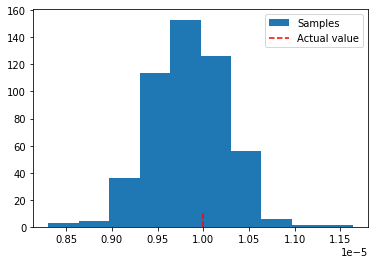

In [28]:
plt.hist(samples_adapt_pmc[:, 0], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

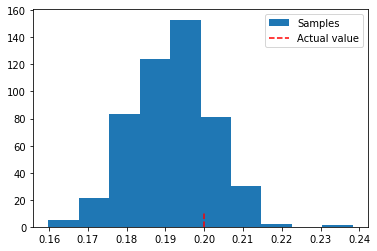

In [27]:
plt.hist(samples_adapt_pmc[:, 1], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

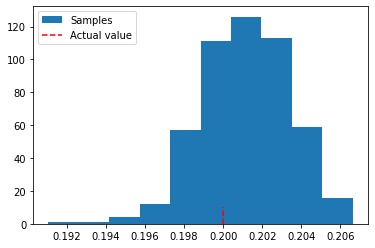

In [26]:
plt.hist(samples_adapt_pmc[:, 2], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC High accuracy

In [5]:
np.random.seed(1)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e6, 9e5, 5e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(500)

abc.sampler().set_perturbation_kernel(
    pints.UniformLogPrior([-1e-6, -0.05, -0.1], [1e-6, 0.05, 0.1])
)

# set target number of samples
abc.set_n_samples(1500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=3000000.0
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:05.0
2     16     0.1875           0:08.1
3     24     0.166666667      0:11.3
20    176    0.227272727      1:11.8
40    344    0.270348837      2:15.1
60    520    0.246153846      3:23.0
80    680    0.247058824      4:28.6
100   840    0.253571429      5:32.6
120   1000   0.269            6:42.7
140   1184   0.271114865      7:55.1
160   1352   0.276627219      8:58.3
180   1528   0.269633508     10:03.6
200   1704   0.266431925     11:11.8
220   1872   0.264957265     12:14.8
Starting t=1, with threshold=900000.0
240   2040   0.262254902     13:19.1
260   2224   0.259442446     14:18.6
280   2400   0.2575          15:16.3
300   2608   0.251150307     16:25.3
320   2784   0.248563218     17:21.0
340   2984   0.243297587     18:26.0
360   3200   0.2390625       19:34.2
380   3416   0.236241218     20:44.0
400   3624  

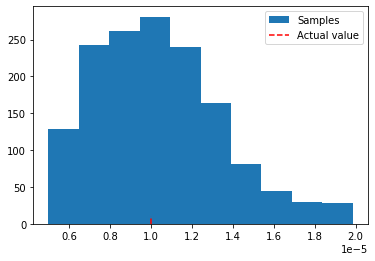

In [34]:
plt.hist(samples[:, 0], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

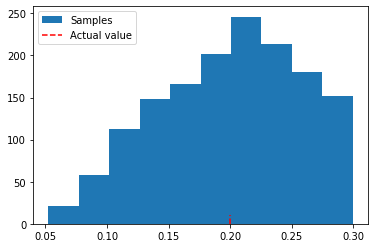

In [31]:
plt.hist(samples[:, 1], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

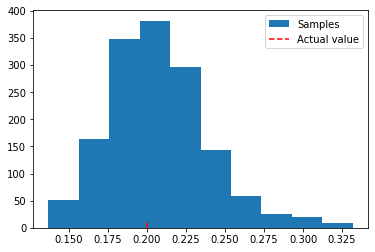

In [32]:
plt.hist(samples[:, 2], label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# SGLD Hamiltonian

In [3]:
from scipy.stats import multivariate_normal

class ActuallySyntheticLikelihood:
    def __init__(self, y, eps):
        y = np.array(y)
        if len(y.shape) == 1:
            self._y = np.array([y])
        else:
            self._y = np.array(y)
        self._eps = eps
        self._eps = np.diag(np.square(self._eps))

    def pdf(self, vals):   
        # estimate mean
        t_mean = np.zeros((len(self._y), len(self._y[0][0])))
        
        # vals[i] = the i-th datapoint
        # vals[i][j] = the population at time t[j]
        for j in range(len(self._y)):
            for i in range(len(vals)):
                t_mean[j] += vals[i][j]
            t_mean[j] /= (len(vals))
        
        t_cov = np.zeros( (len(self._y), len(self._y[0][0]), len(self._y[0][0])) )
        

        # t_cov[i] = covariance matrix for time i
        for i in range(len(self._y)):
            for j in range(len(vals)):
                one_t = np.array([vals[j][i] - t_mean[i]])
                t_cov[i] += one_t * np.transpose(one_t)
                # if (i == 0):
                #     print("i = " + str(i) + ", j = " + str(j))
                #     print("vals[j][i] = " + str(vals[j][i]))
                #     print("t_mean="+str(t_mean[i]))
                #     print("one_t = " + str(one_t))
                #     print("tcov[i]=" + str(t_cov[i]))
            
            t_cov[i] /= (len(vals) - 1)
            # print("t_cov[i] = " + str(t_cov[i]))
            # print("eps = " + str(self._eps))
            t_cov[i] += self._eps
            
        # print("t_cov=")
        # print(t_cov)
        rez = 0

        for i in range(len(self._y)):
            # print("t_cov[i]=" + str(t_cov[i]))
            # print("t_mean[i] = " + str(t_mean[i]))
            # print("y[i] = "+ str(self._y[i]))
            rez += (multivariate_normal.pdf(self._y[i], mean=t_mean[i], cov=t_cov[i]))


        rez = np.log(rez)
        return rez

In [7]:
class HABCsgld:
    def __init__(self, T, theta0, m, eps, s_eps, log_prior, sim_f, c, y):
        self._T = T
        self._theta0 = theta0
        self._dim = len(theta0)
        self._m = m
        self._eps = eps
        self._c = c
        self._cnt = 0
        self._mean = np.zeros(self._dim)
        
        # Functions
        self._log_prior = log_prior
        self._grad_prior = self.grad_pr 
        self._sim_f = sim_f
        self._cnt_samples = 0
        
        # Build synthetic likelihood
        self._synt_l = ActuallySyntheticLikelihood(y, s_eps)
        
        self._grads = []
    
    def grad_pr(self, theta):
        x, dx = self._log_prior.evaluateS1(theta)
        return dx
    
    def spsa(self, theta, d_theta, S, R):
        self._grads = None
        if (len(theta.shape) > 1):
            dim = len(theta[0])
        else:
            dim = len(theta)
        g = np.zeros(dim)
        
        for r in range(R):
            # Generate bernoulli distribution vector
            delta = np.zeros(dim)
            for i in range(dim):
                delta[i] = (2 * np.random.binomial(n=1, p=0.5) - 1)
            
            
            set_plus = None
            set_minus = None
            
            aux = 0
            
            for s in range(S):
                x_plus = self._sim_f(theta + d_theta * delta)
                x_minus = self._sim_f(theta - d_theta * delta)
                self._cnt_samples += 2
                
                if len(x_plus.shape) == 1:
                    x_plus = [[x] for x in x_plus]
                if len(x_minus.shape) == 1:
                    x_minus = [[x] for x in x_minus]
                    
                if set_plus is None:
                    set_plus = [x_plus]
                    set_minus = [x_minus]
                else:
                    set_plus.append(x_plus)
                    set_minus.append(x_minus)
            
            l_plus = self._synt_l.pdf(set_plus)
            l_minus = self._synt_l.pdf(set_minus)
            term = (l_plus - l_minus) * delta
            g += term

        g = ( 1 / (2 * d_theta * R) ) * g
        
        grad_val = self.grad_pr(theta)
        # if len(grad_val.shape) > 1:
            # grad_val = grad_val[0]
        g += np.exp(grad_val)
        
        return -g
        
    def run(self):
        # Initialize stuff
        self._results = [self._theta0]
        
        for t in range(1, self._T):
            done = False
            
            while not done:
                # Resample momentum
                
                curr_theta = self._results[t-1]
                curr_momentum = np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim))
                
                i = 0
                problem = False
                
                while not problem and i <= self._m:
                    spsa_term = self.spsa(curr_theta, 1e-5, S=2, R=1)
                    ran_term = np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim))
                    next_theta = curr_theta + self._eps * np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim)) - \
                                 (self._eps ** 2) / 2 * spsa_term
                        
    #                     print("spsa_term=" + str(spsa_term * self._eps))
    #                     print("second term=" + str(self._eps * self._C * curr_momentum))
    #                     print("third term=" + str(np.random.multivariate_normal(np.zeros(self._dim), 2 * self._eps * (self._C - self._B))))
    #                     print("next_theta="+str(next_theta))
    #                     print("next_momentum="+str(next_momentum))
                    curr_theta = next_theta
                    if self._log_prior(curr_theta) == np.NINF:
                        print("FAILED with next_theta=" + str(next_theta))
                        problem = True
                    i = i + 1
                if not problem:
                    done = True
                    self._results.append(curr_theta)
            print("t= " + str(t) + ", " + "curr_theta =" + str(curr_theta))
        
        print("count samples = "+str(self._cnt_samples))
        return self._results

In [10]:
np.random.seed(1)

y = np.array([[x] for x in values])

theta0 = np.array([8e-6, 0.2, 0.3])

def grad_prior(theta):
    x, dx = log_prior.evaluateS1(theta)
    return dx

# Simulating function
def sim_f(theta):
#     print("trying " + str(theta))
    if len(theta.shape) == 2:
        theta = theta[0]
#     print("in the end we have " + str(theta))
    return model.simulate(theta, times)

abc = HABCsgld(500, theta0, 1, np.array([2e-6, 0.05, 0.05]), np.array([0.1, 0.1, 0.1, 0.1]), log_prior, sim_f, 0.001, y)

[5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4]
print("abc started")

results = abc.run()

print("abc finished")
print(results)

abc started
t= 1, curr_theta =[1.05786990e-05 1.79157933e-01 3.47252687e-01]
t= 2, curr_theta =[1.57501423e-05 2.66021582e-01 2.49226896e-01]
FAILED with next_theta=[2.06812371e-05 4.24415360e-01 2.98257763e-01]
t= 3, curr_theta =[1.47249821e-05 2.67743409e-01 2.80100711e-01]
FAILED with next_theta=[2.02096800e-05 2.58244350e-01 3.52214079e-01]
FAILED with next_theta=[1.15113111e-05 3.55654289e-01 2.64987220e-01]
FAILED with next_theta=[1.62340781e-05 3.40972823e-01 2.39376605e-01]
t= 4, curr_theta =[1.39204580e-05 1.69438978e-01 3.27374627e-01]
t= 5, curr_theta =[1.97600606e-05 1.86160274e-01 2.54649895e-01]
FAILED with next_theta=[2.09725119e-05 2.53234638e-01 3.64449125e-01]
t= 6, curr_theta =[1.87698174e-05 1.81148577e-01 3.00373839e-01]
FAILED with next_theta=[2.05395392e-05 8.45955774e-02 1.74665881e-01]
t= 7, curr_theta =[1.68642240e-05 1.72474341e-01 2.44716110e-01]
t= 8, curr_theta =[1.27640888e-05 1.32146124e-01 2.84626356e-01]
t= 9, curr_theta =[1.49149995e-05 8.70274755e-02

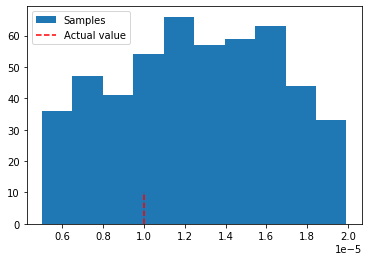

In [11]:
plt.hist(np.array(results)[:, 0], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

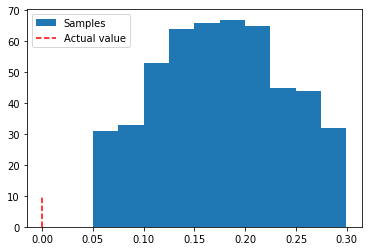

In [12]:
plt.hist(np.array(results)[:, 1], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

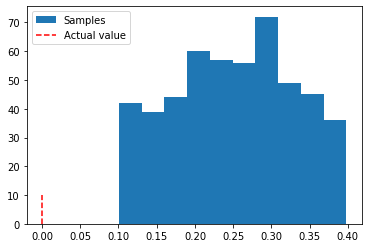

In [13]:
plt.hist(np.array(results)[:, 2], label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Plot KDEs

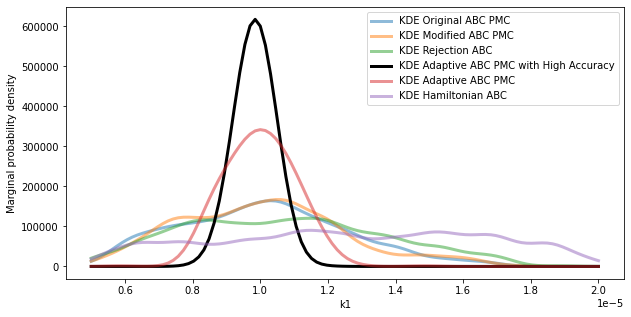

In [13]:
# samples_rej
# samples_adapt_pmc # high accuracy
# samples_pmc_orig
# samples_pmc_mod
# samples_lo_adaptive

pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(5e-6, 2e-5, 100)

band_width = 5e-7
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 0], x_grid, bandwidth=band_width),
            label='KDE Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 0], x_grid, bandwidth=band_width),
            label='KDE Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_rej)[:, 0], x_grid, bandwidth=band_width),
            label='KDE Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adapt_pmc)[:, 0], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_lo_adaptive)[:, 0], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 0], x_grid, bandwidth=band_width),
            label='KDE Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k1")
plt.ylabel("Marginal probability density")
plt.savefig(my_path + './kde_k1.pdf')

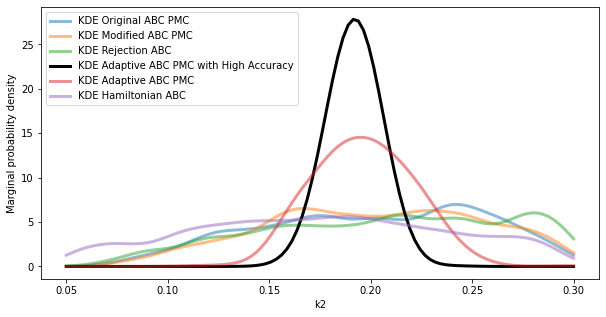

In [14]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(0.05, 0.3, 100)

band_width = 0.01
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 1], x_grid, bandwidth=band_width),
            label='KDE Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 1], x_grid, bandwidth=band_width),
            label='KDE Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_rej)[:, 1], x_grid, bandwidth=band_width),
            label='KDE Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adapt_pmc)[:, 1], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_lo_adaptive)[:, 1], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 1], x_grid, bandwidth=band_width),
            label='KDE Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k2")
plt.ylabel("Marginal probability density")
plt.savefig(my_path + './kde_k2.pdf')

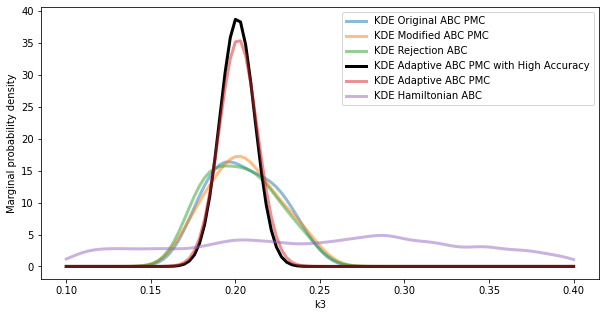

In [15]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(0.1, 0.4, 100)

band_width = 0.01
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 2], x_grid, bandwidth=band_width),
            label='KDE Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 2], x_grid, bandwidth=band_width),
            label='KDE Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_rej)[:, 2], x_grid, bandwidth=band_width),
            label='KDE Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adapt_pmc)[:, 2], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_lo_adaptive)[:, 2], x_grid, bandwidth=band_width),
            label='KDE Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 2], x_grid, bandwidth=band_width),
            label='KDE Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k3")
plt.ylabel("Marginal probability density")
plt.savefig(my_path + './kde_k3.pdf')

# Compute KL-divergence

In [51]:
from scipy import integrate

bw_x = 5e-7
bw_y = 1e-2
bw_z = 1e-2

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def kl_func_x(y, kde_skl):
    part = kde_sklearn(np.array(samples_adapt_pmc)[:, 0], np.array([y]), bandwidth=bw_x)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if part == 0:
        return 0
    elif s_part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

# pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

def kl_div_x(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_x(y, kde_skl)
    return integrate.quad(fun, 5e-6, 2e-5)

def kl_func_y(y, kde_skl):
    part = kde_sklearn(np.array(samples_adapt_pmc)[:, 1], np.array([y]), bandwidth=bw_y)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if s_part == 0 or part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_y(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_y(y, kde_skl)
    return integrate.quad(fun, 0.05, 0.3)

def kl_func_z(y, kde_skl):
    part = kde_sklearn(np.array(samples_adapt_pmc)[:, 2], np.array([y]), bandwidth=bw_z)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if s_part == 0 or part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_z(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_y(y, kde_skl)
    return integrate.quad(fun, 0.1, 0.4)




saved_abc_rej = kl_div_x(np.array(samples_rej)[:, 0], bw_x)[0] + kl_div_y(np.array(samples_rej)[:, 1], bw_y)[0] + kl_div_z(np.array(samples_rej)[:, 2], bw_z)[0]
saved_fake_pmc = kl_div_x(np.array(samples_pmc_mod)[:, 0], bw_x)[0] + kl_div_y(np.array(samples_pmc_mod)[:, 1], bw_y)[0] + kl_div_z(np.array(samples_pmc_mod)[:, 2], bw_z)[0]
saved_orig_pmc = kl_div_x(np.array(samples_pmc_orig)[:, 0], bw_x)[0] + kl_div_y(np.array(samples_pmc_orig)[:, 1], bw_y)[0] + kl_div_z(np.array(samples_pmc_orig)[:, 2], bw_z)[0]
saved_adaptive = kl_div_x(np.array(samples_lo_adaptive)[:, 0], bw_x)[0] + kl_div_y(np.array(samples_lo_adaptive)[:, 1], bw_y)[0] + kl_div_y(np.array(samples_lo_adaptive)[:, 2], bw_z)[0]

s_x = kl_div_x(np.array(samples_hamiltonian)[:, 0], bw_x)[0] 
s_y = kl_div_y(np.array(samples_hamiltonian)[:, 1], bw_y)[0]
saved_hamiltonian = s_x + s_y + kl_div_z(np.array(samples_hamiltonian)[:, 2], bw_z)[0]

print("ABC REJ KL = " + str(saved_abc_rej))
print("MOD PMC KL = " + str(saved_fake_pmc))
print("ORIG PMC KL = " + str(saved_orig_pmc))
print("ADAPTIVE KL = " + str(saved_adaptive))
print("HAMILTONIAN KL = " + str(saved_hamiltonian))

ABC REJ KL = 2.7237994169842903
MOD PMC KL = 2.4015372079471415
ORIG PMC KL = 2.7548789601251995
ADAPTIVE KL = 0.9704391879823784
HAMILTONIAN KL = 4.38865243006842


# Save samples

In [14]:
samples_rej = samples

In [15]:
print(samples_rej.tolist())

[[9.41430243370637e-06, 0.23409265212622238, 0.2496671667236873], [9.108555593921391e-06, 0.21643886596537687, 0.22267829408385303], [5.796449062547489e-06, 0.09273983536383625, 0.1834908261719964], [1.0811753749927e-05, 0.2238757530528287, 0.21360571646909685], [1.544517675718868e-05, 0.25324439631959667, 0.18803201671008263], [8.639249568716468e-06, 0.11338634209821398, 0.19441062878400273], [1.5198281130155406e-05, 0.225554864329661, 0.17944007158057723], [1.5314046816003727e-05, 0.2999447992183642, 0.20414382654438926], [1.437781432009377e-05, 0.22831822304972538, 0.18870494333993082], [8.442089551645313e-06, 0.2026089348045188, 0.2136092691196814], [5.839652256681469e-06, 0.08865107883817154, 0.21804193508129105], [9.968571001816712e-06, 0.21750065840997596, 0.24111939605312618], [9.75167328528877e-06, 0.15939932698129328, 0.21196951954465865], [7.1558885428115225e-06, 0.12245476813748436, 0.21608742782993468], [7.979950492224588e-06, 0.12163020054632177, 0.2114140383946876], [1.3

In [5]:
samples_rej = [[9.41430243370637e-06, 0.23409265212622238, 0.2496671667236873], [9.108555593921391e-06, 0.21643886596537687, 0.22267829408385303], [5.796449062547489e-06, 0.09273983536383625, 0.1834908261719964], [1.0811753749927e-05, 0.2238757530528287, 0.21360571646909685], [1.544517675718868e-05, 0.25324439631959667, 0.18803201671008263], [8.639249568716468e-06, 0.11338634209821398, 0.19441062878400273], [1.5198281130155406e-05, 0.225554864329661, 0.17944007158057723], [1.5314046816003727e-05, 0.2999447992183642, 0.20414382654438926], [1.437781432009377e-05, 0.22831822304972538, 0.18870494333993082], [8.442089551645313e-06, 0.2026089348045188, 0.2136092691196814], [5.839652256681469e-06, 0.08865107883817154, 0.21804193508129105], [9.968571001816712e-06, 0.21750065840997596, 0.24111939605312618], [9.75167328528877e-06, 0.15939932698129328, 0.21196951954465865], [7.1558885428115225e-06, 0.12245476813748436, 0.21608742782993468], [7.979950492224588e-06, 0.12163020054632177, 0.2114140383946876], [1.317780834593924e-05, 0.2472360837512561, 0.19998136657716173], [1.2692790249601088e-05, 0.28657152603828334, 0.21116222303456345], [8.312787251091274e-06, 0.20278710929413973, 0.21180064768123694], [5.516950765968384e-06, 0.13181855925736202, 0.22186189615730353], [1.1177553458270016e-05, 0.19772530582603048, 0.1773312679905884], [8.829526709520047e-06, 0.15074582104693113, 0.21912110997332107], [1.7263076002149927e-05, 0.2831270036683334, 0.18721949424543174], [1.3292126996841168e-05, 0.2693968429466683, 0.17894800231417435], [1.349871070695787e-05, 0.2257337151924932, 0.20905833109236116], [8.40667103831893e-06, 0.23959688406552004, 0.2395440186256764], [1.2364241172349112e-05, 0.17849485284860522, 0.17388948522579029], [7.65398042157105e-06, 0.18169579816536224, 0.2078802499341035], [7.96012811914595e-06, 0.15378564097039266, 0.1984860712843966], [1.2175280354429887e-05, 0.27294625542438067, 0.23636894676988124], [8.454749264257569e-06, 0.14825582896677092, 0.20115205670010455], [1.4830844465193789e-05, 0.2239627265550172, 0.19038845469024462], [1.2781958085492949e-05, 0.2884015746485563, 0.20228338441437899], [7.524954816296342e-06, 0.10850511003330345, 0.21207789006346212], [1.0767365496586447e-05, 0.173659191474004, 0.18447377583985097], [1.3877569890237488e-05, 0.2800135638000598, 0.20808278829804444], [1.2918885916653104e-05, 0.2813667994025911, 0.2241526185227491], [1.0733789139796322e-05, 0.24099347054355402, 0.20801323134864022], [1.539633535567526e-05, 0.2853445247321061, 0.19025998284047851], [1.5885704769190118e-05, 0.2943710938254422, 0.1922228722423301], [8.424869641819854e-06, 0.22452917278305184, 0.2465410259924418], [7.24953806749501e-06, 0.11650306460147668, 0.21047022588692144], [1.1634289255985308e-05, 0.27867297046233214, 0.20358636461159912], [9.322507633229634e-06, 0.25290439211324767, 0.22033979452185137], [1.0585926783124638e-05, 0.2164233937896735, 0.20037500182819432], [1.2859509060308433e-05, 0.28883879578464866, 0.18519363852553836], [7.449105858980617e-06, 0.13503731076128334, 0.20579837448609822], [6.912344818402753e-06, 0.09356127384112563, 0.18370717694429395], [7.363708346888714e-06, 0.15965045958435342, 0.22593513303662394], [1.3756369936223688e-05, 0.26240997514025327, 0.17776254264748018], [6.26474881739371e-06, 0.07464615920291733, 0.18341700357354446], [7.0029007192417085e-06, 0.160294811494042, 0.24507922240169341], [1.4163748024751345e-05, 0.2477392356766796, 0.21670573791203934], [1.3441148120506622e-05, 0.237801612828771, 0.18291288248633658], [5.432728978942653e-06, 0.09299839468169853, 0.20936692609056107], [1.4070184966507777e-05, 0.2558378682668478, 0.19408080824683605], [1.2145553619325955e-05, 0.24792401187819502, 0.22238981680666658], [1.0273835911924635e-05, 0.19321588718972266, 0.2047060410989237], [7.755845309810189e-06, 0.15036170606207921, 0.22881648488493966], [1.0421362455724167e-05, 0.2771698499628371, 0.21282982902811856], [7.93993599363781e-06, 0.15988593326376505, 0.2031590356589429], [9.271368893536096e-06, 0.11697201400111028, 0.18189937038553128], [9.183193628776197e-06, 0.15411059492155527, 0.17107359026182634], [9.412553413037589e-06, 0.16997172284609408, 0.22850952934225688], [7.17541115729485e-06, 0.16953916740626296, 0.2234188309539145], [6.343984228459844e-06, 0.14996096494311567, 0.2259307656966974], [1.1444206219431225e-05, 0.18880873461212988, 0.18322011299535748], [1.0623277740592752e-05, 0.1586776270610395, 0.17969663556577253], [6.732695165693228e-06, 0.16138872370438373, 0.23515891370648595], [1.1068317856557145e-05, 0.2614148424291732, 0.19203584926652262], [1.5173245409260495e-05, 0.23800087541142506, 0.17573601387258142], [9.331842646666557e-06, 0.21977177276622656, 0.21230022694871323], [7.195196882108542e-06, 0.14645249838797625, 0.18385211992335132], [8.561324046687019e-06, 0.1678994967012738, 0.22170586374952625], [1.0825442818002554e-05, 0.24669575798704552, 0.1839625865995656], [1.2590247615673615e-05, 0.2216137249887697, 0.20404729772806238], [1.1936186918408258e-05, 0.2272122044989917, 0.18477002134170506], [1.0729261380752554e-05, 0.23822412795261172, 0.20057133890233875], [1.3221290217690552e-05, 0.22552423388261805, 0.18539801137608458], [7.152851935422891e-06, 0.12844425822772143, 0.1933894806550578], [8.246609854422759e-06, 0.19176628577214938, 0.23751940030532567], [9.678464459040616e-06, 0.1286334891387314, 0.18285105772610916], [1.5361609260721003e-05, 0.27213015215537406, 0.19762437424979903], [6.801988381470838e-06, 0.1356892970932258, 0.20362280872368127], [1.4283568490270499e-05, 0.2130240797485719, 0.18980503697060924], [5.259288635589101e-06, 0.065820851782163, 0.1896644915187744], [1.0185834785087517e-05, 0.25157075364877773, 0.1996862794451436], [7.808805898623941e-06, 0.1506129913467888, 0.2002515133958872], [9.142776346928125e-06, 0.13698306724911857, 0.1996018964965287], [9.071173362947448e-06, 0.19507532765420116, 0.23469773101610733], [1.0874093495591983e-05, 0.17602979585626205, 0.1673577822787275], [1.1581780479943745e-05, 0.28620907610951585, 0.24725328459519294], [1.1220264155915452e-05, 0.2934054731934156, 0.21894331824244717], [8.579668832357494e-06, 0.22848911047483905, 0.24528210966131594], [9.927354321452222e-06, 0.1820655491203138, 0.1738537539402587], [1.7168002276948485e-05, 0.2897222804204391, 0.1885631629972231], [1.3553039817206756e-05, 0.22038802248679662, 0.18750281592691742], [1.6560045243495478e-05, 0.27908432478540657, 0.1920518793653157], [7.616409029640019e-06, 0.1828310306632342, 0.24172262141335676], [1.4604896430442183e-05, 0.2229955026243866, 0.19602919311112682], [9.035486563251716e-06, 0.18405587929149797, 0.23364388278099546], [1.1960898914463914e-05, 0.17553892735724747, 0.19228006406913234], [1.3556124312454394e-05, 0.27494695864639157, 0.20658727761320855], [1.1283940300789202e-05, 0.29359198543102066, 0.232454247709085], [7.0513622928231915e-06, 0.09402746435973254, 0.18854437263855645], [7.389935105115689e-06, 0.14956835556087944, 0.22185812347578526], [1.2606755888121709e-05, 0.23152397485850912, 0.2182783603222193], [1.3960495150431756e-05, 0.24970512287189933, 0.1942422917772006], [9.847918709640575e-06, 0.27709830695398885, 0.23620941151331024], [1.380897096773618e-05, 0.29753338342074914, 0.1972374924803077], [1.650759250133253e-05, 0.2969221398102551, 0.1923566441666653], [8.502742449060532e-06, 0.19677556932793638, 0.21856885571140725], [1.1918632482488241e-05, 0.163443197774844, 0.1713987398418158], [7.756875291722614e-06, 0.21917179952070787, 0.23629318310850791], [9.151357952375298e-06, 0.17133409457745902, 0.17262743514957318], [1.703401544026484e-05, 0.2852312447124402, 0.19113553535924338], [6.023678884130055e-06, 0.1387667302103615, 0.20667173973658998], [1.0301003503080393e-05, 0.20003177623984614, 0.20479347852586982], [1.3382858958875993e-05, 0.27386986757122667, 0.18513766920688818], [6.948454722862593e-06, 0.1515253370562205, 0.2237770938476173], [9.306949921428833e-06, 0.25971896522223875, 0.23823578859007907], [9.231362553632485e-06, 0.18251188020220666, 0.22462652021629076], [1.0424141888506136e-05, 0.2924217605081999, 0.24550743611343898], [1.6507249196995734e-05, 0.2744849400451038, 0.17461547508409447], [1.1446938212492734e-05, 0.19079785587424863, 0.18317017105090927], [1.1154393635436026e-05, 0.17137658121882443, 0.17322976323455275], [5.475188945920318e-06, 0.0762978739719745, 0.17724234662692573], [8.464035150605205e-06, 0.18259525886607125, 0.1873156835993055], [1.4577812963594063e-05, 0.23789527724423049, 0.17085411956585556], [1.0031879771901257e-05, 0.2455950772645556, 0.2139610415775363], [1.3106482349687017e-05, 0.24818103886193082, 0.2074395838979788], [1.6539934789920277e-05, 0.273166181324029, 0.19933280555298494], [1.2922127049174355e-05, 0.2756943488123139, 0.20825338968583096], [8.083718475611549e-06, 0.17149605348771674, 0.20366420176855188], [9.17885147594955e-06, 0.1603993564364512, 0.18852733795577], [9.540796201799488e-06, 0.2163639787097691, 0.1880278123970554], [1.1587131442202923e-05, 0.29066647802706547, 0.22340720551530396], [1.1509711375225768e-05, 0.19315415544131448, 0.1853358710296601], [1.521089731611163e-05, 0.2694333678296042, 0.20585416950039742], [1.3228005910784563e-05, 0.29606278089491633, 0.22507974884755397], [1.023919086777686e-05, 0.1477181259818942, 0.1974077988303405], [5.522995765011368e-06, 0.07775284752066684, 0.17484070802142213], [1.0579108422037929e-05, 0.20643425802956894, 0.19659169585419164], [1.4155909765174974e-05, 0.2520392783050033, 0.2043341521648657], [1.2245011843268891e-05, 0.21522159920147738, 0.17290786183500992], [7.620744171731682e-06, 0.17687175476021244, 0.23689549413595173], [9.154615692685489e-06, 0.12342424096749278, 0.17964614918420974], [7.3261358164318635e-06, 0.11319901606406595, 0.1745928248251656], [1.708871636097038e-05, 0.2914963185268742, 0.19957499897668401], [6.494273916586783e-06, 0.1154496086084701, 0.21096423992641328], [1.504663895230948e-05, 0.2333224266318752, 0.18521891496400322], [1.583876157207686e-05, 0.28034887249549445, 0.21120236426895908], [1.1510876222856672e-05, 0.29444856177154277, 0.21139291257030696], [1.4423153714435756e-05, 0.28716460670481103, 0.21000813458486203], [7.850936051075387e-06, 0.2058856016511159, 0.23912471399457988], [1.4688642638700706e-05, 0.23861534421017006, 0.17643651947377056], [1.0937722183824041e-05, 0.21648106346029133, 0.1773503548552795], [1.0767971549899427e-05, 0.2860964569618671, 0.23044123001458036], [8.955817785356334e-06, 0.19060831243393894, 0.1990076274431035], [9.721466842878077e-06, 0.26928216693102414, 0.22762393551430074], [8.439452397427242e-06, 0.22380441340553736, 0.2012058977074512], [1.2570472316440946e-05, 0.24158562603929762, 0.1954831673180453], [1.560107811286193e-05, 0.2657514576322519, 0.17711632302586894], [9.834642014898307e-06, 0.21783493407970772, 0.19120312397780842], [1.5247605308807467e-05, 0.23706898052060277, 0.18453201905954908], [9.527051361818665e-06, 0.20458890747691738, 0.2392595956068632], [1.1879557147957724e-05, 0.26245292826105543, 0.2295753883022359], [1.0430242935651983e-05, 0.2510739752178178, 0.21945353293815817], [9.667276880782003e-06, 0.2574527201591535, 0.25084957468107527], [8.801296452547307e-06, 0.1951319396887798, 0.24107085591669314], [1.22112349936571e-05, 0.2729148744442823, 0.2270778016188093], [1.3026487807026767e-05, 0.2504083378488378, 0.17871492963063362], [1.1649082049095189e-05, 0.16639546048328124, 0.17366179275566224], [8.586843710939987e-06, 0.14886625515835267, 0.1925202992596185], [7.684210340612937e-06, 0.11864741418950199, 0.1899396996221348], [8.159138365068475e-06, 0.23203690192267207, 0.24874858135105118], [1.3913421898932454e-05, 0.267186804658866, 0.20850489736148017], [8.047216753311349e-06, 0.13495411906017962, 0.1814146712681215], [9.560169714248534e-06, 0.26219072641019947, 0.24316673616795775], [9.897167972051602e-06, 0.2624683133800483, 0.20364682331065412], [1.349287511453454e-05, 0.23789732748484704, 0.18126956311085585], [1.0937244240429504e-05, 0.21996658271015002, 0.2165595624213047], [1.0786111534648077e-05, 0.24036645172657328, 0.18881701681466753], [1.1779332844253958e-05, 0.2198854561818731, 0.20484749323999266], [6.2838835800718845e-06, 0.1575411099779001, 0.22284112702164538], [8.811119250962767e-06, 0.20628030352630922, 0.23661729120424072], [1.1458556191307836e-05, 0.16668028687272296, 0.19459746272983441], [1.639248474557342e-05, 0.2832530545011117, 0.1920558878642826], [6.957880010326299e-06, 0.15655018204666937, 0.20608095342613791], [7.439973867071013e-06, 0.16510645442699862, 0.24474327306027402], [1.8875102602948915e-05, 0.2948032669079714, 0.18327325544310163], [1.648838793755452e-05, 0.2778442410997188, 0.20346775700709657], [1.3236617069040786e-05, 0.17878208207376306, 0.1820894828856653], [1.2855261904273423e-05, 0.22784040097129554, 0.18481671074648953], [1.453778717185201e-05, 0.28674530354041905, 0.1814534528690817], [1.3752813356158757e-05, 0.28039381123262125, 0.18614386719492315], [1.428003380063016e-05, 0.2044383621642763, 0.1810620976248748], [6.268289114332003e-06, 0.10795618127101998, 0.17515793835529891], [7.301352388409333e-06, 0.15186580273914185, 0.23453400802013807], [8.421944102107443e-06, 0.21298463501367582, 0.20463821165115145], [1.4989027041400025e-05, 0.25274233370935656, 0.18770453084933758], [6.506895743537733e-06, 0.16533934158449115, 0.23374294889815594], [1.1243050045718037e-05, 0.2266675060864533, 0.21018462671208132], [1.2117470946416812e-05, 0.2532372422822003, 0.23578007798977854], [1.3909358679624076e-05, 0.2668349830671823, 0.17988519505094527], [8.988023440493632e-06, 0.2124656218374501, 0.19468962258172234], [9.250831204259455e-06, 0.1825190519904809, 0.19459100675338437], [7.704099834524412e-06, 0.154734088645873, 0.2288012510949604], [7.357036966081034e-06, 0.14166586240369367, 0.21970896199527218], [8.441661931541639e-06, 0.21220927770631626, 0.2213534405541103], [8.606035418514864e-06, 0.18431223029379756, 0.19577824602331528], [8.345070063382005e-06, 0.164551457232249, 0.2043402764430537], [6.667468500535357e-06, 0.08185319048728347, 0.1913406540183103], [9.102600127482407e-06, 0.186158529750044, 0.18184919866211546], [5.315697981948721e-06, 0.11567391578008977, 0.2132461007418244], [1.2010850368545689e-05, 0.2434961009221342, 0.1913085456827806], [1.4261964444942004e-05, 0.260499130722646, 0.21508515297109373], [1.291589733932344e-05, 0.23594318417808846, 0.2092420789727446], [1.4195887491592178e-05, 0.2467266472861172, 0.17802582004265638], [7.244401136276347e-06, 0.17938107523692653, 0.24718323028703867], [1.3430933935592052e-05, 0.18757092059837704, 0.18471340649405815], [6.355862507989703e-06, 0.08398612273146507, 0.17324839308050757], [1.0642674760432219e-05, 0.22211568658042657, 0.21844472699833828], [1.5440430399126896e-05, 0.2955338789236364, 0.19763053554631294], [1.2998283576233848e-05, 0.2535457091836416, 0.18759872984218545], [1.6889542498245654e-05, 0.27435920629291777, 0.18190693338370093], [5.454490432551584e-06, 0.10574269032691973, 0.2248218524452856], [6.7543752991944105e-06, 0.08855462902869594, 0.18171939946224355], [1.4600440303547117e-05, 0.2842498013312452, 0.20841749212163643], [7.055642309248716e-06, 0.14320442066107153, 0.20363901352489314], [5.366953003105606e-06, 0.12245456269445255, 0.225424345691854], [1.2329523158857811e-05, 0.23594923917870336, 0.17257040919669053], [1.1446229126900902e-05, 0.18430970263628238, 0.1881282978322809], [1.0383185518402946e-05, 0.21468322231184184, 0.22460540268490803], [6.62309209808366e-06, 0.13462787881226912, 0.21564565165723013], [8.314648531772286e-06, 0.13919926425104306, 0.22013196924461828], [1.2371259749323596e-05, 0.24090264394147243, 0.20666953173162333], [6.214053132142088e-06, 0.07578777517584072, 0.18179297742524891], [1.4788221467612734e-05, 0.2794936381123035, 0.209196269166347], [1.1975669436172416e-05, 0.24172282735247907, 0.21791086609944627], [1.0629099763934445e-05, 0.176643381284385, 0.16872340730354815], [1.4617701764892967e-05, 0.2574269690350101, 0.20039126031108956], [5.0231780357686406e-06, 0.09811486883940108, 0.21765925842034164], [8.050714169951083e-06, 0.1641249275504395, 0.2347694228473242], [1.34866458411422e-05, 0.2094984992804816, 0.17199882924739365], [1.5908376932653798e-05, 0.2954029568363695, 0.211863456041837], [1.2132029074812905e-05, 0.2295458543780341, 0.19212032864106687], [8.809318316290152e-06, 0.1768341974515777, 0.19546283302704845], [1.2016626886769855e-05, 0.29761340381890855, 0.232132543427099], [1.0330021759088666e-05, 0.21119593539109988, 0.21995115725038417], [1.5539864962036753e-05, 0.28014456984767594, 0.2090833793674323], [1.6600155806021063e-05, 0.2763624882910277, 0.1797262152887758], [9.765792677945098e-06, 0.2650133795636877, 0.23460309845460417], [1.1810064856287237e-05, 0.20213959034248313, 0.17791086121239214], [8.675321820425314e-06, 0.17533409948016349, 0.20684062387730762], [1.0625787997335187e-05, 0.14218675568620348, 0.17597710483648082], [1.0365105564395182e-05, 0.19913673651979547, 0.2128372269753229], [1.0930183300154808e-05, 0.23647746546388804, 0.21419653725702775], [1.3680055321016937e-05, 0.20072423911727705, 0.1807422078006916], [9.508906389158946e-06, 0.18463743694212098, 0.20283185866321268], [1.0763581762577994e-05, 0.2199293309971222, 0.1876317810113357], [9.051993382264507e-06, 0.1642360455931945, 0.21520810184211628], [1.3514951344003103e-05, 0.24449277477600734, 0.22249039719448033], [1.62099391354613e-05, 0.2775514361093496, 0.1725182134096554], [8.446778362339326e-06, 0.18380306764858723, 0.20758094434874286], [1.2638679237742267e-05, 0.2958410213155472, 0.2338436336313248], [1.101460914631783e-05, 0.14403146056128385, 0.17690639372627032], [6.927478286501624e-06, 0.14805531942270772, 0.2105942498720717], [9.886561651861318e-06, 0.14166620455760187, 0.19907421348208282], [8.840959324885176e-06, 0.15574318606063975, 0.22936873412774011], [7.736327767521202e-06, 0.14603111913769806, 0.21066126215067416], [9.410059020986855e-06, 0.12452637268979143, 0.1996895260280061], [1.1897951130754267e-05, 0.2099407452213688, 0.19378141625629947], [7.942345636795341e-06, 0.11832808922226766, 0.19935234040580702], [8.219082198502701e-06, 0.12274313250777712, 0.17905400387650466], [8.805421002049836e-06, 0.1925035188093076, 0.19884843345625025], [7.304372740553531e-06, 0.13162764871665783, 0.20093956564084942], [5.082874636408109e-06, 0.10716734607529017, 0.22015178768679133], [1.549934112484667e-05, 0.2491218349031732, 0.19332634123990533], [8.263510532912514e-06, 0.10471318000666695, 0.17565137994497276], [8.413801064903352e-06, 0.19590719279929558, 0.2089040664342387], [1.2121957885245439e-05, 0.2472887703366483, 0.20923932966299338], [1.0888442630931963e-05, 0.23494368429227225, 0.2352828792081292], [5.225272128489147e-06, 0.09296332421148833, 0.19078044608089995], [1.2170730580553676e-05, 0.20514204251342538, 0.2132209984819728], [9.34959438295858e-06, 0.24966542828429356, 0.23926762172726762], [1.279760841480646e-05, 0.27165471171845545, 0.21336704130329873], [9.539768927842559e-06, 0.16734718681873362, 0.192668132086589], [1.0019189182829812e-05, 0.1680114811786858, 0.1978636038795591], [9.203445145562875e-06, 0.17051104707304993, 0.21877796405835948], [1.1425454535892638e-05, 0.29305826437118304, 0.21868943193293], [1.101192890337355e-05, 0.20815183353371058, 0.18976195257076145], [1.3395753082747661e-05, 0.2743364872194165, 0.1913138108153619], [1.2919360159624881e-05, 0.2077681821247156, 0.17005109594229506], [1.1778397313735353e-05, 0.24525932539966977, 0.21710479417854087], [1.2840780387861526e-05, 0.21384682892785822, 0.1826435595632508], [1.6226751728994547e-05, 0.260049572765355, 0.17057097696290013], [1.552050939848611e-05, 0.27340729268549696, 0.2114820344394074], [1.1197079961133995e-05, 0.2030408879386405, 0.1710663109140995], [1.091871526120399e-05, 0.2174287104614666, 0.20925618453585365], [1.1805237404459709e-05, 0.21170700598791997, 0.19017974224189405], [1.4174582879990337e-05, 0.2901992371147813, 0.22099754321900267], [1.0020453293167408e-05, 0.13905956220130683, 0.1914937858740286], [1.1903197464793605e-05, 0.19633629225062305, 0.175115922794496], [1.2943905352079978e-05, 0.27490694229988943, 0.22858803390053084], [7.391338307173491e-06, 0.10985036169758806, 0.20412526740835424], [1.1761577428143462e-05, 0.22250503715746606, 0.18695465088527158], [1.2672777506246533e-05, 0.18006633330854738, 0.19396790026007338], [8.152408741464916e-06, 0.15110220704986482, 0.21889623005623263], [1.0630529753719544e-05, 0.15032571825414587, 0.1949248210731821], [1.5168035118416683e-05, 0.2745438771642093, 0.18460791983036873], [1.2912538478011208e-05, 0.21422456003524237, 0.20961321212382847], [6.5865036982624574e-06, 0.13784299003769795, 0.20929808284937668], [8.098111332186359e-06, 0.193360370393508, 0.21819077107974583], [1.1645601991949217e-05, 0.2994045047152548, 0.2036083068964242], [9.672596054641345e-06, 0.21088841596280056, 0.19593080301356547], [1.2001400687028837e-05, 0.2788503867613479, 0.24212300419151345], [1.2615542869332038e-05, 0.20903481920147626, 0.19051634700185988], [1.3829874091986857e-05, 0.2777185617335018, 0.1844997442529222], [9.744284213666552e-06, 0.1873947718137523, 0.21339580779615147], [1.0552415570105893e-05, 0.2719133048783294, 0.23223712012158246], [8.965492680112005e-06, 0.12831736449086228, 0.19664313057345578], [1.0102157535029342e-05, 0.24202687479562485, 0.21699000304278063], [1.0994510638068893e-05, 0.24846237172542374, 0.23707080456320653], [6.5136477502584505e-06, 0.1146894545492249, 0.20719607892976388], [9.961193922496706e-06, 0.21151085029966243, 0.19851861936825863], [9.631571942724013e-06, 0.13714210347130606, 0.1745270656640194], [1.2549679825931288e-05, 0.270961389308602, 0.19555816786974217], [7.54216894201293e-06, 0.16520006042504592, 0.1990868672004078], [7.89810358710209e-06, 0.1257391268943031, 0.22005164425941], [8.131884062580484e-06, 0.17433856753305005, 0.20423894724920832], [9.650860012174642e-06, 0.15347342016237142, 0.205355453551773], [1.1146498313341543e-05, 0.2439521836960301, 0.19544641700679938], [1.0570400150748215e-05, 0.21623085496451278, 0.23182515736755152], [1.385523481286795e-05, 0.2949236456507255, 0.21207969098267454], [1.2252538258409375e-05, 0.23699108606898106, 0.22431935834477745], [1.7389168179244483e-05, 0.28896326876703243, 0.1870890727454747], [1.286381788986573e-05, 0.19296915740413328, 0.1848797091974843], [6.383340213001983e-06, 0.10850472307831315, 0.22173296239947254], [1.2220586188316154e-05, 0.2588984461542168, 0.19521353912350708], [6.56683946591359e-06, 0.09883437254100681, 0.18954594433293442], [1.2993783539996664e-05, 0.24772839338165836, 0.18873477145747336], [6.48430372260913e-06, 0.11512465628725045, 0.1834198714931109], [1.3982205159449355e-05, 0.28427512463924387, 0.21896503162624403], [1.3056087294875011e-05, 0.19171812759563694, 0.18091528705768883], [1.3738708224337635e-05, 0.27191785762078147, 0.17835837083636355], [1.1828076057494906e-05, 0.2797245779671256, 0.22421353154088897], [1.7215485098045677e-05, 0.29762648204928777, 0.17559263710648926], [6.820785384221205e-06, 0.15449018034896939, 0.24170825446210342], [1.696776041216669e-05, 0.27089684827202504, 0.18155517949742775], [7.5440247660909954e-06, 0.16321532092482288, 0.21716886505966546], [9.740941812069193e-06, 0.15354560787822025, 0.20561222523089587], [7.918536329458856e-06, 0.1408465373901116, 0.19089478221577033], [1.018428896524542e-05, 0.24116115721982406, 0.21385905713915174], [1.5211686161289992e-05, 0.2568721070651217, 0.20498035378194662], [6.201070757764689e-06, 0.11001219230473848, 0.17768558889894331], [1.4224356028654554e-05, 0.2430464337174077, 0.16890958883586552], [7.465443636299482e-06, 0.1511638128476227, 0.238823994456896], [1.1576154144159909e-05, 0.22550038846150083, 0.212906889579276], [1.3755787732297106e-05, 0.19350136147936536, 0.1821899001406237], [8.40860474098403e-06, 0.1697640984655338, 0.23141952985514883], [8.231409210223223e-06, 0.17388747535118837, 0.22715204094876254], [1.2554620723495457e-05, 0.2152785951232154, 0.18438774940252112], [9.590964930584198e-06, 0.24113570931413342, 0.209365226172372], [1.4789060365306914e-05, 0.2390816981767424, 0.18340786042906557], [1.3918378072183106e-05, 0.21980430032033071, 0.20270310680172782], [7.738231784667505e-06, 0.1376793045561353, 0.16849179261681607], [8.224883600340393e-06, 0.13964392123465746, 0.18775683332533355], [1.1974336803394213e-05, 0.23096868985370195, 0.2057851539954704], [1.1235073969072776e-05, 0.19460762911994495, 0.18206959577415224], [1.0733424410422407e-05, 0.24175861255881687, 0.19261004206136867], [1.023429917611082e-05, 0.24793220167102342, 0.23973265695449897], [1.1643411815746096e-05, 0.25806168320903694, 0.21263633985122876], [1.5603035160727783e-05, 0.24385192612145268, 0.17467555969093482], [9.510096068366011e-06, 0.22114371129457722, 0.20529515506095852], [7.483387583726174e-06, 0.20347588906703246, 0.22161754132730027], [8.001710805164958e-06, 0.11968325005936926, 0.17943789895373868], [1.3622690644311929e-05, 0.26850974200458316, 0.2081966863226813], [1.0056303483731982e-05, 0.266641142423821, 0.24125230214327745], [1.027906705642777e-05, 0.20310923290143618, 0.2241124802015011], [8.42264663775605e-06, 0.21453356911297672, 0.23894862303681108], [1.191010639735666e-05, 0.29588369614315996, 0.21688260954563998], [1.4591561660652845e-05, 0.2759108500211151, 0.19579560910389568], [8.573111272925806e-06, 0.16087501101019597, 0.23250775918531477], [1.2379962417888366e-05, 0.1736788794500323, 0.1743266592525904], [1.1029155021139984e-05, 0.26887836811985255, 0.20307437059005642], [1.2025742615072352e-05, 0.18173001461970356, 0.2032784306672909], [7.615179902320407e-06, 0.1143765586121928, 0.17377946998820804], [1.2310171677286925e-05, 0.28577650062920495, 0.19497512108134807], [7.064336553429652e-06, 0.11708519956114057, 0.1831907437021469], [9.262982463316907e-06, 0.19634339690224434, 0.23099465381359888], [1.072935850182041e-05, 0.21005624752064356, 0.21569733452284612], [1.2077860024496112e-05, 0.2766061339666736, 0.21654308349114515], [8.165725430007814e-06, 0.13300983016416207, 0.21340906969593715], [1.228957802566695e-05, 0.2302513602279832, 0.22405803846396302], [1.1538652512772263e-05, 0.2373868393617593, 0.22899187105537505], [1.4324836035966985e-05, 0.2693761355076194, 0.17898011312725018], [1.2835439711411113e-05, 0.20992346838605486, 0.20338219937455285], [1.5132805237587428e-05, 0.23717522869906182, 0.18832999042269055], [9.490643616644524e-06, 0.2536184958993587, 0.23150373213587025], [1.2624131999968722e-05, 0.29682988900698043, 0.24597887545041994], [1.6041044377873336e-05, 0.24009236737432987, 0.1870418986552947], [7.804362528727102e-06, 0.1642227666556973, 0.1969231385198817], [1.0397821898120511e-05, 0.20978159867818885, 0.20404137183886722], [1.4567529386229102e-05, 0.2144497271130219, 0.17300319012355758], [5.915504375232474e-06, 0.09615998929285723, 0.19617193912994918], [9.000162642685368e-06, 0.254376798488347, 0.2277162773317904], [1.2462801294380739e-05, 0.27881659530762143, 0.2348154988312086], [1.572993410364532e-05, 0.29817839885214265, 0.19878752498245808], [1.0522254809712779e-05, 0.19696847285831126, 0.2169035448310982], [8.101909400044468e-06, 0.1307816037354521, 0.22265780107248312], [1.2142081105658676e-05, 0.2123507536086936, 0.18678024953614897], [1.2276385538776376e-05, 0.2906085253620686, 0.20961729202079138], [1.1439639156873244e-05, 0.2779832223025933, 0.23998321922533], [6.3970183964086995e-06, 0.12284376637449985, 0.1910927011798339], [8.722862691808004e-06, 0.21371170117312355, 0.2259652622711097], [7.676728658515852e-06, 0.2075699073378387, 0.24308801147704953], [1.1278981206541181e-05, 0.17170408538065807, 0.18554632665924645], [8.080406365512075e-06, 0.1527662958965354, 0.18238226124241438], [1.1199717371443616e-05, 0.22523923976520926, 0.20159395276614467], [1.3261871106864153e-05, 0.25427394609426074, 0.17932194151034175], [1.1888727110858545e-05, 0.22311072571856044, 0.21064309300724415], [8.445842360244591e-06, 0.1313731874654261, 0.19274327852138318], [6.113164921578285e-06, 0.08919559997544223, 0.19076011785677283], [1.2488150430915171e-05, 0.25434840562105016, 0.23593102936029542], [1.1486445110707617e-05, 0.1777393825315614, 0.17851784936948806], [6.334838376200901e-06, 0.10785063004156532, 0.18389363811437406], [9.996831202465728e-06, 0.15104987944533577, 0.18541804980589327], [7.48974943905639e-06, 0.12474299452380312, 0.20209581735745502], [1.0047146223720629e-05, 0.23853633145565872, 0.20463277217335257], [1.140298631594477e-05, 0.20548047309693407, 0.1742027695605154], [1.0468580677497816e-05, 0.21566685243712386, 0.18413499179685572], [8.314179525202867e-06, 0.16026654680938685, 0.20526213011606959], [1.1048441256443393e-05, 0.2597623520054461, 0.2029146991908626], [1.1478130277310847e-05, 0.26032958564925174, 0.19480329385053513], [1.1649303340623324e-05, 0.19362913814932725, 0.17452727538559465], [1.3643349679629492e-05, 0.29642171566548975, 0.18779602008962276], [1.5301517881078883e-05, 0.2918748047913721, 0.18050128024059153], [9.4046392670017e-06, 0.19533038387731427, 0.21950318337915972], [1.1142796048141938e-05, 0.29064032376682647, 0.21878031164213063], [1.0436560692538524e-05, 0.14136418777342763, 0.1795075002262883], [1.3270760428461675e-05, 0.288249439834408, 0.212993850722152], [7.180034373977867e-06, 0.18395035211212002, 0.20781328515443312], [1.0614329307789117e-05, 0.16107281682189856, 0.20418232999034053], [1.2012803803813304e-05, 0.28478838780278576, 0.22562307984203142], [6.361328791730559e-06, 0.12078303910271009, 0.22690447510203698], [5.9662147469982364e-06, 0.08997044458189925, 0.21138999043375598], [7.275693083443868e-06, 0.191018587393524, 0.2225734942444249], [5.255081659918068e-06, 0.09972153665730736, 0.2043505689725313], [8.421318579995734e-06, 0.19208196894416119, 0.22396433135542929], [1.629292148211138e-05, 0.2970430828379225, 0.17999798426368346], [1.0034846396518364e-05, 0.1494146412697393, 0.1742886114542559], [8.81408612660411e-06, 0.13132364482250725, 0.17115294296952593], [8.521079940070156e-06, 0.19407389860504592, 0.19137595887944325], [8.081742680425796e-06, 0.1320940307009807, 0.21815013853464918], [1.2407747689250382e-05, 0.23216690450641747, 0.18484255902300373], [1.0649853849593934e-05, 0.20282841152254533, 0.2127044486952595], [1.534178421772374e-05, 0.2863082199026486, 0.21958993650907077], [1.051918920966812e-05, 0.16976596159629198, 0.21271381800696995], [1.4015175826339925e-05, 0.23223386773424332, 0.18463460136154985], [5.034670373294186e-06, 0.06819090551663988, 0.1918727469890087], [9.051072864761258e-06, 0.21575627177520096, 0.2443952341414594], [1.1276111576620449e-05, 0.210935713581278, 0.20195011789887987], [1.6563229388189125e-05, 0.2869966943856432, 0.17888328660713082], [9.158590649972873e-06, 0.16285189265216699, 0.17398580064232172], [7.704092158941353e-06, 0.11770304744045297, 0.20829786339917922], [8.819503469110249e-06, 0.18298994319439793, 0.21742355397427984], [1.7142803931546723e-05, 0.2782220378179709, 0.1802646169053428], [1.0020434648862745e-05, 0.23963896344572783, 0.24501441921770428], [8.619792806005415e-06, 0.24467032673923805, 0.2337424282326226], [6.494973372749726e-06, 0.11400302774529587, 0.20567082976695117], [6.305650936777806e-06, 0.0835719449251107, 0.18671370040596802], [9.29980420940756e-06, 0.12520709226049054, 0.193048979023624], [1.1673404237917115e-05, 0.22755904859475679, 0.17959770470179226], [7.667302656398264e-06, 0.11869952613570982, 0.17018952048388292], [1.35479802872764e-05, 0.27607956927823574, 0.19512522205422306], [1.3474790848716433e-05, 0.2859089052550935, 0.21726328888740296], [6.494660309871017e-06, 0.09223638936258065, 0.19126595337883773], [1.1999673388245106e-05, 0.2114198758185165, 0.171141569745897], [1.1881400912845745e-05, 0.25737677369097733, 0.1941561307180792], [9.90080030551803e-06, 0.1525973542405527, 0.2077073966426509], [1.0990319271241228e-05, 0.29278470795861494, 0.22707157044000192], [6.1720566506787375e-06, 0.08844935528753246, 0.21270952731872314], [7.030788549180688e-06, 0.11403575727100519, 0.2193070934136189], [1.1571408444584498e-05, 0.19918377734380877, 0.18641850694879625], [1.707371765032633e-05, 0.29991125724935136, 0.17837365543822847], [1.1514753332884302e-05, 0.16612303628337483, 0.19350882026316035], [1.5873520445589205e-05, 0.2831868244873652, 0.20664698420315458], [1.1557754770834685e-05, 0.27809146221866626, 0.22593443696373106], [1.0466690735376097e-05, 0.1858740880697738, 0.19773560660646933], [1.3611360436556665e-05, 0.2839194479288889, 0.1786105872346381], [6.804193160483846e-06, 0.08876356785427562, 0.1763245525833906], [9.367746279579461e-06, 0.13440776256548137, 0.1682083065390802], [1.5030518550050515e-05, 0.27416597655519737, 0.20215488402906828], [5.232220609919355e-06, 0.08981133631952413, 0.20366782487850257], [8.304695979062663e-06, 0.21738142326792353, 0.22332732271189204], [1.11557195909038e-05, 0.1705849176164932, 0.16799062818653077], [1.4074762966373715e-05, 0.2898756690978445, 0.21535284862073795], [1.0006919791933047e-05, 0.15149771214217733, 0.2072853443757006], [1.0991042631561418e-05, 0.20121421490431474, 0.21363528121279812], [1.1031450161873228e-05, 0.17884358308459497, 0.18621855430997739]]

In [27]:
samples_pmc_mod = samples

In [28]:
print(samples_pmc_mod.tolist())

[[1.1529835889274153e-05, 0.15509195052187225, 0.19910044630116225], [8.069729510567638e-06, 0.2048177415876659, 0.18989640210235698], [9.002409126543e-06, 0.20528345819232374, 0.2587426282831118], [8.304593106058397e-06, 0.13745657125082483, 0.2403362453746901], [8.02614839397448e-06, 0.2101016813037287, 0.24492095066552552], [1.0124204790066646e-05, 0.19178603190692733, 0.22826378898883304], [1.1551208945401988e-05, 0.24413979624927507, 0.26068125204929693], [9.853119763020483e-06, 0.11493618818678426, 0.21606696559622873], [1.7480253494517514e-05, 0.23418676407177824, 0.21376317008249127], [1.245610698101769e-05, 0.1537264593436718, 0.20526157039049217], [1.4657629012222925e-05, 0.21537033167886033, 0.1511431400451312], [1.822478353622823e-05, 0.24450203995211706, 0.1401862624515073], [1.7393747426512373e-05, 0.20589079614053268, 0.15301364847532783], [1.4440395842443734e-05, 0.12379307630493562, 0.15618596341056934], [6.429320783912056e-06, 0.12093895186631366, 0.1644773152392086],

In [6]:
samples_pmc_mod = [[1.1529835889274153e-05, 0.15509195052187225, 0.19910044630116225], [8.069729510567638e-06, 0.2048177415876659, 0.18989640210235698], [9.002409126543e-06, 0.20528345819232374, 0.2587426282831118], [8.304593106058397e-06, 0.13745657125082483, 0.2403362453746901], [8.02614839397448e-06, 0.2101016813037287, 0.24492095066552552], [1.0124204790066646e-05, 0.19178603190692733, 0.22826378898883304], [1.1551208945401988e-05, 0.24413979624927507, 0.26068125204929693], [9.853119763020483e-06, 0.11493618818678426, 0.21606696559622873], [1.7480253494517514e-05, 0.23418676407177824, 0.21376317008249127], [1.245610698101769e-05, 0.1537264593436718, 0.20526157039049217], [1.4657629012222925e-05, 0.21537033167886033, 0.1511431400451312], [1.822478353622823e-05, 0.24450203995211706, 0.1401862624515073], [1.7393747426512373e-05, 0.20589079614053268, 0.15301364847532783], [1.4440395842443734e-05, 0.12379307630493562, 0.15618596341056934], [6.429320783912056e-06, 0.12093895186631366, 0.1644773152392086], [9.284056008663535e-06, 0.16785246436741974, 0.2648490463265224], [8.26103639457539e-06, 0.23543875972086226, 0.2959061539693304], [5.984954993095664e-06, 0.060875296514928914, 0.21854522754025116], [1.1485836431672713e-05, 0.20491036592749118, 0.18712802288049651], [5.6469355453004415e-06, 0.07679685105789498, 0.2305250949576483], [8.313218327911163e-06, 0.27015551654142017, 0.31590626131732347], [1.5695109403204718e-05, 0.2424649142481755, 0.19922410785082145], [8.429153777496484e-06, 0.2065859898002566, 0.22434377485761678], [1.672489138499122e-05, 0.16805214685395037, 0.17784412132128313], [1.5385988688218466e-05, 0.2951212697496946, 0.17387607669033694], [6.10247577071655e-06, 0.20584617857395965, 0.20596416753565558], [8.910800295791782e-06, 0.15065948078328684, 0.231000963918109], [9.31452887323832e-06, 0.29177828287807406, 0.3004298006875573], [1.25451016030149e-05, 0.1445006021621389, 0.2012104882889375], [8.803224008373845e-06, 0.1135566725376342, 0.15120565781020784], [8.091464527558756e-06, 0.16605308748976166, 0.2244004771319911], [9.370065776494735e-06, 0.13088212870501104, 0.16347927502484194], [1.0795635876418415e-05, 0.20277232507971715, 0.2569507978525586], [1.3592184316480354e-05, 0.11636086789466728, 0.17462028666778912], [6.374546181684544e-06, 0.13530248978856302, 0.1660904965358953], [1.4026455801413317e-05, 0.2780046943605748, 0.24521607230640255], [8.360019770190533e-06, 0.28529562392186786, 0.29299853778876184], [1.3149779568995094e-05, 0.29034754929391826, 0.2670906197999976], [1.5472990318555297e-05, 0.20644715503236094, 0.1467833537383043], [9.75925036236571e-06, 0.19638886246939463, 0.25723940351346514], [1.8860227875109287e-05, 0.29464589690007575, 0.22429928420986683], [1.136309477699211e-05, 0.2610230222922192, 0.15910607771791838], [1.5640429002257363e-05, 0.16157124186345295, 0.16997930764676544], [8.581482426747e-06, 0.2232933132507443, 0.2943308433683026], [1.2114576736321244e-05, 0.1226145677657667, 0.1928191841614713], [8.64438635155898e-06, 0.28842288722830883, 0.21922309878232885], [5.053601501976037e-06, 0.17381554061471932, 0.3100593241443255], [7.971434422241509e-06, 0.1375263443565239, 0.2378416188073836], [8.472120888445267e-06, 0.13971539918623294, 0.20009397303255763], [8.574108617288188e-06, 0.24071536969837576, 0.309876004916009], [1.184348055057365e-05, 0.1655844005029296, 0.20192174447496214], [1.0754437318147873e-05, 0.19604450003099166, 0.15895516549173144], [1.0012144697167356e-05, 0.1562090589173568, 0.21416988368673748], [9.860497933066087e-06, 0.27467482985713443, 0.30268696657389493], [1.6197074106855334e-05, 0.19468692611763122, 0.1650428468322871], [5.796143664691148e-06, 0.07826283839737151, 0.23278032877390745], [5.789443527527026e-06, 0.131098766004195, 0.2409317848225305], [6.704508870432223e-06, 0.21029432735758558, 0.2602643970033941], [1.3840694666953016e-05, 0.23222661878274525, 0.168385838484797], [1.1630230027255824e-05, 0.21871190026135146, 0.23279305417840915], [6.64418999641348e-06, 0.167678679543956, 0.18733483553393687], [1.2039016743533693e-05, 0.20318973170829002, 0.18088366180470739], [1.2194954567941915e-05, 0.18261721360726046, 0.23344506149165542], [1.5520129132805035e-05, 0.1835036463862556, 0.18581868447651445], [6.784219116664896e-06, 0.297063810431015, 0.2893034244975722], [1.5573122858083253e-05, 0.15768448881543923, 0.17306522149004044], [1.7243313811900725e-05, 0.2579458957411077, 0.18586606250516824], [7.663731109373045e-06, 0.23078147254784726, 0.22510795640924977], [5.18076796941284e-06, 0.10177166292337812, 0.24370247628949834], [6.818581905408424e-06, 0.2756579800947464, 0.29033138400319264], [8.233523556760534e-06, 0.13147271243800862, 0.2241505153756636], [8.280076421045875e-06, 0.279927596876959, 0.23212367531841088], [1.7024026713262165e-05, 0.2973337961416268, 0.23492264199173182], [1.2050143837421506e-05, 0.28516723946617895, 0.22966089558397815], [1.0028241387578013e-05, 0.2853348364867377, 0.23784735901941412], [1.0710757574162237e-05, 0.2001023873737925, 0.17295468083007504], [6.798209705348955e-06, 0.11463311119830318, 0.23387116755996026], [1.0168460023121396e-05, 0.2254943351589198, 0.21475833995083074], [1.3909340963562047e-05, 0.21815559796966583, 0.22442292525813712], [9.186501179658338e-06, 0.27319454984895264, 0.2932822943222672], [8.720421986287752e-06, 0.24202343344324456, 0.26104270751230263], [1.545844092476903e-05, 0.23690770939110578, 0.23072402379804108], [1.710414039353867e-05, 0.2552044123202104, 0.1642440706960269], [1.0865029433636604e-05, 0.20554631156144076, 0.1553512793707571], [1.3416975457462293e-05, 0.16243473607729764, 0.21296402050099283], [1.0120596370648778e-05, 0.08699728801489932, 0.1843520387496083], [1.1006813090881438e-05, 0.1683464891370829, 0.18095464564875385], [6.0196724154036575e-06, 0.18513974081343143, 0.2900153907052849], [5.604670107235317e-06, 0.10632794509659242, 0.18555559614712425], [1.850737362948072e-05, 0.21589721540458312, 0.19091386842821517], [7.577074925403332e-06, 0.1699010585569531, 0.21975466519225878], [8.208199391816589e-06, 0.2082342453608947, 0.25782816014844157], [9.111762323065182e-06, 0.25069306460372676, 0.2616427145338882], [7.309450855917913e-06, 0.2788937826682756, 0.24847636327140843], [1.0947806920980757e-05, 0.11365662755764792, 0.1393545089884322], [1.5803869247468043e-05, 0.22239987320402027, 0.18140678170363622], [1.9189657168084167e-05, 0.2503437973511933, 0.15958781928984003], [7.720032782284747e-06, 0.06864447727013546, 0.15402397737614687], [7.911649415281777e-06, 0.15727596245091724, 0.2608646625951807], [9.150101245256898e-06, 0.14013067501629406, 0.15751301161950101], [1.9855905927509318e-05, 0.2808172573417975, 0.21162261066766203], [1.283754836933113e-05, 0.20690776835567343, 0.19554775357226178], [5.633479832522071e-06, 0.08724380192999412, 0.21059691792865132], [6.894920526959985e-06, 0.17775069874595895, 0.22889823658349895], [8.704927210260595e-06, 0.22255342475584433, 0.23160856835383486], [1.1664830859296123e-05, 0.1810383345899786, 0.21827301569054408], [1.086522599159628e-05, 0.15180779043667525, 0.17211942225457927], [1.7545948150721316e-05, 0.2690371379188857, 0.1659763963282565], [1.0493932715404929e-05, 0.21892668583457964, 0.22991308631967117], [1.0441553387875719e-05, 0.2865104336344906, 0.21824314644131312], [1.0175328796800772e-05, 0.15472566205790353, 0.1605321291023885], [1.459372464749153e-05, 0.23261890431234042, 0.19388962863729114], [1.3793030953585777e-05, 0.2400156880386935, 0.18575952222004166], [1.1522128612813436e-05, 0.23323616716967374, 0.23760631180529712], [1.0073596273463683e-05, 0.2528696429326, 0.20953217390649784], [1.1072104717972707e-05, 0.27516027453420044, 0.24278258639540157], [7.381374716760581e-06, 0.11138351092794518, 0.21136333266389246], [1.132698716863765e-05, 0.21133129367300438, 0.1676110022095882], [7.393420728280067e-06, 0.11576961430145155, 0.21057677821907614], [1.2292729032962032e-05, 0.20790683862026627, 0.16271760194579857], [8.56841637927743e-06, 0.22821817058326785, 0.24000708739716342], [7.534168612686476e-06, 0.16095133813962512, 0.21766990329260755], [5.799031447488444e-06, 0.1288153536580685, 0.2536582912194956], [9.107002738064916e-06, 0.25699798642643434, 0.255694213079325], [9.366826737590796e-06, 0.10759079480727107, 0.170594700320467], [8.429391152370797e-06, 0.25682870914474637, 0.22527676743843525], [1.631257493124949e-05, 0.2514029422367393, 0.19509201734796863], [1.2232218091874158e-05, 0.18716375195148166, 0.201696428461244], [7.86252318327618e-06, 0.21442478503713366, 0.23959934513500308], [1.4218177599141904e-05, 0.2627191998033459, 0.21219491265522678], [8.048017291431963e-06, 0.12542879862146772, 0.21180379466913374], [1.16871556266902e-05, 0.16214491337591613, 0.19508019851685726], [9.992543804530525e-06, 0.20615852220416775, 0.19399351149173077], [6.347080784095422e-06, 0.123166162845271, 0.1879743514447826], [1.1512648252109165e-05, 0.26317636156753577, 0.2316366373059518], [7.734776107943321e-06, 0.14816592826240793, 0.2241211111724266], [8.176730350715152e-06, 0.12088714728776381, 0.21138594214470033], [1.556845401948844e-05, 0.24794229617566638, 0.20590702529687208], [9.228895715176159e-06, 0.2128462959032496, 0.23563069559158886], [1.191462077088225e-05, 0.2482130160255945, 0.21933095545626646], [8.262835398786553e-06, 0.22236140798505866, 0.2474873475356085], [1.077849336489649e-05, 0.15078983623598713, 0.16343713758055906], [6.066872229662715e-06, 0.07588797911666165, 0.17521777869180075], [1.0286900670995631e-05, 0.15028797305788733, 0.1889978648073105], [9.059645251815867e-06, 0.16943032643316513, 0.23480507265056413], [8.42012207533685e-06, 0.11740293190314041, 0.19247765963770605], [7.676711391653544e-06, 0.08891250084338914, 0.1906681274038382], [9.406699165807751e-06, 0.23909749055305768, 0.2172947951638115], [9.793702955783497e-06, 0.1725813937699007, 0.20567669546748646], [9.435691019721298e-06, 0.23533832767558663, 0.21936491061268348], [1.1891370852732153e-05, 0.21940903886446408, 0.22987706253720508], [7.797822026759479e-06, 0.238231690887948, 0.2545132267917714], [9.443776267812343e-06, 0.21420245929277185, 0.20464986894458942], [9.137849124633793e-06, 0.18190727683841174, 0.23675947599618727], [1.0358317033530396e-05, 0.23340263026802482, 0.2531252866673515], [6.413072350009794e-06, 0.18775595999005032, 0.23219651068967034], [9.809514221779612e-06, 0.21023778897742845, 0.1812736058450465], [9.62689360046119e-06, 0.24048584190690417, 0.2592129142754016], [8.012992936452893e-06, 0.22971828908906547, 0.23021758262047862], [8.39386118971357e-06, 0.2445825342020083, 0.2458610842126634], [5.846640741701587e-06, 0.1308729833036888, 0.24886064356181511], [7.213582882099652e-06, 0.1310699415008411, 0.2312256392129066], [1.2832775832136618e-05, 0.24459224290937365, 0.18189478262744813], [1.081042865507843e-05, 0.1317038457618307, 0.1647016999830635], [8.969975461046556e-06, 0.19150598980941747, 0.23525896521690992], [6.966005253385851e-06, 0.16077246381946997, 0.19614240781947523], [6.61549278007945e-06, 0.1738270250863351, 0.20620002983241853], [7.507296428229581e-06, 0.19315127735844398, 0.20924189950434696], [1.5807068785736248e-05, 0.227621799629121, 0.16150142331270093], [1.0760928802155604e-05, 0.2897607812635157, 0.22430901160122768], [7.056965739532247e-06, 0.11184705987780741, 0.1981206809673556], [1.2168118642989279e-05, 0.18797258975146758, 0.17719836464619196], [1.2019988428398467e-05, 0.20836579158292254, 0.19981058876622682], [8.896392992795205e-06, 0.22476910519751098, 0.2221192848127702], [7.426649490910501e-06, 0.15641997234847704, 0.1954519771165525], [9.217323245144291e-06, 0.2205907030766653, 0.223891055145362], [8.383951103794612e-06, 0.1626202633356068, 0.1973866602582073], [9.347371241776355e-06, 0.22647772112910114, 0.22483926853585434], [8.349332196280652e-06, 0.128200506299331, 0.16492215165077811], [1.01253204337698e-05, 0.25294564732802843, 0.21846208749399096], [6.1772995697161856e-06, 0.1316514050265339, 0.20025621878659766], [9.929275186155605e-06, 0.24153251717384466, 0.20713518082125923], [8.9430481147933e-06, 0.1260079196613946, 0.16006418150502916], [9.452623888789494e-06, 0.1459229555452196, 0.2100560921326387], [8.161251320697623e-06, 0.15840071177295634, 0.2192714174087424], [5.44660195517906e-06, 0.06330467987297861, 0.17248555979925917], [5.285213643311298e-06, 0.08191003872181789, 0.16950926849721382], [7.940555336406975e-06, 0.14238918642466078, 0.23507146998607886], [9.294333754774795e-06, 0.1610538412022587, 0.1777699636615195], [8.410695981769931e-06, 0.2026543862090434, 0.2209373169983972], [9.759444284084683e-06, 0.16698276000416903, 0.21900781236197858], [1.2396054704803973e-05, 0.17481943726853, 0.1651736173769089], [1.2885049849185726e-05, 0.2510760246529317, 0.18373280267069908], [1.1382666830167138e-05, 0.2172627639391768, 0.21996625090969288], [1.1208367385336805e-05, 0.1790579927696438, 0.18719105278491083], [9.938628157842967e-06, 0.22503597075342588, 0.23191887070843326], [9.616784585417254e-06, 0.14496928095711373, 0.2049272648520063], [1.6542899420820535e-05, 0.29295640726323896, 0.18341889603646816], [9.577069645189343e-06, 0.2970600900835673, 0.23380567893408283], [1.537422008068361e-05, 0.2655787010936471, 0.21011406923143472], [7.250311358333954e-06, 0.1901089670381475, 0.25025375154894436], [7.91946817560312e-06, 0.19378893987044432, 0.19286814833655946], [7.983320875457137e-06, 0.23806897670298557, 0.22324911064521416], [9.10278455231199e-06, 0.19063137921452994, 0.2094683042435648], [1.5462287672716234e-05, 0.23213744119121196, 0.18653787377330172], [9.098161518086984e-06, 0.23089526059096682, 0.24129419435175786], [1.2111594929414406e-05, 0.22911561484536047, 0.17645331317963892], [1.330975908848562e-05, 0.29829886936716904, 0.22454959716606893], [8.274305942644317e-06, 0.15569481600257873, 0.23634063398216268], [1.7489728178908367e-05, 0.2854216545305619, 0.198847217696956], [9.890612929732253e-06, 0.19197163821997565, 0.21951917513676134], [1.4216970305180744e-05, 0.26633749087318304, 0.18186955175988245], [1.0359174275906108e-05, 0.20680562682350348, 0.2281542845644284], [9.475016005479538e-06, 0.22914000700953546, 0.1926986769225396], [9.957721667984133e-06, 0.24285692643453302, 0.2435527731749672], [1.0242465966660535e-05, 0.26897203103223916, 0.22660904512748165], [7.954408079628232e-06, 0.16222144277411504, 0.20545420307144838], [1.1170225591190354e-05, 0.24013068383513297, 0.1811872980364248], [1.0019520176069868e-05, 0.23926216030651554, 0.2291149360828424], [6.701962992784902e-06, 0.1044385854197928, 0.21715575412422808], [8.114807145400796e-06, 0.13269311394042937, 0.17358709338264225], [8.303005646021602e-06, 0.11805003387350052, 0.17639327159804555], [1.0956688468047425e-05, 0.1738803207223388, 0.1912330864624417], [1.077163330675867e-05, 0.2040286726443917, 0.20001214658207256], [7.080463170375548e-06, 0.17316605606548138, 0.23412989844059454], [1.0253401476373517e-05, 0.16355946746405925, 0.20712347010906373], [8.679615464441746e-06, 0.2258743647927986, 0.237819562007788], [1.3683953282049245e-05, 0.22256709398688032, 0.19288071146227592], [1.0367946752620109e-05, 0.16431174447530889, 0.16789875350194747], [1.1876682208906878e-05, 0.21666200737203592, 0.1918646852034831], [1.443902059422547e-05, 0.2932391289461668, 0.18948097545053236], [6.972688796940336e-06, 0.17638558629232218, 0.20672901115992748], [1.2081923492549173e-05, 0.20567263611008507, 0.19834117868472828], [1.1488737333200534e-05, 0.17621017878119954, 0.19571931539812532], [1.0878869104139754e-05, 0.2277183841559939, 0.21130936107906761], [6.503672037324649e-06, 0.1340861716576605, 0.19686925700777702], [1.1303269983849757e-05, 0.17909774213725677, 0.21061124105362425], [9.918112883914153e-06, 0.19015094095303747, 0.208254243328996], [6.438770650612688e-06, 0.08181525437172397, 0.17413629415985724], [1.0747970086647909e-05, 0.19440851584238933, 0.21686837866768183], [7.3254438770775815e-06, 0.1592865008208347, 0.2310643443762886], [1.0435359584524978e-05, 0.25308149240517963, 0.19622876131260863], [1.0700893132303806e-05, 0.23744486499697387, 0.20071912843868028], [1.5543269106179784e-05, 0.2931804723191182, 0.1928251259668537], [1.069392430015432e-05, 0.20923543928353072, 0.22359105892729828], [8.997600648174407e-06, 0.17213893166444605, 0.18542330497732806], [8.538065093528168e-06, 0.21661208612640512, 0.20520630061436296], [7.638246454517214e-06, 0.19085138512621794, 0.20140197129405232], [1.1715076942502703e-05, 0.17922802103862429, 0.18310691831318196], [7.372710898791977e-06, 0.15012785357688427, 0.2043817071974252], [1.3229315377370837e-05, 0.2629485450092956, 0.22425030727008202], [8.688026600186886e-06, 0.13980837829388088, 0.1777156510435652], [7.394085634812872e-06, 0.19303143368308104, 0.21634261388273066], [9.339413793537248e-06, 0.20917595727855204, 0.22395130023335932], [1.2235325196010512e-05, 0.25303064640939543, 0.19227278183140026], [1.1679914702551154e-05, 0.17423563620284518, 0.17769683247321855], [6.291056439652798e-06, 0.16012251900336083, 0.21891562534089604], [8.310519658237882e-06, 0.2177782922210152, 0.20732060420894358], [6.3080042574141204e-06, 0.13229146441609052, 0.23451295129828212], [6.1079136240151965e-06, 0.14537796710248047, 0.22689414757944532], [1.0805072980212415e-05, 0.14402631069051192, 0.17726186593839102], [9.348825874060382e-06, 0.17265876214576992, 0.229046893684073], [8.758652060610842e-06, 0.23533506502103613, 0.24371626031870663], [7.1906849595341676e-06, 0.14421802169067754, 0.20987717490941604], [1.2990667117419213e-05, 0.21119429870999892, 0.17460603756747406], [9.899603395567237e-06, 0.21859660336177747, 0.221512136720875], [7.339888199874139e-06, 0.18796854837380345, 0.2375626038004965], [1.1695619966262556e-05, 0.24546292403017392, 0.22314329618507453], [7.2492098164963884e-06, 0.16055167284070557, 0.19278269647559593], [1.253486750125821e-05, 0.2803928403224762, 0.21477103420897248], [1.0030698900772161e-05, 0.2741633669132006, 0.22322048790036098], [5.886964915365363e-06, 0.08183689131795308, 0.18474523581387997], [9.578766576662977e-06, 0.24897630785003144, 0.23261839880698915], [6.495358886434083e-06, 0.09544024417797908, 0.17750095022282075], [6.784319678539096e-06, 0.10668035437840542, 0.20467055443189514], [8.042383016475787e-06, 0.1131732930844844, 0.20815235763473147], [9.740846838446702e-06, 0.20583505930999696, 0.1924705251553478], [1.0056957889580747e-05, 0.16256752478289194, 0.16956794629708583], [1.1290241332663687e-05, 0.2514825086888359, 0.21812392980741171], [7.412640352508323e-06, 0.16499583729006245, 0.22386805642376617], [1.1114980321056154e-05, 0.15913428885576475, 0.20054815534094528], [1.1397454863572068e-05, 0.17336063078330521, 0.18828405570031043], [8.052568678436717e-06, 0.19462381830159664, 0.2170723352851801], [6.920447794818046e-06, 0.08801753760069782, 0.18977115390473154], [1.2215514105317371e-05, 0.20448355673611235, 0.19950608757920368], [1.0152177313614634e-05, 0.27325954820407555, 0.22371041927441054], [9.02679248779991e-06, 0.15841274919469103, 0.21712467309351377], [5.372829776649737e-06, 0.1092998466027475, 0.2280906900362118], [7.0360290563407525e-06, 0.12053995674873694, 0.17561053483181904], [1.0889724621759745e-05, 0.25407083444409173, 0.19291939101624805], [8.470086537246351e-06, 0.14194062266625582, 0.17759407587542933], [1.0107061365161413e-05, 0.25814462881550476, 0.20465812852474613], [1.2011172764125884e-05, 0.21041716475822195, 0.17959258929073432], [9.676749081129157e-06, 0.20615855461105123, 0.22970718600863424], [9.638012063891462e-06, 0.1943789423401377, 0.22057936462741454], [9.05753324015236e-06, 0.15098160759164914, 0.20226887391392775], [1.5069569209389568e-05, 0.24732785529247214, 0.1791417833597681], [7.887426784974407e-06, 0.1649660294044332, 0.21186846034783244], [7.5758379485747995e-06, 0.10819723380352142, 0.18914080756466112], [6.1953197985469705e-06, 0.1329412592329255, 0.20600240570975184], [1.2247415906817258e-05, 0.23721276186711748, 0.19426484655013426], [1.1596333259089018e-05, 0.19273316788775544, 0.20446148046542745], [1.0276029511413278e-05, 0.19556452430713706, 0.21949037360539445], [6.854004934375705e-06, 0.1561234161488022, 0.2318561192991358], [1.3813460467951673e-05, 0.23551151085536534, 0.19016440765786993], [6.2835010680617065e-06, 0.137758618116031, 0.20260888646684083], [1.2342040614381119e-05, 0.26783881721377856, 0.1852977650422229], [1.2262697984741946e-05, 0.2099837668164824, 0.1897057335070331], [1.2208493017822945e-05, 0.24049202918782311, 0.2197867018503591], [1.0825730878612534e-05, 0.2671406380438756, 0.20895542212574625], [7.59437832864224e-06, 0.15690099813485442, 0.21105952082368423], [8.773668076593326e-06, 0.15562487680822756, 0.1760103867485687], [9.827040240789551e-06, 0.1970087641384609, 0.2064935416269358], [9.400986020971708e-06, 0.2246824054438064, 0.21521706517464986], [1.5306329472327383e-05, 0.27867464977283196, 0.19395755368274897], [7.805053068672518e-06, 0.1313526579740042, 0.19232175226706388], [1.2092105773318871e-05, 0.19067260724231894, 0.19710692735562563], [1.0769861088729847e-05, 0.21930768527781797, 0.20029936446666047], [1.1120026683811177e-05, 0.258602404618656, 0.23005073427517506], [1.2702478723309564e-05, 0.27643798994820196, 0.20203862434474348], [1.0123488542178572e-05, 0.14834681863204027, 0.16576446512787582], [1.0510984769631708e-05, 0.27505525819363646, 0.23734584605192022], [8.950562769545509e-06, 0.25512139432397274, 0.24367263646048712], [7.767865203792429e-06, 0.1401823732423047, 0.1753319970813787], [9.508962012830712e-06, 0.24443445243731424, 0.23895434629010154], [1.2208491055558638e-05, 0.28674918673494504, 0.19421640344274255], [1.0598496331669633e-05, 0.23378133109143812, 0.22716178490132344], [1.0336344933479205e-05, 0.23964316236718997, 0.24441269699627227], [8.721099272767492e-06, 0.20422322064746493, 0.24650992943835584], [8.653656099598533e-06, 0.2505159103962036, 0.23808206767637696], [9.513331086429193e-06, 0.16026267717939477, 0.19793291175191638], [1.306557255315863e-05, 0.28434590750668837, 0.19847476574211598], [1.4225739062506984e-05, 0.21300085497549662, 0.17971211095212475], [1.21358573522162e-05, 0.207099485558602, 0.20516373858512912], [1.0422083936661949e-05, 0.2727834123391862, 0.20477220330709242], [7.88785300268475e-06, 0.1493762798700876, 0.222908752475457], [1.2122658243401003e-05, 0.2259792161009931, 0.21591761078259597], [9.236781568122036e-06, 0.1776616983642506, 0.20950177690298735], [1.3192734714022736e-05, 0.2311058534013002, 0.17528404188065314], [1.1049055239011082e-05, 0.27998623689830626, 0.20123276828990277], [8.63752710567026e-06, 0.19657561142343213, 0.18813904987785574], [7.140417879986907e-06, 0.12023902092615953, 0.20451297305960253], [5.268424776161427e-06, 0.10936566087716991, 0.2303597749762861], [5.461186395388724e-06, 0.10075051483854558, 0.20784342554755714], [1.6223577055409838e-05, 0.2992862480116838, 0.2148063675666508], [1.1443636804550503e-05, 0.2694661286511809, 0.23751373554016098], [1.0703814634961626e-05, 0.20086853379479142, 0.20500244019801273], [7.973477684217915e-06, 0.12217279884134415, 0.19318023732895112], [1.451999253600662e-05, 0.21472615486796998, 0.17495707791244786], [1.0695970339929977e-05, 0.1783620834575311, 0.2194083634715739], [9.235528890005185e-06, 0.23591330638908997, 0.23291511251519403], [1.1229441245516091e-05, 0.28932078995079574, 0.22147693250404424], [1.0913092323008317e-05, 0.15689227432492225, 0.19549094592186775], [1.0496755477193864e-05, 0.2160032888688786, 0.18871406055997628], [9.633015733087485e-06, 0.24830377709305837, 0.24519788391455138], [6.894618878417219e-06, 0.14984284981859086, 0.1957434249985283], [6.463096697893504e-06, 0.16358176002208655, 0.22542934512026155], [8.795580314543086e-06, 0.22044301324753884, 0.2172900191521303], [1.0184066522540261e-05, 0.1943474559688716, 0.2017198727868767], [5.641031897407146e-06, 0.09897060665582058, 0.19667770664089695], [8.05706767098595e-06, 0.2199118302091422, 0.22937672123078937], [8.465543175487047e-06, 0.18045059369423638, 0.2127033456211512], [9.809473555830917e-06, 0.16549753602646738, 0.20377978377782296], [8.508069046300116e-06, 0.17440872446393482, 0.2260310302240815], [1.047142935008109e-05, 0.1904482365454629, 0.17248345429087839], [8.53700626424977e-06, 0.1893099354867047, 0.2374816614539026], [1.1859361716716256e-05, 0.16215195823495676, 0.17108795627844176], [5.480497576258864e-06, 0.09738724400906251, 0.19349834546110486], [1.1729289082363002e-05, 0.24074484907211657, 0.2094451782088814], [1.5759830056917087e-05, 0.2881238601977753, 0.17310724867928995], [1.0983457269439288e-05, 0.2889430953163471, 0.22949720624936998], [1.102502667555859e-05, 0.2926588882905464, 0.21392801958411922], [1.0333755567809493e-05, 0.24752488558561522, 0.22262941452381269], [8.217431162396892e-06, 0.1663520671033113, 0.1931551495290923], [1.0974461796622382e-05, 0.22038711850402198, 0.18096639807189446], [7.4537979253124845e-06, 0.11714081762440812, 0.16744644352689164], [1.016368860760235e-05, 0.2671384278428643, 0.22648069369697438], [6.547489166995702e-06, 0.12383797712336947, 0.2306909441643592], [7.898064230531143e-06, 0.1727932453987257, 0.240470215315555], [7.2500280354171216e-06, 0.1325879255130984, 0.1732392001456033], [1.0027266226883423e-05, 0.24925077140572283, 0.20955931570160857], [5.995650643826852e-06, 0.08389094216221918, 0.17599922227639447], [7.562247436926913e-06, 0.1511025292709986, 0.2410440819182287], [1.4686721720986022e-05, 0.29565675451050444, 0.22593295500782837], [7.856508473881729e-06, 0.18478626787909513, 0.2083827135499407], [7.514579202170957e-06, 0.17081092738820344, 0.21051615081512776], [1.0471199408733083e-05, 0.1862554442638314, 0.20916874810436292], [7.079461493660389e-06, 0.15556755654764165, 0.2099935130719063], [1.0636891395071639e-05, 0.24334963553843986, 0.20594812527988504], [1.2274268906195904e-05, 0.2286079777725722, 0.21883221911381132], [8.944447860805387e-06, 0.2058047452780284, 0.24766953437207523], [1.1178659948339292e-05, 0.2647216047279823, 0.21863814493720615], [7.110924376510684e-06, 0.17981264053960266, 0.23494015034802507], [8.79345669538758e-06, 0.11997442547616419, 0.1795020226835801], [9.561349047422398e-06, 0.24973111495546935, 0.224004827477278], [1.349592369211308e-05, 0.24247477873041431, 0.1897580704042654], [6.802010672621131e-06, 0.11762211297393574, 0.19535001412453717], [1.1118020961607703e-05, 0.25759092313699367, 0.19906694700374558], [8.236974420835831e-06, 0.16803336622662654, 0.1786339607679801], [9.167248463991215e-06, 0.19147308522596834, 0.1834410157244739], [6.906689217750487e-06, 0.17573639152383888, 0.22553854191046682], [5.848141914943152e-06, 0.11869313366235976, 0.20644968420056514], [1.070825540588053e-05, 0.22939086155659685, 0.23035493210612093], [1.4493614726272596e-05, 0.2561497432112926, 0.2057181444266281], [8.12208597430199e-06, 0.178920989578828, 0.20086249674752785], [8.327482085276582e-06, 0.14287929482513378, 0.19187819905448644], [7.398017098909905e-06, 0.10495256851932985, 0.20360184092048483], [1.2745363402248735e-05, 0.1802505837188243, 0.18849969565030947], [7.2316144248255845e-06, 0.1335127318200456, 0.2326661430028172], [9.241158368137799e-06, 0.2095941591913933, 0.19542232411030935], [1.252108523052666e-05, 0.21489370094320176, 0.19828791512354055], [1.0446478109946478e-05, 0.2747423920783437, 0.20868706230545095], [1.054858688873145e-05, 0.18144309045723678, 0.20080753201604268], [7.690226333711007e-06, 0.136606734890527, 0.19141072525481617], [1.1706043739000172e-05, 0.1946777521986225, 0.20080899045067244], [8.036790273264013e-06, 0.1666979938953138, 0.19348029274655637], [8.00895527614791e-06, 0.14073754602770788, 0.18733406442291212], [1.238326356267606e-05, 0.1949991829251322, 0.2026040634749475], [1.0509611571688225e-05, 0.1847651576746788, 0.1947700965628178], [8.890455790365499e-06, 0.14968862840496613, 0.17103630441593404], [9.419098385192355e-06, 0.22747414260138868, 0.23263836215441452], [1.1075201246317431e-05, 0.28165578507758837, 0.2142867794509082], [1.2385789887672545e-05, 0.26897506469191224, 0.21682578521913543], [1.1450052102518437e-05, 0.1849358985155991, 0.18629220613794303], [1.1817723039081727e-05, 0.21808610486930893, 0.18822970455083746], [1.6062566244734484e-05, 0.2668760002398453, 0.17948018379469488], [1.5603421412101466e-05, 0.2514826425346174, 0.2033810858328402], [1.0699700806632456e-05, 0.22529428893241682, 0.2233337073710463], [7.905056754628283e-06, 0.1601794336714992, 0.23827109667884447], [6.884793138032468e-06, 0.15546523796632555, 0.23126033043995353], [9.625744359890583e-06, 0.17640646626634046, 0.21427411581180822], [1.5744674462943964e-05, 0.28276487953297524, 0.19623091744690535], [1.3320136967550172e-05, 0.28330637192038427, 0.21109592587212964], [1.0926723787936373e-05, 0.24718833372585555, 0.1903690707276164], [8.992446110615076e-06, 0.20926298740395094, 0.21910780575502772], [1.2295854560563761e-05, 0.21534341766641477, 0.19471266346089416], [1.0185231470343406e-05, 0.16218587310497262, 0.18614327436198638], [8.307294049200577e-06, 0.11571210603580984, 0.2012459299895913], [6.561711596382073e-06, 0.10336551536706419, 0.20039739618864977], [1.0285781379049006e-05, 0.23889776124069723, 0.2030220214419201], [1.0763278074601382e-05, 0.1933638720827113, 0.1927730530294136], [1.1955757037066201e-05, 0.2516702176901704, 0.215609616112992], [8.283573464696374e-06, 0.1243127152880293, 0.21698536937036858], [8.203173226672299e-06, 0.10785816049851851, 0.17524038475421283], [1.0574689321871336e-05, 0.2260566657627862, 0.2062999134388142], [1.4486219451382049e-05, 0.2731561826254866, 0.22177246894439087], [5.434240432011009e-06, 0.07486906292098117, 0.18614550267487576], [7.196543843314223e-06, 0.1405866246476139, 0.20827399261484253], [9.556484293230125e-06, 0.1827450885090872, 0.1865620236341634], [8.557051009025936e-06, 0.18588431071015277, 0.190332041553742], [1.1770138066329619e-05, 0.1874712717277771, 0.16755099788205902], [1.2250827582242183e-05, 0.20742497976596586, 0.2017730318846681], [7.279396764215274e-06, 0.14851888277353342, 0.18515831811519148], [1.474157853457387e-05, 0.2980149100160323, 0.17919925401881548], [9.691574484523531e-06, 0.21934976817459154, 0.2116819123662787], [9.391671749418061e-06, 0.14836694604623557, 0.20117689293278276], [9.666575694675686e-06, 0.2536441696945767, 0.24588883368733858], [1.2061891732192787e-05, 0.2178422256323116, 0.16912825603363968], [1.3268991544342322e-05, 0.24568518311409693, 0.1883788029634998], [1.2073762335932305e-05, 0.20894881048883657, 0.17598129166155682], [1.3498453875280882e-05, 0.281105827410822, 0.18347252908954897], [1.1063617981976392e-05, 0.23251568848060414, 0.19195194650168626], [9.467221062296585e-06, 0.19469242042993154, 0.22043810148870774], [9.755134189902434e-06, 0.15970787671482672, 0.18125326721998342], [8.352156444814749e-06, 0.16633388369421997, 0.19651971858934375], [7.840016735587118e-06, 0.20253105761043402, 0.24837302252095653], [1.205566710051321e-05, 0.2420279832922796, 0.18462521257543946], [1.05121424147622e-05, 0.16916627360333802, 0.19759574594813165], [1.020559648828538e-05, 0.20791229442101292, 0.19527210628467612], [1.0839077205216354e-05, 0.28089884420729055, 0.24053216910921574], [8.407604318274361e-06, 0.22841273276370921, 0.2210262066631442], [1.1047306028852534e-05, 0.26598171478121685, 0.24791838598965177], [7.547405768052773e-06, 0.13107617914423286, 0.1966844183552254], [7.5033059948259166e-06, 0.116101144954482, 0.18139294430783637], [9.23339750039881e-06, 0.2607954432296963, 0.22528440162989039], [1.0428534291134912e-05, 0.2757752017166458, 0.24559407458306945], [1.102053555547836e-05, 0.2724074774357386, 0.2058492682440714], [8.730674282584531e-06, 0.14877606173744018, 0.2031280545077708], [1.0870153095475263e-05, 0.2947312217308049, 0.23223433010890004], [1.1485445542169477e-05, 0.16605052650891075, 0.17535135269876062], [1.2093627251216605e-05, 0.22951903411043187, 0.17440076863380566], [9.040362564062996e-06, 0.1433823687380399, 0.1763584044596047], [1.2887670439428016e-05, 0.24290215336126572, 0.20805662100809302], [9.738532282080233e-06, 0.2252021742979774, 0.1963384135732965], [1.4748115407399464e-05, 0.23546523857240648, 0.20045790507032107], [1.339218963831824e-05, 0.2899477452517745, 0.22166292127496431], [1.016910518778701e-05, 0.2439820657005554, 0.21135295344104946], [9.33856918334437e-06, 0.22198212041842497, 0.2319039269684805], [8.103150698880231e-06, 0.15545903650631573, 0.23624051313088934], [1.0766565149032444e-05, 0.18893543364028306, 0.18230038317811106], [1.1481098651961504e-05, 0.2519256885391104, 0.21972473430404432], [1.1688602496308983e-05, 0.17861991232538676, 0.16656271552031726], [1.116637105100549e-05, 0.1563452763939719, 0.19049680194527935], [9.661833711174817e-06, 0.24043026186668776, 0.22111155950042558], [5.458719072976862e-06, 0.10021993967592324, 0.20883023619101374], [7.647696428235206e-06, 0.12187541208464092, 0.16884932645723238], [9.598904896474945e-06, 0.12529999856347943, 0.18650259138736403], [7.704338998439315e-06, 0.12475131603398477, 0.2029571779205896], [7.018077469403794e-06, 0.12844478573420734, 0.20509823705940006], [1.1313481768317466e-05, 0.20019113701472077, 0.2095295452793463], [1.204562181299441e-05, 0.23067647139310582, 0.2042585907129076], [8.881234518733755e-06, 0.18989373482473604, 0.19742669352694708], [8.665424999136001e-06, 0.1526901173689713, 0.17405132903078632], [1.0740969182136173e-05, 0.1882881464164622, 0.2070488288326313], [1.2108264325685048e-05, 0.252773104954564, 0.23163561327337082], [8.754749098045604e-06, 0.21921160460946143, 0.2042315150028774], [1.214785352700526e-05, 0.21050496107062594, 0.2130292206156746], [1.2497459156848887e-05, 0.2546254421061575, 0.22127460592894804], [8.470367513464846e-06, 0.14721103606522143, 0.20435915124650272], [5.213365215794005e-06, 0.08231302318441172, 0.19665894590123476], [1.5149575675386838e-05, 0.2391710989352303, 0.18257947844867856], [1.1132392231284323e-05, 0.1942413257250784, 0.17342182429859923], [1.024416144869509e-05, 0.21126157482546348, 0.23752251257158233], [1.0366217503277383e-05, 0.17290268347952328, 0.21718168626900103], [6.028413798807872e-06, 0.09448818115924255, 0.2146987473622409], [8.90668559962094e-06, 0.13264935134001213, 0.2059521658227449], [1.2984714810127252e-05, 0.25684754601622045, 0.1842650040007865], [1.105134703048483e-05, 0.22208914500488963, 0.22884005135479532], [1.0630526099998533e-05, 0.2090418736117452, 0.2084954477238872], [7.0571760209417785e-06, 0.17673059881740083, 0.23004812692376134], [1.1316687196277545e-05, 0.22404615638410852, 0.19333562778659147], [9.708017296098013e-06, 0.1983007205178895, 0.177550961623313], [1.0901887011968917e-05, 0.19406745351507354, 0.19638595983257884], [1.0359242767574142e-05, 0.17774522541549803, 0.18762714738885228], [9.581373072414528e-06, 0.24865207937642408, 0.20716465939370476], [1.040851857190903e-05, 0.2802575849458284, 0.21259548016667576], [7.853168087579975e-06, 0.17039466812643458, 0.2039935675555644], [1.0730981183017593e-05, 0.1759711162380817, 0.19006032470958137], [7.185128261708677e-06, 0.16023817203120405, 0.24637331066815954], [8.537572650855097e-06, 0.17900385132611338, 0.21139788724344485], [1.1647613596770323e-05, 0.17190261501647838, 0.19090230102807954], [1.2585971453737715e-05, 0.19717873494760396, 0.20188915477619618], [1.128357120633679e-05, 0.26571529777199016, 0.19471044808110188], [1.4714313610804508e-05, 0.23895008306681653, 0.19759055180327684], [9.643881893505297e-06, 0.23736476770121884, 0.20315730399769266], [1.0753281093659857e-05, 0.2767831654077106, 0.2389923620239116], [1.2467186723181621e-05, 0.20448071991358327, 0.20540684151741212], [7.403321636823276e-06, 0.13508858082515587, 0.2017904155838347], [1.1715835687557595e-05, 0.2574819597386966, 0.23980350231822378], [5.145081130148667e-06, 0.09806103269990943, 0.20057352435187387], [1.1992408646407443e-05, 0.22032095166703863, 0.18001205058256226], [9.988501755425005e-06, 0.21768697900040196, 0.18401167579705863], [8.372282510696964e-06, 0.14927262593237065, 0.19842832562535978], [9.34910835703319e-06, 0.21837526374138855, 0.21158945330939263], [8.584529932921256e-06, 0.17389943760043847, 0.22901382764363593], [1.2633405692617078e-05, 0.18374907230306695, 0.1768450306539101], [1.2002315328559277e-05, 0.27101563969555564, 0.2349254937858849], [1.082629670723347e-05, 0.25116375059186125, 0.21313743897594717], [1.0126549716963748e-05, 0.243725825024385, 0.21133038705490692], [1.6095067235285865e-05, 0.2644552032987871, 0.18868931541075065], [1.3958653935399712e-05, 0.22403650705983397, 0.193085240744383], [6.777974097812267e-06, 0.15390948358155065, 0.20406993131099405], [1.0867502364522685e-05, 0.21332521211966435, 0.21239930608773888], [6.235889415781068e-06, 0.10227571562347736, 0.17916239806015843], [8.8239378076354e-06, 0.18960216148774534, 0.23608588918768314], [1.0462961636695872e-05, 0.18187358665044526, 0.21302345216163668], [7.515451801241245e-06, 0.1560331005224594, 0.23963317055804423], [1.0772892846387003e-05, 0.22963076327246923, 0.21112114244917066], [9.92282820403522e-06, 0.2321879383884307, 0.20074072483669914], [1.4530651396516388e-05, 0.2702005627976139, 0.20508489167907934], [1.2711671470720894e-05, 0.28992773760593776, 0.19730944610827764], [8.5736961756651e-06, 0.2411762141678618, 0.24585875293670817], [1.132250813798599e-05, 0.2853917588993413, 0.24700629003314536], [7.245632063230358e-06, 0.1654055668934356, 0.21389514447769925], [1.0249957639167524e-05, 0.2297425649767249, 0.19394771283075385], [7.345586001384149e-06, 0.1506763982006433, 0.22225210263701478], [7.725402317512453e-06, 0.12296824232546898, 0.19619160472134994], [9.869440193151291e-06, 0.15030177173821407, 0.20359605035548545], [1.2718230073049709e-05, 0.20766882929869043, 0.19907944533920569], [1.3566778093574052e-05, 0.19800429350944446, 0.18473817586824132], [1.1121116833861351e-05, 0.2710566597015587, 0.19702831971698798], [1.1118046983124062e-05, 0.2925223248616693, 0.22083746878872984], [1.643171690659858e-05, 0.2528237791205151, 0.19064024819521616], [7.615458703245977e-06, 0.1929689222669554, 0.22344714002692417], [9.805884451817931e-06, 0.1691051158974447, 0.17714555090801978], [1.6423113401163875e-05, 0.2880169441945328, 0.18226271474168462], [7.352793494103442e-06, 0.13261001760059576, 0.20393053301136432], [8.555934184876376e-06, 0.1956742071533847, 0.21665704155413917], [8.38110391919979e-06, 0.12005095283319313, 0.19368807957363873], [1.10780772417028e-05, 0.20743193876987845, 0.1832941041806816], [1.0652269250719503e-05, 0.18476880478085805, 0.22196892438008753], [7.0082348054683025e-06, 0.18608483145687316, 0.23620671183422265], [1.1698959298523546e-05, 0.15990201327000791, 0.17086404420787932], [6.350266060102042e-06, 0.13252927071153175, 0.19497513410094264], [1.1021475429135612e-05, 0.28029640241074594, 0.2379487285650228], [9.176399090262524e-06, 0.16671621175930795, 0.17587514600233647], [9.743092244035733e-06, 0.15236018478224572, 0.17486212540791352], [9.046335110767851e-06, 0.21327593196368946, 0.19681094783384967], [1.4961194815475668e-05, 0.2669120966938642, 0.20594126381385552], [9.887712202315525e-06, 0.24791083918093865, 0.23197459945852922], [9.457581874192017e-06, 0.2665514268473939, 0.23926209802792253], [1.0191884400039354e-05, 0.23518553356437336, 0.24133112505818008], [8.880588616974392e-06, 0.17489327354562928, 0.18077354625148084], [1.1591429208459118e-05, 0.24999972620006716, 0.19066993378165417], [1.1580070424751974e-05, 0.28395752543440944, 0.23746292418100545], [9.272014711052006e-06, 0.23597871488069755, 0.24368037626818145], [8.73172658729911e-06, 0.1915782212983576, 0.2281514200078067], [1.3578850544439346e-05, 0.22129207930410752, 0.1915818014863973], [7.275107040925237e-06, 0.17219498447076925, 0.19450522379534513], [1.5089497419189989e-05, 0.29164894708160444, 0.17437939664288082], [1.174484859716998e-05, 0.29202226883987265, 0.20209861038990842], [6.279007167694532e-06, 0.1354663940699546, 0.21270043551062168], [1.6755492905051757e-05, 0.2978398178026133, 0.20225707870396192], [9.384987746958754e-06, 0.2267364312644557, 0.24711930151377873], [8.413620511195749e-06, 0.16144861264524785, 0.22144625845999769], [9.59025482616446e-06, 0.22965522092700918, 0.2027787638406392], [7.431425543466131e-06, 0.1593992533186223, 0.21573674246829108], [9.005353916082794e-06, 0.20821456677166383, 0.2100669077865469], [1.0598693046112407e-05, 0.2388922506260515, 0.23100721439115338], [9.149240807474782e-06, 0.18441464083441245, 0.2129527031329421], [6.739263250341142e-06, 0.16826796053838916, 0.2113923741864938], [6.478666246086487e-06, 0.0978601130985079, 0.1775882648851432], [7.656698164261588e-06, 0.15616440056021433, 0.19850389715534883], [7.065953941388545e-06, 0.14730656601067288, 0.22055182653008273], [1.0169634540715359e-05, 0.22698684978141348, 0.18924816203467637], [1.0131622040144183e-05, 0.25880199118441083, 0.21064348891741186], [8.207827639915055e-06, 0.17167420155029403, 0.21428377887562094], [9.495827813486416e-06, 0.15203929828177623, 0.16659003907740316], [1.0809380105824604e-05, 0.2528967516642311, 0.24610534989633892], [1.3061470675595786e-05, 0.20812912300869302, 0.2002044661504881], [1.1566095777535192e-05, 0.23914390021700982, 0.19376276020465177], [6.144788051289401e-06, 0.11142714248941912, 0.19626795105087608], [1.2205536872747382e-05, 0.2036707741643312, 0.18171820014732748], [6.299444654463859e-06, 0.12881980156568576, 0.20579808362107307], [1.1435656492410484e-05, 0.20296270830260604, 0.16757812651062598], [9.76206744005629e-06, 0.1722740302621301, 0.17999390373511182], [9.350456265266929e-06, 0.16802125878709967, 0.1821367852641002], [1.2131833894392055e-05, 0.22219184954753923, 0.22906410635365232], [6.355844728041708e-06, 0.12916872617379058, 0.2131604933316101], [1.0303256702518897e-05, 0.1619754549590606, 0.19453367927540433], [7.709081406751025e-06, 0.2133845256311364, 0.24419189127684002], [7.859178678325767e-06, 0.13120209736680155, 0.2122127866418263], [1.618501309349465e-05, 0.2828967896601409, 0.19311442475500618], [1.1260986486195607e-05, 0.19962005123048193, 0.21816471100245866], [1.0257850534324843e-05, 0.15383188180883084, 0.19245644542765472], [9.622182303201903e-06, 0.2276113820040853, 0.21798541130016377], [1.1590904611287749e-05, 0.2948214592126982, 0.20353162536247005], [1.028678494077483e-05, 0.2006680792402183, 0.19173201135635065], [5.855965144178223e-06, 0.10611251099700324, 0.20828991647832945], [1.0959608120028978e-05, 0.27856847278116725, 0.2465602987605433], [1.1139854287893198e-05, 0.22351087550098747, 0.19312355992698513], [9.244662710054397e-06, 0.16375935363309532, 0.20717461552576727], [1.598312986936974e-05, 0.27119693279403234, 0.17340988082674053], [1.001622569994623e-05, 0.24303977357452888, 0.20787265282706519], [1.3332832299203136e-05, 0.2817909189675574, 0.20728654317289463], [7.64188518386378e-06, 0.16476653433524224, 0.20508748419489292], [9.423468609235455e-06, 0.22961220012595812, 0.24148800142450902], [1.0195865313022e-05, 0.26109015682523434, 0.20986979865351033], [6.588335469510652e-06, 0.07827623744268965, 0.18753178683703758], [7.653062409793561e-06, 0.15719783465347997, 0.21190044308713712], [1.1284751080173869e-05, 0.21376967442719602, 0.18631375673339112], [1.280083949831551e-05, 0.2615320696894568, 0.22314246130531795], [1.1814352799131522e-05, 0.17894207428847045, 0.20152316621869068], [6.113473985906344e-06, 0.10531696270628436, 0.1980492248139128], [9.562514261505095e-06, 0.2694660701488098, 0.2327481372299507], [1.1547246330289225e-05, 0.19642793947735676, 0.20690448475247325], [9.061867557842769e-06, 0.15282580402008392, 0.1835940118323375], [6.732771502134145e-06, 0.13308078481252056, 0.20807481564456692], [1.2131355202115496e-05, 0.22072245053873965, 0.17257806510094692], [9.93144587152067e-06, 0.24933163109134937, 0.2044332972671407], [9.945875580621432e-06, 0.17929766586280946, 0.17579420747623464], [1.6613915089042727e-05, 0.2808901703534936, 0.20145379756398532], [1.5586677039899783e-05, 0.27129600974498985, 0.16857351927580327], [1.2440417580293628e-05, 0.2717008450053801, 0.2350837135003244], [1.37255381266578e-05, 0.2349855665265498, 0.16762232175860942], [1.1093821095265622e-05, 0.24508623888513834, 0.20119453322205513], [1.0529937555842092e-05, 0.16364542394211648, 0.20368488478461347], [7.010256927513191e-06, 0.17291035486199074, 0.20244255507352998], [6.099358076785614e-06, 0.12053038862259892, 0.2013361873245944], [7.481069399286057e-06, 0.17470114570097872, 0.1994199867636704], [7.304351577466041e-06, 0.13981534000631596, 0.1907943549355848], [7.324569591958017e-06, 0.11038604227350354, 0.20357137297252648], [9.491221910543665e-06, 0.1975381170909888, 0.1894093584051761], [1.4975995596777788e-05, 0.24365884504745794, 0.18798731683671344], [1.1863694642618896e-05, 0.258455733503464, 0.18371259149371114], [1.1737018040925495e-05, 0.25326993708753603, 0.21714453947123782], [1.190200031102082e-05, 0.25189795321293573, 0.2400229554807848], [1.1784552792676564e-05, 0.17131761229086492, 0.18316621358727725], [8.322501246188003e-06, 0.21020059270056107, 0.2211488472868164], [7.71610362810442e-06, 0.15568949491541498, 0.214403245708242], [1.106152557860114e-05, 0.24578120420329103, 0.22095190354915467], [1.4573253481539372e-05, 0.2677427276032078, 0.17781855735281926], [1.2009709005294206e-05, 0.18621711223881385, 0.20104610557458502], [9.497527026323164e-06, 0.16700454267501114, 0.1974490737673742], [1.3368481991560162e-05, 0.22260253940236194, 0.20190725406733456], [1.007797983186244e-05, 0.26686185650300626, 0.2508565330736242], [1.0556118506127153e-05, 0.2584758284171136, 0.20645154552464387], [1.2741714287261726e-05, 0.2693633770241911, 0.18776047817306124], [1.2980777222072113e-05, 0.23047836800282923, 0.18756510335770582], [1.0993676472738104e-05, 0.22646809433944576, 0.22300532589877933], [1.3788699890499195e-05, 0.2259997283368097, 0.20704926292517772], [9.541133520288576e-06, 0.15592118530049587, 0.18377035633276806], [8.137840715184994e-06, 0.16763062418820251, 0.19858606120599104], [1.2156925266938947e-05, 0.2826023605495107, 0.2128350334341475], [9.153208660097795e-06, 0.248979420465689, 0.22936906098225365], [9.586534799197453e-06, 0.16510357573817866, 0.16939048274690094], [1.1784974867880058e-05, 0.2293542693113518, 0.21161416821021242], [7.957201116488254e-06, 0.14583317962097228, 0.22171584199205163], [9.168564977678158e-06, 0.2256392931510806, 0.21829354272206009], [1.5850155827050583e-05, 0.24053606899563093, 0.18113270688201424], [1.0953332285954853e-05, 0.22134005215706323, 0.18348143142792045], [7.248353806046321e-06, 0.15893222589607897, 0.22327840891051298], [1.0636504106923944e-05, 0.2574952917300258, 0.21036232491668339], [1.1672764700407657e-05, 0.1917372859433724, 0.18374184116123413], [7.606542759989705e-06, 0.18646291542125448, 0.200265587189615], [1.1111484156995414e-05, 0.22408860720565366, 0.19051511337607321], [8.165485795524019e-06, 0.14193464650773746, 0.22612454116876848], [1.2317250720202992e-05, 0.24644899466211737, 0.18028802193881832], [1.1389142812789866e-05, 0.22310551700257314, 0.22432353192609544], [8.705893889680492e-06, 0.21314692052518502, 0.2471485186638], [7.0805102146307086e-06, 0.1862675548388849, 0.22361257435038986], [1.4530265772844379e-05, 0.230417970815226, 0.18205092951409713], [1.4733585335045717e-05, 0.27770931731981996, 0.20892710293678443], [1.00043639031478e-05, 0.2409196112254166, 0.22718157482529544], [1.1250907732939215e-05, 0.17767635903091994, 0.19539767880783893], [7.234944234144941e-06, 0.1613404611825224, 0.23968354802768355], [1.1091211841650051e-05, 0.20377140741065816, 0.1822382383650839], [8.161918627411985e-06, 0.17029217932179208, 0.2087006296347445], [8.076950588116325e-06, 0.18918137502152924, 0.2471330365271003], [1.1759080712617188e-05, 0.23542825687686741, 0.21625556665189954], [7.211506807017622e-06, 0.10603577483690327, 0.20202694345369335], [9.396536739402252e-06, 0.20429558389894883, 0.19408449759898871], [7.820234694404401e-06, 0.15408827590308372, 0.22636410295971476], [8.087720177778314e-06, 0.1925439162873201, 0.22113372424019195], [7.377385498747124e-06, 0.11173698727310225, 0.16828447268325342], [8.50186998740825e-06, 0.19843307813481229, 0.20187737041180664], [9.525558667061872e-06, 0.23380509519172987, 0.2354423529427661], [6.6266497916719064e-06, 0.14085743372480872, 0.21821239604145154], [1.6266722401596113e-05, 0.2917183891180103, 0.17240637744656018], [1.5394118811357395e-05, 0.23817651653443492, 0.1763807419511954], [1.005209823600911e-05, 0.2435330900190861, 0.21306584852710786], [1.1692683001929879e-05, 0.24437926282772293, 0.22720562624410748], [1.3309679054073055e-05, 0.1967058224553563, 0.19293406347044942], [7.223644686931304e-06, 0.10427789157157757, 0.20301362447671262], [7.063662411364684e-06, 0.13217598762133512, 0.22054268024923024], [1.0785111594521698e-05, 0.20398697551613243, 0.1865749386659436], [1.0007413446320743e-05, 0.2409760385653475, 0.1944037046216343], [1.1469536142683563e-05, 0.24661271536397766, 0.23189982126572592], [7.1474104813504054e-06, 0.09374745085253419, 0.17193705988181346], [8.371752519277667e-06, 0.12471489471712136, 0.2048898812925346], [9.05086632851172e-06, 0.2592397633431356, 0.2476789716177164], [9.978461391336402e-06, 0.17043202360559792, 0.20716397799638536], [1.3314125916852903e-05, 0.21990520628002697, 0.18858302183719267], [9.870165653204543e-06, 0.14626979939029938, 0.17673287703163099], [1.1640265391556811e-05, 0.20486352500364918, 0.16991038272694475], [1.1017122581513584e-05, 0.293157486046565, 0.24255732503666333], [1.3385273823648036e-05, 0.22658646210410543, 0.1867995248491437], [9.556507273898534e-06, 0.2343295005992087, 0.19440378241586148], [1.4740684752564693e-05, 0.2983820293501663, 0.18647710712288756], [1.4094071090453976e-05, 0.2725840935449577, 0.196084657488933], [9.702686611965966e-06, 0.2331329948271929, 0.20125234701221947], [9.49715421789659e-06, 0.18074798346758278, 0.19761793701802638], [9.144434215068941e-06, 0.1431342622105423, 0.1881526234962714], [1.1506544735086685e-05, 0.25517462590427653, 0.2100646833151979], [6.873294433433401e-06, 0.11036539118167328, 0.17106617495157675], [9.400845353899001e-06, 0.19122790076724477, 0.1845407189820258], [6.489818751185239e-06, 0.07667833141085079, 0.19693135155676939], [7.0714787733921415e-06, 0.161456337353528, 0.2222718084183961], [1.5702220079711057e-05, 0.2788039907422255, 0.1914942100211585], [1.3659938866051322e-05, 0.28093674276902425, 0.18733335615495392], [9.065378296375334e-06, 0.16852820349133707, 0.21933109147167962], [8.179782712549214e-06, 0.20841928491389045, 0.2044738568923995], [9.959992896467226e-06, 0.23762805312958857, 0.2482942849199946], [1.0023684825011676e-05, 0.20627855426228092, 0.20414848899938123], [1.298506268632902e-05, 0.2201107531953489, 0.18577164636299226], [1.3793827760621701e-05, 0.26205875692511715, 0.20678973089443364], [1.0859763313055118e-05, 0.23501180403695193, 0.19084166424897347], [1.1478247040049978e-05, 0.19088779883187187, 0.19529885036341715], [8.952882144672917e-06, 0.24455678418372112, 0.21978576178089432], [1.3807851630531627e-05, 0.2872271666131475, 0.232572267748637], [7.076222444603142e-06, 0.18679174949832833, 0.23845094191144667], [8.332154203977106e-06, 0.13947955273500437, 0.17519733738158064], [1.3776806801422427e-05, 0.21619758228784158, 0.18554300313248967], [8.861615770122516e-06, 0.11991760680631358, 0.17369195835997583], [7.030808092427438e-06, 0.13364847574346428, 0.18322419016043148], [9.10062472493482e-06, 0.22125031627120406, 0.22016257118788057], [5.179977687388115e-06, 0.09823865562865527, 0.19126109946438405], [9.557195893942623e-06, 0.1996510770348104, 0.23056711712496772], [6.143454210099995e-06, 0.11128298251417786, 0.23175239319882732], [1.6399034787748284e-05, 0.2898120917941762, 0.20184018209666688], [5.790369501169296e-06, 0.12254106745062482, 0.20412091517507902], [6.552070241764659e-06, 0.16126408347503274, 0.2248417930018188], [6.929999679725243e-06, 0.13313156919308278, 0.21689862634123885], [9.93527726555908e-06, 0.2780554970457793, 0.24615664141056087], [1.238703040335022e-05, 0.24536696580507883, 0.22572894054148507], [1.1847597280207325e-05, 0.16048142609950428, 0.18649202398768122], [1.3446765995736927e-05, 0.23730124822129997, 0.1868077183258346], [8.90035213030643e-06, 0.18374852108864298, 0.1873189431974332], [1.2669506409933873e-05, 0.2045086142201571, 0.17065946172069396], [7.344379661270344e-06, 0.16928272145890663, 0.19715907751338302], [5.69919439505372e-06, 0.08037617037263829, 0.18372356094033315], [1.7022926154441757e-05, 0.2968855596574543, 0.18780025705240264], [7.596761080318213e-06, 0.15317916253744768, 0.18397598638669393], [1.0796792748196689e-05, 0.1621083720404496, 0.16579553582051013], [6.677732287603896e-06, 0.1313072206845226, 0.1859933747845406], [1.2621557372789214e-05, 0.21844148379860384, 0.20851237899955466], [9.691697905358792e-06, 0.19830390924353228, 0.22747036119120276], [9.930249081528858e-06, 0.2493496768363816, 0.22127166703362416], [8.26513332414351e-06, 0.22359866612028387, 0.23839682409145152], [1.0727829933374551e-05, 0.2745753173907383, 0.2412382200066007], [1.1224873419539237e-05, 0.21387799788845668, 0.18171989176229447], [1.0074658015763583e-05, 0.21576635704188674, 0.19103718245468052], [1.0131348344244187e-05, 0.2349910253473429, 0.24242282001206375], [1.1496843576451961e-05, 0.22673565094386844, 0.1844988068484118], [8.780960965733339e-06, 0.16771111708864916, 0.1966804628261461], [5.626310609249346e-06, 0.09409421924390472, 0.18837768754884357], [1.0454288768508905e-05, 0.14316329059550859, 0.16946964357027866], [1.645909360074463e-05, 0.2541782113619527, 0.18240701857435462], [6.284468520058993e-06, 0.09179628116956697, 0.20544798538195447], [7.872236378463285e-06, 0.16796113198039625, 0.20237024001795312], [9.711181386236425e-06, 0.26094126036584797, 0.25062075213923907], [1.0840212616286766e-05, 0.24770043599778466, 0.23232306255461815], [8.748021645044398e-06, 0.20903347241886971, 0.19264197677212033], [1.0765489628546101e-05, 0.1803928024383142, 0.16977296403409012], [7.25596071998898e-06, 0.16669359613600027, 0.2085929363013453], [7.181019419213507e-06, 0.12374592416001452, 0.19476620565942415], [1.1299467722408379e-05, 0.28273793806699354, 0.20424333636530678], [9.718330474450847e-06, 0.2419239333201902, 0.19851330655610072], [6.630498334248887e-06, 0.12009013370245201, 0.18587428403298384], [8.136142409273597e-06, 0.1327230137220713, 0.1963339867456123], [8.123298330780266e-06, 0.196842127454219, 0.24602000692182013], [1.0558566095518297e-05, 0.2832046831286391, 0.21987744452897995], [1.566503965795062e-05, 0.2833769602346095, 0.1862233391140212], [8.113438735666206e-06, 0.15988551590898847, 0.20688481931240688], [7.436800685631302e-06, 0.13679367211549961, 0.22743554211208217], [5.894073436095633e-06, 0.08223230885121613, 0.17979087757526632], [8.188312581343855e-06, 0.17447355396135733, 0.24267994756842212], [1.663194573001259e-05, 0.28470282782034795, 0.18248763896608972], [1.1118886353528897e-05, 0.2641803981087768, 0.1909140605175262], [1.1893992017500436e-05, 0.22122772521426015, 0.1932045356837972], [1.0837885880174418e-05, 0.15049230789840676, 0.16887907756199272], [1.0265786590238146e-05, 0.24821512856617028, 0.237547630610115], [8.602287890648148e-06, 0.1950893713246152, 0.21211151392439764], [6.939513281013737e-06, 0.14670460541295563, 0.18367034695000212], [6.8196899614867e-06, 0.17733721813962233, 0.23865021895138522], [8.292318685902017e-06, 0.16224183928157998, 0.18338636634608368], [1.4856890160638891e-05, 0.23140506233826091, 0.17349349557530028], [7.638596676671683e-06, 0.17836516218367068, 0.20115105335077804], [9.956029238273304e-06, 0.21919632288126328, 0.2184339828980209], [1.2779452212973308e-05, 0.21031959940868467, 0.18108973536336015], [8.340919223200509e-06, 0.133026569289721, 0.1715465137974363], [5.899657717285223e-06, 0.0930375500642758, 0.1942638032889572], [6.613644361452684e-06, 0.1646625246855517, 0.21000645808423743], [9.487806505560377e-06, 0.24069492530008713, 0.2358926767915951], [7.856665851047597e-06, 0.15423264773412887, 0.2072201943391495], [1.2062896407657217e-05, 0.21424183204645028, 0.17447109143248907], [1.0316243883152518e-05, 0.15207270611173143, 0.17070996715747794], [1.0382644157775333e-05, 0.2062734158705491, 0.2365111791003], [1.4446874117354619e-05, 0.2924333556992552, 0.18870890301475246], [1.6317567088801942e-05, 0.277101282817937, 0.1776283184642049], [1.3402168285043937e-05, 0.2829109779015734, 0.19057221238702235], [1.0066412235373736e-05, 0.16356515597548468, 0.21028544069426217], [8.852415751050973e-06, 0.15026629076582554, 0.2251552466103118], [6.9024791815083495e-06, 0.10063010146335638, 0.20321257608201304], [1.1473072736897978e-05, 0.1908481522019204, 0.17362678530736908], [9.924262482484748e-06, 0.18835087334546485, 0.18671113528967112], [1.1130797666393102e-05, 0.2941579470909505, 0.23238930189855167], [1.085389796616007e-05, 0.2188313560479501, 0.18364855814314102], [1.1167750190813128e-05, 0.2512460066660712, 0.22507551600691206], [1.092587602386282e-05, 0.2741803155654039, 0.21401168879472643], [7.378191545161976e-06, 0.10764254399000837, 0.20463105081219327], [7.5833592230422e-06, 0.13726661961566117, 0.1906736239282926], [8.465732135755526e-06, 0.20230686951074206, 0.20028373235170926], [9.711451276244376e-06, 0.21118235664832335, 0.23122031491628262], [1.0082831585129045e-05, 0.24258341939368497, 0.2350786729446944], [6.382174440343646e-06, 0.1107456129896771, 0.20836285204474306], [1.1435394159462439e-05, 0.2772852467977658, 0.22490276930271325], [8.658788816865675e-06, 0.16890335137789456, 0.18656314986075379], [1.0567953997353976e-05, 0.25754727553889656, 0.21503101788391732], [5.958694560234518e-06, 0.09512245920485775, 0.1761709637362994], [7.2551362757599366e-06, 0.12041985347727772, 0.20608885469383137], [9.423944971141406e-06, 0.21735916107408687, 0.206020052476178], [7.678833055203662e-06, 0.1484934818825785, 0.2240559357275153], [6.800523684694675e-06, 0.1341514706170191, 0.23313706691094027], [1.351544822216463e-05, 0.2743005983249748, 0.20626353429109254], [8.851048391857232e-06, 0.17242343113669076, 0.2258714110790941], [1.0224506780182664e-05, 0.28469469871158537, 0.2158720568435324], [1.3558478948810641e-05, 0.29436789313480094, 0.22753331784517727], [1.0862762342609152e-05, 0.19835788943537097, 0.22630066385544748], [7.290036080620281e-06, 0.17297579912542052, 0.19573650006892873], [1.2415013224909163e-05, 0.20952920995579247, 0.2078408062595514], [8.043433853291967e-06, 0.2069273954214717, 0.2489292798920719], [5.646004102292789e-06, 0.10921825841739102, 0.22665312259770373], [1.1243229376130456e-05, 0.2263025040034874, 0.2248860178630187], [6.582634393583827e-06, 0.15478879680234348, 0.20667299870611058], [1.3828736177323368e-05, 0.2502856243904946, 0.2111055040206665], [8.237898108989217e-06, 0.13288565224664978, 0.18051690128672887], [9.19889167771444e-06, 0.22289148806162323, 0.20678934385153896], [9.74692653348374e-06, 0.19678589659714352, 0.224264969353127], [1.0053888647280531e-05, 0.19765312955976977, 0.18083015146631037], [1.2496407908542585e-05, 0.27912265460861885, 0.20306883389095765], [6.385889866592521e-06, 0.10506225101810268, 0.2169338707029344], [8.561935757964772e-06, 0.13437289632407765, 0.18808351840607318], [1.5065377213150598e-05, 0.2735692033391058, 0.18396681904414885], [9.794154532663568e-06, 0.1790930563536372, 0.21930728837300542], [8.044830794427822e-06, 0.15878517637411094, 0.19966653994316014], [1.125487555718524e-05, 0.18388032619912387, 0.21688010935698765], [1.323282095998822e-05, 0.219921943273072, 0.1748661590512966], [9.827183758370548e-06, 0.24615068854727695, 0.20269559700629924], [1.5584032304114887e-05, 0.28908982373351894, 0.20468230372769866], [7.823030988499323e-06, 0.13204857175101878, 0.18625179253636084], [1.3282112615755254e-05, 0.23170772138749535, 0.19642887602615455], [1.1672132039786758e-05, 0.29675861240308743, 0.22340502185689215], [1.4521220299995062e-05, 0.22477222475266218, 0.195559080257924], [9.570488297405553e-06, 0.247586993485998, 0.2123813810914303], [1.2613603988336241e-05, 0.22596616080526524, 0.18256398356469017], [1.2024989135058147e-05, 0.1956655168336458, 0.17009143260182977], [1.3697690974341227e-05, 0.2984356580142434, 0.1969766826801083], [1.001867118868269e-05, 0.18909430150342427, 0.19367774397079981], [1.3999090169107404e-05, 0.27037609542854685, 0.20793969591620642], [9.848786217515098e-06, 0.1903974235655677, 0.20647799051114216], [1.0386050326125014e-05, 0.16433301222946764, 0.2025760226432289], [1.0087895617343799e-05, 0.22958162621830275, 0.22307572953876076], [1.1207227982961182e-05, 0.16350581174525416, 0.17274308001167948], [1.280178839007858e-05, 0.22357632782636763, 0.18344348208133165], [1.1838363269518646e-05, 0.22285968615055057, 0.17945654442830522], [1.380606433851341e-05, 0.2140246082109984, 0.17569436313668596], [1.0806776907306472e-05, 0.2220886405195288, 0.2109791430805524], [1.1136758890417067e-05, 0.19335703514683075, 0.21383934804299126], [6.145724895590142e-06, 0.10679542162492806, 0.21396451467863403], [1.1424149014961768e-05, 0.2919865193884892, 0.2295522202950479], [8.690401149456243e-06, 0.18524158863261603, 0.21269281515594923], [1.1763414749649906e-05, 0.1678523002835694, 0.19780529895012355], [9.183179826542637e-06, 0.15179122748076096, 0.17225861766381734], [1.7659003664650396e-05, 0.2837694106139225, 0.17764399929497598], [7.032273462922904e-06, 0.15314936741917848, 0.23123423668548887], [1.0822760252689237e-05, 0.16472486613739057, 0.17270011821540326], [1.1198991431705633e-05, 0.2574129427844939, 0.20652926120216797], [1.2545125315968588e-05, 0.2136771447664738, 0.18014531592435534], [7.219669696095553e-06, 0.13422544663140448, 0.19217711407675683], [1.2671098023976004e-05, 0.22760680768453267, 0.18746445591274408], [7.908748948575468e-06, 0.16448205209528738, 0.2141109180221931], [6.576932493297603e-06, 0.14050713247272736, 0.2181977793173624], [9.889866187085294e-06, 0.1758368100844193, 0.19988080212599338], [6.957431714289879e-06, 0.1560809292698055, 0.21184952647160893], [1.2632364284783811e-05, 0.2614282962734128, 0.21516530785415963], [1.0876119891128576e-05, 0.22858194802992823, 0.1973962978661266], [7.045220265184248e-06, 0.1282544651507719, 0.22133405431046999], [1.2812994784496923e-05, 0.23492692910292637, 0.1750342062910805], [7.87105925407725e-06, 0.18567975070467949, 0.21427112488866873], [1.1164529579322786e-05, 0.20060307893646714, 0.2229414132963763], [9.484175467183863e-06, 0.1721568277944519, 0.21983899996542633], [9.675086660798073e-06, 0.2684566879103938, 0.21605841016517055], [1.495757978558815e-05, 0.28032927160084953, 0.19059414405201466], [8.894279843838552e-06, 0.2092562247109992, 0.1998696494590116], [1.1331332194783837e-05, 0.2815080136565352, 0.24434115728489567], [7.167490447461966e-06, 0.1444621540159377, 0.18459460257591015], [6.586815965334757e-06, 0.10983014202622363, 0.2166309048237029], [1.5175991888303368e-05, 0.276741790498366, 0.20896953960609763], [9.264787710160162e-06, 0.1614946593616811, 0.21970859396072012], [1.1432548370505253e-05, 0.20314468912743475, 0.21782870163137896], [6.849694710402386e-06, 0.1376840378799541, 0.1871538387514357], [9.803822319007563e-06, 0.18248908182547907, 0.22698845443156498], [9.563476620735163e-06, 0.21351758036746646, 0.1995158255218547], [1.740933417279947e-05, 0.28249004204165806, 0.17834698428791276], [6.790702885832667e-06, 0.08637916688410165, 0.17550913139338647], [7.813238607406367e-06, 0.1635237268717053, 0.2234868060985593], [7.954956767409608e-06, 0.16722709339901498, 0.1915683886808113], [1.1737550771946369e-05, 0.23792877523905154, 0.22524441054017155], [9.415630202156202e-06, 0.22655660471854422, 0.223628242694742], [6.730502992790774e-06, 0.13515350801192116, 0.2166276558099819], [1.1517416024951605e-05, 0.21609263654497135, 0.21664642975395532], [9.746237417374219e-06, 0.227875294497414, 0.20046272008460672], [1.1108977055691485e-05, 0.17819659050913536, 0.1895134890634718], [8.116603377842003e-06, 0.14172966236059142, 0.17272285912296867], [8.49327974443163e-06, 0.1923144100476023, 0.193005218977374], [8.765115322847407e-06, 0.16612646276963622, 0.1909967723209562], [9.466961804021457e-06, 0.24407420684681158, 0.2508196969326357], [8.28155560963314e-06, 0.23177826147001826, 0.2459612470107538], [1.2045905867147255e-05, 0.2761143330081656, 0.23704823572329217], [9.570004557987785e-06, 0.2546948856471525, 0.2362007944906446], [1.0671457150369917e-05, 0.22476704759573193, 0.2005644873463145], [6.689911578548065e-06, 0.14427600993628073, 0.24132795961502143], [1.0646302101793269e-05, 0.25162056353291223, 0.2014666326555169], [8.634767741764135e-06, 0.16958633025877762, 0.20717931890141275], [8.148799069756473e-06, 0.1658150242009065, 0.2223234400392374], [1.2149531051732679e-05, 0.2707315414892663, 0.22635728682065703], [1.2687637053118215e-05, 0.2607874985902092, 0.19483302314529138], [9.792123218480172e-06, 0.200297444409772, 0.19377133806426095], [5.7314058208458795e-06, 0.11841239758185941, 0.22563084194812322], [5.671123433729958e-06, 0.0766579617019324, 0.1901483427942027], [1.2435032956618558e-05, 0.21825778792145334, 0.185655059716232], [7.256356934741164e-06, 0.14408754033838472, 0.21637656532027266], [1.0543439204705117e-05, 0.28982270040015784, 0.21541900822157725], [1.2338754019216223e-05, 0.1929243258942295, 0.19544364133705122], [9.756962655313814e-06, 0.17454962983500993, 0.18934714967714839], [1.2324412002463835e-05, 0.22259679319383596, 0.21081452217142152], [1.036941141485789e-05, 0.23110290718522908, 0.21082249215108012], [5.298600848094187e-06, 0.10307757662268542, 0.21516163030581825], [5.609019258029502e-06, 0.12366281104921356, 0.22012163512779492], [9.744856795644782e-06, 0.24827931211675447, 0.19993117891175616], [1.280550656381812e-05, 0.20411811730754384, 0.18171209558118778], [1.2842298290706524e-05, 0.241783795790675, 0.2132893716725174], [6.14061513951236e-06, 0.1529122051171578, 0.23448855940067734], [7.003328781806758e-06, 0.11855608653954312, 0.17896706672509535], [9.886498137074328e-06, 0.28821982805095286, 0.23947976378521585], [6.513913024058048e-06, 0.08390522454750345, 0.17021194743683155], [1.0019117428836164e-05, 0.23473203775467122, 0.20093221206792797], [1.0144501965012096e-05, 0.2802715539693366, 0.2293119516556236], [7.998375989501817e-06, 0.2007193728721683, 0.23094424572510752], [9.005214216267188e-06, 0.1705109306676954, 0.22069123548573244], [1.2334090703982485e-05, 0.2869137117730966, 0.18958138309855105]]

In [9]:
samples_pmc_orig = samples

In [10]:
print(samples_pmc_orig.tolist())

[[7.793903170665065e-06, 0.13639018176076195, 0.219030242269201], [1.1316614375075784e-05, 0.28947238253762547, 0.25994958549190517], [1.9832916333597423e-05, 0.23704141359495984, 0.18413319761932156], [1.3038446088732674e-05, 0.21594866130494722, 0.2544667336174926], [9.048918376475391e-06, 0.2739715545490167, 0.2284273569613885], [1.3675844215806979e-05, 0.1520342006903203, 0.17110809407290833], [5.3931648031657895e-06, 0.057076622005198654, 0.17386332028091378], [1.378638907187432e-05, 0.29239893707991865, 0.268309065776713], [8.385640079117821e-06, 0.22824724509566918, 0.26791509461624274], [1.9550299836324688e-05, 0.26170720037250883, 0.17195432774427588], [1.4094941924799955e-05, 0.19221285927162035, 0.19520872279664825], [7.901514239349917e-06, 0.20986522021998505, 0.25740109273712014], [5.209273594633956e-06, 0.10859052153035513, 0.28503350710049735], [1.8892721400596806e-05, 0.2796833589084015, 0.2184626838770665], [1.0171049790249402e-05, 0.2850268705833418, 0.274604253984124

In [7]:
samples_pmc_orig = [[7.793903170665065e-06, 0.13639018176076195, 0.219030242269201], [1.1316614375075784e-05, 0.28947238253762547, 0.25994958549190517], [1.9832916333597423e-05, 0.23704141359495984, 0.18413319761932156], [1.3038446088732674e-05, 0.21594866130494722, 0.2544667336174926], [9.048918376475391e-06, 0.2739715545490167, 0.2284273569613885], [1.3675844215806979e-05, 0.1520342006903203, 0.17110809407290833], [5.3931648031657895e-06, 0.057076622005198654, 0.17386332028091378], [1.378638907187432e-05, 0.29239893707991865, 0.268309065776713], [8.385640079117821e-06, 0.22824724509566918, 0.26791509461624274], [1.9550299836324688e-05, 0.26170720037250883, 0.17195432774427588], [1.4094941924799955e-05, 0.19221285927162035, 0.19520872279664825], [7.901514239349917e-06, 0.20986522021998505, 0.25740109273712014], [5.209273594633956e-06, 0.10859052153035513, 0.28503350710049735], [1.8892721400596806e-05, 0.2796833589084015, 0.2184626838770665], [1.0171049790249402e-05, 0.2850268705833418, 0.274604253984124], [1.0648704721186619e-05, 0.29344588458958065, 0.2814148302922159], [1.1763109046200239e-05, 0.1455256880078793, 0.2232434049766557], [1.3532869860570735e-05, 0.1664274696479952, 0.20280667238598454], [1.1237730774012911e-05, 0.20417126678880904, 0.17009984177177503], [6.529508891386962e-06, 0.17896425424213247, 0.24314229611493474], [7.290074661397449e-06, 0.2054515579351039, 0.26320303564418146], [1.3191062062144276e-05, 0.1816064834763803, 0.14062837092165098], [7.829552014329664e-06, 0.16047607018710586, 0.2744732222032874], [8.93259625659368e-06, 0.23754310332449818, 0.23709259823070786], [1.1975022223452592e-05, 0.28688723534877497, 0.1664298202970465], [1.5452007441802678e-05, 0.2415528452689426, 0.20273623595305595], [7.1833734673759565e-06, 0.08943251746763332, 0.1562895018707302], [1.1013105985566814e-05, 0.11246267005625919, 0.15202905123613686], [8.96446224090351e-06, 0.2547722946583827, 0.193176175538263], [9.717005167787746e-06, 0.27769320779345935, 0.20996699315537035], [1.337774826383777e-05, 0.22255696704068695, 0.23585604998546125], [1.76649492284857e-05, 0.28005162857641513, 0.1683700869853951], [8.432205064405638e-06, 0.21602563883869835, 0.2491750280081594], [5.197045353846084e-06, 0.1382515213854562, 0.24762154044806756], [1.1738701303799564e-05, 0.2786971716854836, 0.29330832542709795], [7.925562290130611e-06, 0.23683020258298082, 0.18688082385606325], [8.205398564443717e-06, 0.24182112710544162, 0.19259258428919535], [1.5998676015896414e-05, 0.23611828826943304, 0.16641901027246034], [8.211682052309728e-06, 0.09973698085676667, 0.1427555013297534], [1.5669717772047302e-05, 0.1884711527628536, 0.1913553963761861], [7.397504755161402e-06, 0.10065053130491565, 0.2293545265481113], [1.4573280659305001e-05, 0.19928182573666225, 0.18864468569664913], [1.5974097068622634e-05, 0.28632710999998745, 0.2276684170784641], [7.883750252332217e-06, 0.1487742172224933, 0.19002431377760695], [1.6387940739757172e-05, 0.2307287983890534, 0.15296471028312492], [8.589735611562571e-06, 0.08019179607730743, 0.1660851963381183], [9.8620779484617e-06, 0.1643400454227496, 0.23323513210498437], [1.1715335002184429e-05, 0.24611435469798076, 0.23708971016846514], [1.359908407324527e-05, 0.28569064385823734, 0.2553580144516966], [1.1278670386461481e-05, 0.22086622504157527, 0.21939719182237677], [9.41323532366382e-06, 0.07586488902910034, 0.14329462006871443], [1.5436463214077592e-05, 0.24446211921479383, 0.2219448606931259], [7.589069301796889e-06, 0.15215930625331558, 0.17242562438967968], [1.1494077631012447e-05, 0.13937779183261034, 0.1990830809575243], [9.429331915997719e-06, 0.18603034589633932, 0.24637644754156074], [1.783034618893055e-05, 0.2720966085988465, 0.15531533271033005], [1.3780226884073768e-05, 0.27455126150428427, 0.23383516571032895], [7.621044692411112e-06, 0.1354882090756131, 0.14337931625142902], [8.800940517294495e-06, 0.22309003040585224, 0.16818926227478487], [1.1369736738970096e-05, 0.14298053041692182, 0.20659237348603668], [5.864822108618846e-06, 0.20791165671648493, 0.3121949808045099], [1.4203830417542536e-05, 0.21207818904078113, 0.15098221426517733], [7.422661557290179e-06, 0.13561016028370265, 0.17856412123105608], [9.454206286803568e-06, 0.2649127383923003, 0.301479514271917], [7.2758730654796046e-06, 0.20978171217997627, 0.26969863376317826], [5.915550216795067e-06, 0.22587983277627027, 0.3005368502768446], [1.010568936148201e-05, 0.24882529185141072, 0.24637028175388612], [1.2914281584673424e-05, 0.152272707979215, 0.18066760666379378], [6.64074371290377e-06, 0.2182602635541555, 0.24997971132976002], [1.0988279080286808e-05, 0.24924056299497505, 0.15750272167296703], [6.706945346711103e-06, 0.21294731900252262, 0.2207970556524758], [5.595930600246272e-06, 0.06758336040388131, 0.2422018869964164], [1.023751119435616e-05, 0.28431301553211225, 0.2468694883435506], [1.309473665140026e-05, 0.2738150914328052, 0.2339905137471072], [8.553030553354979e-06, 0.14650100275564887, 0.2714626278175997], [1.9267034276280385e-05, 0.25312682604366793, 0.1851405504840623], [9.889508109634789e-06, 0.2436193165037699, 0.19774298998396145], [5.556689967409917e-06, 0.22346385284347492, 0.3011050095808505], [1.1457076741174625e-05, 0.24194724441454324, 0.2608025484218691], [5.597898899531789e-06, 0.08369827949016977, 0.15802491970447552], [1.2680915412858783e-05, 0.20436525300428904, 0.22970667842930323], [1.4209010035770516e-05, 0.29337184933129906, 0.2034584031148753], [1.4275188039918283e-05, 0.18282195262026452, 0.1744872186991296], [9.42617862874244e-06, 0.2681715412298655, 0.2264997804549128], [1.0185188199440383e-05, 0.19890627453373744, 0.279695586692026], [1.922314247281438e-05, 0.18366976429489718, 0.15776680628652054], [8.962064663158545e-06, 0.1263220748368583, 0.21149637301725477], [1.6715687332909357e-05, 0.27602574647845124, 0.1701306077812318], [7.650183396085122e-06, 0.1477747807766906, 0.19616939619854806], [1.3994540126355753e-05, 0.22221131475466627, 0.2473329883912889], [6.322605218632716e-06, 0.10876940917154258, 0.23848062426748665], [9.955876195425543e-06, 0.26087353151591386, 0.22853274278532204], [1.7746533650268963e-05, 0.216779697174801, 0.20330175863501618], [7.96749176971879e-06, 0.1573326806541231, 0.20102379961035022], [7.2385404846462515e-06, 0.1487205656342001, 0.23847391328871587], [1.341423132682918e-05, 0.24509088082231711, 0.24615817272202714], [7.813548389258594e-06, 0.27236061886611973, 0.2750218943824684], [9.134046541412882e-06, 0.2811852033845929, 0.21609677027688767], [6.772889440205577e-06, 0.25924944555337803, 0.3232407764108606], [8.808329314141096e-06, 0.19784679556687923, 0.22863854810463935], [1.0731509638237095e-05, 0.0816783459617307, 0.17327999896269275], [1.319681886052146e-05, 0.25411059938898445, 0.2451180853566718], [5.079747994416549e-06, 0.11930002619564962, 0.26044966975594347], [1.5277594953615497e-05, 0.17188929187072954, 0.20400846440757348], [7.773583854176127e-06, 0.18171296897295858, 0.22513072543205742], [1.7009894871938597e-05, 0.28330058454667045, 0.15335942438540456], [1.2441859268747918e-05, 0.2083023164516194, 0.20601830410048885], [7.779764689065268e-06, 0.28684397948848983, 0.2481473972473257], [1.902729673313583e-05, 0.27213552583905704, 0.18677814864487302], [1.2020743322997094e-05, 0.2074632553958557, 0.1474095504891438], [1.5117482662433863e-05, 0.18786720895319414, 0.1964944436808333], [1.1807449257350186e-05, 0.18945632592872763, 0.2518393386484704], [8.367402182539367e-06, 0.24129598918337702, 0.27044576288473154], [1.0565959175242838e-05, 0.21803610241421217, 0.15687622005747573], [1.485560493537094e-05, 0.26083080347988064, 0.15512182356280052], [1.414252888660245e-05, 0.15440808670354583, 0.15076425540810717], [6.7846000575952235e-06, 0.27518555376793324, 0.24392127011474654], [8.036945535118036e-06, 0.26355949322909566, 0.31177821002941575], [1.9137483113393115e-05, 0.20338750664003385, 0.1643403342492078], [1.1878262163537517e-05, 0.2826610980413621, 0.17736789532811198], [8.888271884761057e-06, 0.13170767121659377, 0.17483866201041634], [8.289018654875912e-06, 0.2499152093812097, 0.2507185017694775], [6.247848330454966e-06, 0.24424604800684507, 0.2600947228251193], [1.327992540731296e-05, 0.2909789721711378, 0.18428666109711025], [5.6281635544999446e-06, 0.06234909615832858, 0.14513650851029905], [1.2914322626845241e-05, 0.13831060149576474, 0.15945976879605755], [1.0696466495509922e-05, 0.10888048915246733, 0.1887805155662234], [1.0479116918106408e-05, 0.19617290325113146, 0.2601123263902829], [1.3156812374957381e-05, 0.20672900417008366, 0.17288413773124034], [1.8707658128699123e-05, 0.20557813217290444, 0.16950840741845796], [1.0587481496080395e-05, 0.20475990868136773, 0.159084411674205], [1.4042980063075961e-05, 0.29508322128433195, 0.16671495805935274], [1.1993997112498604e-05, 0.27391045064986164, 0.2804300229096365], [1.1385866179776745e-05, 0.20050195961800032, 0.2276210396726913], [1.1755694637075804e-05, 0.28385502850176547, 0.2058037981755214], [5.682473240609057e-06, 0.16588927273792797, 0.20042540311409915], [1.4098165223757015e-05, 0.20098693526992034, 0.19578932112238567], [1.6947333006967937e-05, 0.16187703474757847, 0.1552382668527395], [6.923464082682295e-06, 0.289547185428724, 0.304951253156244], [1.6129463535175705e-05, 0.29572019648024767, 0.22483023178544265], [1.2973751988438529e-05, 0.21980323754892966, 0.25386254277699744], [9.486685169912535e-06, 0.07634616818250982, 0.18547964371664344], [6.087732920681951e-06, 0.09317527203306873, 0.1967072467398132], [1.780958622413264e-05, 0.1989574855146754, 0.17205212014932003], [1.3092363363898245e-05, 0.23732019678179794, 0.1684747313846158], [7.617517813591161e-06, 0.059933921643962815, 0.1442706513099843], [1.0093113031944554e-05, 0.2261242995620315, 0.1678285607297647], [1.7859505001768464e-05, 0.22027786761460244, 0.17109461934150952], [1.8885808030043903e-05, 0.24529885016894154, 0.1922144441283533], [1.0467851713338325e-05, 0.2333415236172085, 0.15772536712412166], [1.2221688463111092e-05, 0.2508986566077568, 0.21909646350171222], [1.2469679490099327e-05, 0.21500380588151274, 0.24887084169108378], [1.4307023009077859e-05, 0.19560996547230564, 0.22849971941165692], [5.074645470668981e-06, 0.09862910346490046, 0.19606199628588666], [7.20467188782397e-06, 0.19966597040160894, 0.28344984299788073], [7.937513505124887e-06, 0.16348816260162996, 0.28634475690809386], [1.0810407832167214e-05, 0.21752259218695175, 0.1610681132985705], [1.3662360215203212e-05, 0.23319246331534166, 0.23210134803893134], [6.658361603831619e-06, 0.23278440079974166, 0.2636413505646159], [7.345353930143775e-06, 0.0984662149148867, 0.24853370876835348], [9.607411527276426e-06, 0.23834501828139643, 0.1847284091676918], [1.052865304647914e-05, 0.12318164052328255, 0.22410722085973045], [6.992112268706166e-06, 0.2393925898118553, 0.25807160381420324], [1.0323537662761602e-05, 0.21338275816591484, 0.26278492356151617], [9.06267370753875e-06, 0.20658970080217093, 0.2870655403136675], [9.771631285169252e-06, 0.24162303616405745, 0.18624943061235633], [1.3652439548480374e-05, 0.21349823371943344, 0.18350779911829485], [5.493630748888018e-06, 0.07835275028270654, 0.24323832290189595], [1.1788379395796515e-05, 0.2827507984411257, 0.183551251551417], [1.4221728366249487e-05, 0.21629208864554833, 0.15578829093890167], [5.226339614494687e-06, 0.058048600967142636, 0.1862577820072086], [5.539714514879629e-06, 0.13959881115633127, 0.29148343998004733], [7.14506164277484e-06, 0.2644346536278602, 0.29366932248202987], [8.348576464106653e-06, 0.2516462705651285, 0.23676184221085075], [1.2812725108306839e-05, 0.2350734088200554, 0.23874233956450855], [1.8044211276816695e-05, 0.21510298366766006, 0.17472702653557987], [1.9069064964646736e-05, 0.2654764998297082, 0.17848323780487654], [1.2296368607115292e-05, 0.22478664135322912, 0.21849611803052954], [1.6962439764400233e-05, 0.24660427056996193, 0.14665857516208652], [9.767263255258968e-06, 0.1359957941964976, 0.20925108959605776], [8.024476385849517e-06, 0.15411563904327702, 0.23526779695021002], [1.023090154321469e-05, 0.14582007753200316, 0.15409181825432783], [7.301314117436186e-06, 0.18803470188837035, 0.27044191530765777], [1.3300159241892813e-05, 0.21318280022523867, 0.247222034933324], [1.469974972507686e-05, 0.20131269637676552, 0.14355198787602869], [7.261094886545874e-06, 0.1109409943490453, 0.2640053716272413], [6.586163226950783e-06, 0.1440142688868289, 0.22062817182795808], [1.721110630063498e-05, 0.25960072659474476, 0.19597501012539564], [9.089484216087622e-06, 0.17037145304666307, 0.1576093798093433], [1.2459346881749953e-05, 0.19843846458886089, 0.1872579813431412], [1.2301084036366302e-05, 0.28640857124659785, 0.21517427259356142], [1.493613771036872e-05, 0.17202011138033102, 0.15828699462585605], [9.62055480581797e-06, 0.19674055180741978, 0.21863911489225346], [1.495919122149201e-05, 0.26298866120107456, 0.15706662679365507], [1.426073469537448e-05, 0.24752388028647498, 0.2544326285119678], [1.5892588824614413e-05, 0.2885851761560528, 0.20531965685446352], [1.6049708071323313e-05, 0.25233449225142, 0.21887781018480817], [1.911273814061966e-05, 0.2948994678544603, 0.153674000909754], [1.1464604805888118e-05, 0.26831135495399216, 0.260128327411835], [6.300181492101596e-06, 0.09825000939356325, 0.182557909183158], [1.6735070950433904e-05, 0.18622092666904866, 0.16818321442454767], [8.363042588839046e-06, 0.11509954937894638, 0.19266182569487683], [1.9142119776129272e-05, 0.2506831375393878, 0.1722478628714662], [8.5678353086183e-06, 0.23954515585328184, 0.17831491942140598], [7.006674616146372e-06, 0.17825307341500446, 0.3051997642350873], [5.528469059800393e-06, 0.11436457095191864, 0.2955052095222006], [8.774854602502174e-06, 0.12504295830901213, 0.15129620468290553], [7.843875786091474e-06, 0.16585528859761284, 0.2529621917885308], [1.4189240812243314e-05, 0.21429126059087927, 0.16086967018685275], [1.2323134146323075e-05, 0.12948397276877882, 0.19420763501526905], [1.4902127144353955e-05, 0.2236864980841654, 0.19396650854406583], [1.528574858338605e-05, 0.2880156347636333, 0.21734552816050848], [1.666730916350577e-05, 0.28249503408658916, 0.15701485108500696], [6.65114761770527e-06, 0.06847972197781806, 0.19590723216181888], [1.4912587084340078e-05, 0.22378801618192257, 0.16231541201889632], [6.241939078825212e-06, 0.1263776653215078, 0.2642723679563719], [1.6320045117122972e-05, 0.18241433014251063, 0.18609512582412238], [1.4584217305526476e-05, 0.19140786724418346, 0.1921426327812584], [6.682257248316453e-06, 0.1268971472937006, 0.249234483575393], [1.1548441575217149e-05, 0.2930051554475793, 0.16431937125274423], [8.21220387171112e-06, 0.15988477553884778, 0.15054309149393416], [1.334887488653153e-05, 0.2115226803739848, 0.1816279042879823], [1.52738599535721e-05, 0.23519545325489627, 0.14697172737951317], [1.1369190651419042e-05, 0.14092110196319618, 0.1847312419705135], [7.336659884232693e-06, 0.19357083858772078, 0.30205090440570587], [1.2712374016342816e-05, 0.17454170624862808, 0.21208291567792184], [1.4052704250069787e-05, 0.2628671917192596, 0.18307691694069783], [1.5531041963432726e-05, 0.20473260577437224, 0.18190265119357535], [5.172086825343591e-06, 0.09163441090288503, 0.2673486966286177], [1.9685134063612854e-05, 0.2537486649264962, 0.1856150597348593], [1.3787425766418817e-05, 0.14501780131969783, 0.1529014122309597], [1.3611121327948267e-05, 0.12966171619509564, 0.16937928846563127], [1.934029375446401e-05, 0.19115252476717792, 0.16528159106773693], [1.1569128871656858e-05, 0.2484511267791063, 0.2552538076427858], [7.841270330656308e-06, 0.2912969979482607, 0.29581461052770863], [1.5737479536088906e-05, 0.2692209249521629, 0.19589503355861582], [1.13138462677232e-05, 0.1465376279676484, 0.1368043125577019], [1.3406017716271731e-05, 0.19944142134420983, 0.1576227019013672], [8.393773828805984e-06, 0.08850329458448779, 0.21334406423933255], [6.679331665123717e-06, 0.17781822340856546, 0.29154338662046425], [1.2432461521206701e-05, 0.26817318074621804, 0.16615893842311713], [9.965216510986923e-06, 0.2149274509596999, 0.2399630474121222], [9.805314352259184e-06, 0.1879344926554269, 0.15646582468188636], [8.579753043933949e-06, 0.18957164461191295, 0.2184760402321702], [8.071026297383856e-06, 0.20804809382295647, 0.29105079260396505], [1.4379364037837705e-05, 0.20024139884952247, 0.16382771082044262], [1.874975168121399e-05, 0.19027470146815917, 0.17795019272214635], [1.000696185235575e-05, 0.2994405913922051, 0.2576793364653458], [1.2017270717230578e-05, 0.15687302364013261, 0.22032049163034886], [1.482198781340627e-05, 0.19061654116900328, 0.22371778246608914], [9.79872593065782e-06, 0.1215619482065463, 0.1888530155209226], [1.378378691148531e-05, 0.2303460691618074, 0.23910211336381035], [1.1072727072840843e-05, 0.12700236770522239, 0.17149267252204684], [6.38755037225906e-06, 0.2114708468544106, 0.3008711345620709], [6.475195684226305e-06, 0.1401315762491152, 0.26911187658593677], [6.478085159608296e-06, 0.08389926184808828, 0.14780806186875897], [6.7606640615142205e-06, 0.19129337042547795, 0.31226798434966696], [1.2072799075228743e-05, 0.22941724519426177, 0.18076706005051435], [7.595850787732768e-06, 0.14478065069384133, 0.2314244312283564], [1.1331898517237505e-05, 0.27839242166538125, 0.1808701055040863], [1.0280651040427355e-05, 0.10380241504083175, 0.21157690342128188], [1.0847830862466636e-05, 0.1938567642779686, 0.1835094935867329], [7.231003442038414e-06, 0.1264863617715401, 0.18917243359050295], [7.75020360153385e-06, 0.24010744107660964, 0.3135818206838079], [7.517317454353916e-06, 0.1472447848060771, 0.24938378616622786], [9.009089202798334e-06, 0.2725143259435228, 0.18709004163262277], [1.2222027730605997e-05, 0.24618273999668233, 0.22008829202073274], [9.61858900146358e-06, 0.24680678409440177, 0.22553927917342748], [1.3719799619400792e-05, 0.15153572567020246, 0.14817604855277283], [5.952133248172143e-06, 0.18382504490720936, 0.29636239114598145], [8.913512055423237e-06, 0.1335379583795187, 0.23941956316930685], [1.6864633940704242e-05, 0.22893713709780839, 0.18089297384830683], [8.156866865610137e-06, 0.07728208206035374, 0.2190043304208259], [6.753375906475888e-06, 0.05512031217960049, 0.20046664893590405], [1.5747940648870895e-05, 0.1931393994238203, 0.2102938173008911], [5.0014542603151225e-06, 0.05239172359462767, 0.17558542694363205], [1.2585146948879274e-05, 0.18510416262402246, 0.21138772720741197], [1.2278189805951775e-05, 0.29764614814102625, 0.1852585227761757], [7.484595147188478e-06, 0.10514387837886104, 0.1634402033070559], [6.140715358621424e-06, 0.1412269246058634, 0.18542020743719276], [1.811849772328065e-05, 0.2609629328404817, 0.21087020653519456], [1.0599168167972425e-05, 0.2530467439372462, 0.2585154090168639], [8.706962384001928e-06, 0.2482219826118734, 0.1785253131833403], [8.644461754839457e-06, 0.2677092982067346, 0.32042224579045653], [7.517240089761252e-06, 0.12464736531913649, 0.2688166086206941], [1.3745508818456676e-05, 0.2181392025800738, 0.23814507699542148], [8.459613588844513e-06, 0.23615310236536663, 0.2504911606016199], [7.137437704768185e-06, 0.15833760063988622, 0.27286443694777224], [7.737282146175696e-06, 0.29080888066601845, 0.27299039039508244], [1.3069814534266035e-05, 0.12357205431082822, 0.19223616465514343], [5.362605083222493e-06, 0.15510050348259513, 0.1971068240976292], [1.9002206875014388e-05, 0.2520817417136891, 0.20965564694073202], [9.960933665377172e-06, 0.28448351968615826, 0.21246830216833487], [1.81190239807294e-05, 0.23831287129143547, 0.16679978631149156], [7.0702244306482805e-06, 0.10522208408535146, 0.16165295832809565], [1.054609669312273e-05, 0.2179065371505834, 0.17953290819203882], [6.1621634600444295e-06, 0.18201678481390204, 0.18693073775556784], [1.1065128355841863e-05, 0.21171431068792124, 0.18632054036648743], [9.842802030148578e-06, 0.18872049421117304, 0.15149689128522603], [1.825388135038528e-05, 0.25906680403785326, 0.19808068507187415], [6.602294843594175e-06, 0.23008055253088605, 0.2578954348134132], [1.1643737470043827e-05, 0.24454514193864263, 0.20762300583947724], [1.0504223572251752e-05, 0.1856362354117893, 0.2604309926748237], [1.5648929051275432e-05, 0.21532300802362003, 0.2008439316698688], [8.050022826840474e-06, 0.15195324065010507, 0.14523094183952012], [1.7395003215815233e-05, 0.22761515337520355, 0.2203168568231548], [1.3874413489296012e-05, 0.2017078641563918, 0.23255314084065307], [1.9497458010203294e-05, 0.2411370223336617, 0.18797475571206837], [1.957997209976577e-05, 0.227343447705186, 0.19777261613751268], [6.10160249551998e-06, 0.19493426176183587, 0.3200551054759281], [7.326792695750548e-06, 0.24269208185644092, 0.23329755321183362], [5.664486332031857e-06, 0.059238255693334005, 0.2396231526200009], [1.636804166367007e-05, 0.29804980592248437, 0.1679823089662187], [7.359841932951977e-06, 0.2007185675278641, 0.19811118515987378], [1.0587311104054168e-05, 0.1896044802808825, 0.21431466905692442], [8.011049328831173e-06, 0.18477013408686038, 0.16708076576978115], [6.967252807820845e-06, 0.08592149324970542, 0.2126218968245656], [8.426135777174628e-06, 0.12674659844499986, 0.14501970546577148], [1.348949385102635e-05, 0.18679969126809975, 0.23510726444569333], [6.0204983346063116e-06, 0.19372239818127024, 0.20171577308552213], [8.516118943007727e-06, 0.12357654992260482, 0.18564837716348584], [6.863888654381766e-06, 0.15114566288054693, 0.2736853744782722], [1.404266548728699e-05, 0.29019445919596415, 0.16165009632265756], [9.42877205215537e-06, 0.19430422352390864, 0.26786830703428455], [7.86450963391989e-06, 0.10352543098386284, 0.25323622549387226], [1.2163925354150085e-05, 0.2641940562170996, 0.15629620346649342], [6.25599899225617e-06, 0.17899241551037498, 0.23636339889898664], [5.610162198834027e-06, 0.09393476683604048, 0.2726608453333004], [1.7714967221563763e-05, 0.2990315477747585, 0.22988643721520852], [9.671135690875522e-06, 0.151192581245561, 0.16840752889330213], [1.491105932888751e-05, 0.2431225420655086, 0.16504440642115717], [1.195748221659366e-05, 0.2135755200563046, 0.1637638949644465], [1.468096898202634e-05, 0.22289430178653713, 0.17074545858348467], [7.690393166569055e-06, 0.12370969222322166, 0.2160969395273576], [1.189730760459758e-05, 0.24917968973852922, 0.1839536751919308], [1.9787267305440778e-05, 0.28445790875472604, 0.13877542242324692], [1.041742907722168e-05, 0.11994634806765107, 0.20644127315623906], [6.9160707046911714e-06, 0.27338984351796214, 0.30441845436290493], [1.2125443213555131e-05, 0.28399485062873453, 0.23022069570439335], [7.673168106863026e-06, 0.23477627083211106, 0.205122008457167], [9.46375079960803e-06, 0.1911516225920884, 0.26861837319597426], [1.8311014469035936e-05, 0.20934436001083256, 0.14843860910854587], [1.6186992833527502e-05, 0.24925165276582606, 0.15815053378862048], [7.443001629386912e-06, 0.19776957141284363, 0.2439075135573512], [1.3416138359288987e-05, 0.19052445324004585, 0.20053200940464938], [8.78487401003689e-06, 0.1568424193918334, 0.16815260634882162], [9.475910429012436e-06, 0.1725904146748795, 0.15867498467496208], [1.521239763364511e-05, 0.2577065367013282, 0.16612203578960094], [5.117130036407591e-06, 0.11272607711469594, 0.2882908906712743], [5.800071938822721e-06, 0.09482095185383753, 0.14677924328952824], [9.283357178152444e-06, 0.17569336387662832, 0.18356383387307515], [1.528869208662961e-05, 0.2540319546937497, 0.14627382022588645], [1.3070877775585885e-05, 0.13399925029638865, 0.1973362982138972], [1.9315922477728526e-05, 0.2707886638505066, 0.19756538532367873], [1.1557041668645301e-05, 0.2761457218809315, 0.25772723925377894], [8.98323352388201e-06, 0.24072707539289245, 0.30946628376276275], [1.808274345125059e-05, 0.21736405209761467, 0.16110870059675764], [1.7385500012522425e-05, 0.18091113217843274, 0.18742710623346495], [1.2165770678687457e-05, 0.2535548233426702, 0.22846581456326084], [1.7215062378832155e-05, 0.28707455969544826, 0.18720487081210732], [9.226858195158034e-06, 0.18390473242873628, 0.2607356794784604], [8.527045178503525e-06, 0.17632646387867046, 0.2087555662971435], [5.9860406205189605e-06, 0.1198079158223584, 0.1608318776243153], [7.318633375247959e-06, 0.23554313281386952, 0.20802780640908408], [1.1404551817319982e-05, 0.15580001456051407, 0.18980579127886998], [1.611588378242222e-05, 0.2792712159692696, 0.23293037163645985], [1.980476973347241e-05, 0.24987193417757086, 0.19337057478210629], [8.496579472761951e-06, 0.13973400100941175, 0.22140078580821107], [1.3455156328892627e-05, 0.2849504525423717, 0.19909642482865236], [1.6411707526379782e-05, 0.21940501802103535, 0.18649403949193832], [6.590249194916094e-06, 0.2223650553550643, 0.324835754619066], [1.3374230146932661e-05, 0.21630934084855447, 0.22121829458757036], [5.457445476602938e-06, 0.08327054553888404, 0.22160406400093416], [1.3065509185171875e-05, 0.2949731992653942, 0.2318958344840206], [1.547221966883773e-05, 0.2938520284524282, 0.21565474636029808], [1.1253913765585967e-05, 0.17993372987607775, 0.2059865369783169], [1.9077161190911327e-05, 0.22477691425573137, 0.1512573683871531], [9.727254329297657e-06, 0.07990862393138097, 0.14365358582596202], [7.086296908242188e-06, 0.07514376861816176, 0.23443287711202426], [7.406000694915216e-06, 0.23320611173036215, 0.20420580037920055], [7.683270760650968e-06, 0.23397971096171905, 0.26983910454725923], [6.8935566932050725e-06, 0.11363887696068083, 0.22657190575569264], [1.4978840267002894e-05, 0.13617632738705066, 0.16405049958901624], [1.243444489176214e-05, 0.14602596712697452, 0.15831220037012855], [7.744213793853835e-06, 0.2025846528766071, 0.2860807913729309], [1.114445277607076e-05, 0.21930131597188302, 0.15990117073317445], [1.1621257999300346e-05, 0.2847010259084951, 0.17122403892060653], [1.3551162940324491e-05, 0.28086056941377435, 0.17085774806777576], [7.1777821266768775e-06, 0.26505655004259066, 0.331899922486374], [1.3152979583005337e-05, 0.2755518642618476, 0.18470513259238597], [5.218149793633445e-06, 0.060506055136160294, 0.1542911972232753], [9.21852814348795e-06, 0.11387965438409088, 0.1773591207935879], [5.6575632205791484e-06, 0.16788012222468934, 0.2619029503625767], [1.0535129886922686e-05, 0.2930451679609812, 0.2587297260346275], [5.22893678937998e-06, 0.196405786828308, 0.24865488310768435], [9.769596095360996e-06, 0.2624761355373212, 0.25904635403971543], [1.2428876995532138e-05, 0.27272505168655026, 0.18285960693825742], [7.228727546554554e-06, 0.22158506104906123, 0.2605112131941213], [5.8041744031819264e-06, 0.10339382798806819, 0.25079880109360864], [1.5634430498172676e-05, 0.2878242134548123, 0.17246634704415587], [1.5779418285819578e-05, 0.21183328136935115, 0.1621790084690019], [1.8282917266920496e-05, 0.2297514906071243, 0.19078916902438647], [8.107148597429856e-06, 0.1135650708964309, 0.2302069206458121], [9.32418460188284e-06, 0.20267720551266416, 0.23261440358669275], [1.096237217557949e-05, 0.24734355532722668, 0.23935378420184975], [8.949717316982544e-06, 0.2995895538262665, 0.24811013103113255], [9.631000726661339e-06, 0.2126464084889862, 0.2545312020642285], [1.3962971513682534e-05, 0.2063036953167438, 0.22377822561370656], [1.1172293537833908e-05, 0.20631873971504616, 0.20786189851073686], [1.0073448022092268e-05, 0.21262907818169713, 0.22122880555901484], [1.460246745732567e-05, 0.2836550545837155, 0.22899120768142728], [1.1750194023216895e-05, 0.24236227929167103, 0.27860134410365534], [9.260380380579088e-06, 0.12068043246816514, 0.21759216721764896], [7.261649690522242e-06, 0.18917151107298374, 0.19075528299894592], [1.1222084216230339e-05, 0.2817135337036811, 0.2792149737122314], [9.495524581424215e-06, 0.19225074942949427, 0.2530459615712853], [7.5064981630545305e-06, 0.24117961724981551, 0.32517712332322846], [1.3573292361411532e-05, 0.1724400230867294, 0.2031484300569169], [1.2020841168134602e-05, 0.24614227827238894, 0.25968188674854886], [1.3682270878307176e-05, 0.1156556679365243, 0.1718251148100147], [1.145133225544859e-05, 0.10251846327621374, 0.16804033484663197], [1.131287564431368e-05, 0.21834208313358783, 0.14981160517837042], [1.0392267314365479e-05, 0.21563725010986123, 0.16512713916157018], [1.4597168758928055e-05, 0.19725154396953792, 0.1475484459783464], [8.543011111132308e-06, 0.18993017440727505, 0.23169033743257123], [6.940669519290407e-06, 0.26994506185246203, 0.31357594684382073], [1.4474071898552044e-05, 0.15916572352074526, 0.19235410267280958], [5.672044594427249e-06, 0.1256688852341527, 0.21474133331882586], [7.173680697107727e-06, 0.17808804335195866, 0.26865411661242344], [5.10786724088132e-06, 0.15721263448093015, 0.2601228299408376], [9.246480719007616e-06, 0.18198307823787624, 0.1870704894060644], [1.338401706259878e-05, 0.12289678930857818, 0.15154014421718406], [1.4296109836231005e-05, 0.2971193239512585, 0.25486619935743376], [1.5065125250366196e-05, 0.17988314491914315, 0.16000925826736248], [5.410054086034996e-06, 0.1407797018317919, 0.2901656057845047], [8.194890827916333e-06, 0.21565608565564232, 0.25701012989768623], [1.3226567462458704e-05, 0.24848000924441532, 0.1991734517061697], [8.297858452985067e-06, 0.2970659269145232, 0.22046248309210248], [6.383504415531077e-06, 0.08419371921106648, 0.24312169838453998], [8.57240594092431e-06, 0.2702407915963087, 0.31947982971494826], [8.650836222846839e-06, 0.24826356800175364, 0.2632362559553748], [8.50435263928953e-06, 0.21643784907293684, 0.2053060462017314], [1.2948411692682443e-05, 0.2809220218018177, 0.15626588432031704], [6.610332648509374e-06, 0.21008694516180182, 0.30115925589701964], [5.053308512052807e-06, 0.17018259986064083, 0.21328258373279896], [6.173549728943082e-06, 0.20502494362031332, 0.2543214621335401], [1.1115115741076114e-05, 0.12448007702289172, 0.16628391494929973], [1.0231564929466692e-05, 0.22594660898634444, 0.24992913440147882], [1.1465160317243262e-05, 0.23661928762415962, 0.2787927848726681], [1.7935628203738364e-05, 0.24945112616954218, 0.15205316105568198], [8.285359318296513e-06, 0.1881596367035574, 0.229842240926309], [6.538590457581796e-06, 0.22966090519629367, 0.24390500133221737], [1.0684907556618139e-05, 0.16296167683348278, 0.21027584659286194], [1.8707060505458553e-05, 0.2674428484784522, 0.187585733331251], [8.31493151827462e-06, 0.23405911051941114, 0.27546209099611874], [1.8637556315651336e-05, 0.2754880706265152, 0.2172565094133543], [5.842742193777791e-06, 0.20674386190776195, 0.22892151250558093], [1.791396195322478e-05, 0.22196663200684308, 0.17830738164495735], [5.857385620720613e-06, 0.13896742346451513, 0.28561582728807994], [1.014933034231765e-05, 0.1827563294359068, 0.2648590246652124], [1.0514815381082631e-05, 0.2109380099278348, 0.149334423991796], [6.0496620147372095e-06, 0.05641369392855804, 0.1676806359096943], [1.310704999496579e-05, 0.20281779092829194, 0.24194127535971563], [6.025482486903248e-06, 0.23233311570543363, 0.2882373807629016], [6.181739197542868e-06, 0.12112905142235562, 0.16085980583100493], [1.6042069505603103e-05, 0.19810609797167678, 0.14764998311420158], [1.1660407453101625e-05, 0.29716004847429534, 0.18587447776229574], [6.62740130637945e-06, 0.18672527839537373, 0.3043514499394418], [6.677651520929656e-06, 0.24641781578273664, 0.2632475831262564], [1.986414599408513e-05, 0.2978274047613673, 0.22418512048444936], [1.932517359638929e-05, 0.2913432010646426, 0.19850100970611345], [1.3848784868618167e-05, 0.2852989920835767, 0.23406621507101363], [1.0776341230896422e-05, 0.2540928455586399, 0.20235312995863936], [7.00812692460007e-06, 0.20485354140536738, 0.25670691956817404], [8.024628769673666e-06, 0.215904513252745, 0.17485471770610467], [7.023880500017846e-06, 0.16737893743281484, 0.21523123026002727], [1.669884317923214e-05, 0.2951579180071635, 0.24610788024301444], [5.793231091880099e-06, 0.053121986593974865, 0.1442409889837351], [1.9050129254626637e-05, 0.26643376180200623, 0.22075591745460577], [8.89611639203159e-06, 0.22158685827523028, 0.27247620022729524], [1.3232379644348956e-05, 0.19889985612637306, 0.1861659027561637], [1.0344225455699602e-05, 0.2657546247644155, 0.2858112730313115], [1.5898933174275536e-05, 0.19564221434057333, 0.1538253688635844], [6.3232097538212865e-06, 0.1319318418194797, 0.16950472652131704], [1.509963581438273e-05, 0.24416016447830297, 0.14503723596084217], [1.114952335457285e-05, 0.2480743139285178, 0.1633109578492437], [1.1138949734322732e-05, 0.22421796981786724, 0.22119191357100926], [6.944234038952363e-06, 0.09950998285369671, 0.14191217612331133], [1.2794069149683517e-05, 0.2848961716183234, 0.28474559238812874], [1.2241763567427057e-05, 0.14557766332583155, 0.19809329829211708], [6.403466546792554e-06, 0.07947341270134207, 0.2124450608890121], [5.601171394793402e-06, 0.17338321888571873, 0.28022753500426], [5.354107055021799e-06, 0.21487646400847166, 0.29686624693879793], [6.6201953813761265e-06, 0.0849737161098321, 0.14742158124857457], [6.8080898254608545e-06, 0.10756939528755514, 0.2270087154858595], [1.2410231602600206e-05, 0.20436895196503563, 0.16271445623145228], [1.0735378229148522e-05, 0.1943462326733732, 0.2063492876785702], [6.92891241015819e-06, 0.14114786684746833, 0.1612543471636112], [5.3654193013493985e-06, 0.0901384775827304, 0.1738394269705787], [8.754070362135082e-06, 0.15289225918232635, 0.22607797411003883], [1.0838713322590693e-05, 0.1767213629924041, 0.18499759546743239], [5.2097059888636725e-06, 0.11038335062124965, 0.19665173125875812], [7.761492193335797e-06, 0.1601135986993904, 0.19932618965856186], [1.0888275997440883e-05, 0.19418060566866846, 0.18146415480183167], [1.1963875664637234e-05, 0.27842709587654646, 0.22774865336930114], [5.997700772780717e-06, 0.13143044198207965, 0.2106361411670919], [9.801865056653701e-06, 0.1687810954279951, 0.22069411683097517], [7.832265280121655e-06, 0.22632268423765808, 0.24801958622122874], [7.438948544812569e-06, 0.08983553108146625, 0.20137216086190707], [1.0826073525737498e-05, 0.2385116764048365, 0.24372347074579906], [6.848499648599551e-06, 0.1058196073308323, 0.169722855060235], [9.776968958156035e-06, 0.20268912378394574, 0.22782278646494383], [8.304821580817657e-06, 0.16528414490076485, 0.18729251939425823], [1.2313636218218457e-05, 0.2372098366685032, 0.19931184481716308], [7.482687957683917e-06, 0.16023196425883346, 0.18273801208691187], [1.7376081675546932e-05, 0.29067888884363524, 0.16966412479014292], [1.0133956893158846e-05, 0.14356846526062622, 0.17774629913675455], [8.431340704958857e-06, 0.1601304251956784, 0.20281708019967687], [5.213025856672926e-06, 0.10249617092764655, 0.22571292796050038], [7.453696256499187e-06, 0.098068925118315, 0.17628881384011774], [6.817025887288171e-06, 0.1720263298735213, 0.1935620974195243], [8.130755499198265e-06, 0.14501748500063202, 0.19751112456504136], [1.2556565196356808e-05, 0.23374007759106435, 0.2216867077489509], [1.136787030276493e-05, 0.21575775735252486, 0.2201029352940192], [1.0766013994940133e-05, 0.13102817876810605, 0.17841583139972056], [1.1175133897316881e-05, 0.19861444379161408, 0.16686126373323446], [1.1371892058062259e-05, 0.13965609187669065, 0.16529404725121966], [1.0622090198130788e-05, 0.2801366357465487, 0.20918078950097896], [1.0591412897930306e-05, 0.16261010774979034, 0.16090247411288844], [1.317794548924152e-05, 0.23497438388493022, 0.18055190967995952], [8.226997635403882e-06, 0.12175482614055139, 0.1748037824382372], [1.737525754806752e-05, 0.24407867674285488, 0.17615817217614382], [1.1566084087913992e-05, 0.2584446623555964, 0.20586795277221687], [1.1033883839261394e-05, 0.29627774088026254, 0.22225916115058286], [6.324274070241834e-06, 0.07044794042657043, 0.19408884616623445], [8.472999696463665e-06, 0.22073149040711132, 0.21178489536833273], [7.256850252679008e-06, 0.12385051733891014, 0.19962087832044265], [1.1288904269372765e-05, 0.2704394275406696, 0.23065437108460293], [8.560771413736743e-06, 0.12051870519314076, 0.18807788395241914], [1.1957129914710648e-05, 0.26734904491351724, 0.24093017938947237], [1.1449867904652821e-05, 0.2037468700056462, 0.18589157183011054], [1.1554738589981745e-05, 0.27543656465775956, 0.207426567558243], [6.877868110836109e-06, 0.07051872281909807, 0.1789941009020187], [7.948573728635092e-06, 0.24846355351559984, 0.24504281682328857], [1.0560879352467443e-05, 0.17478949014425835, 0.17973828103560957], [1.440853928140601e-05, 0.2347430735275456, 0.1683624888806464], [1.0363804154598819e-05, 0.2204994990385091, 0.20446798396738766], [6.317505931905599e-06, 0.11200362212008762, 0.21344341847562254], [1.1208045071464566e-05, 0.19842637715738637, 0.2246079336120454], [1.2032890501387818e-05, 0.2593490312914334, 0.23644968542608735], [1.2031202523592217e-05, 0.2531676870200138, 0.1781959713899181], [5.253090605191199e-06, 0.11415256235179373, 0.20919537767646323], [1.0047176498821789e-05, 0.18526262217003175, 0.22714159125984595], [9.455573879361516e-06, 0.12730774882686732, 0.16544009648534297], [1.1152728470324796e-05, 0.19551618460649217, 0.16616642085261735], [1.2613930945813415e-05, 0.25289965754007115, 0.22187175822128832], [6.626110059790899e-06, 0.08964185945074593, 0.16286679209917215], [1.259152404977735e-05, 0.2317653551102338, 0.21621088218002582], [9.405730274519335e-06, 0.1451986395219202, 0.21474949341726957], [1.2122085520242821e-05, 0.22527535827373996, 0.23223577360080067], [7.460424283702554e-06, 0.20975467798805159, 0.22864292074105474], [8.157126762067243e-06, 0.21946887244403265, 0.20892834399763222], [1.0105392896338106e-05, 0.29812987501897403, 0.21684112140702252], [1.0507494176305889e-05, 0.2481935477180987, 0.2238123946469898], [9.004496243207627e-06, 0.2037450319387466, 0.22602757550100078], [6.706910247754406e-06, 0.15855705257912134, 0.20559389054398586], [1.40358725452252e-05, 0.2801104186250537, 0.21812013893284687], [8.55670149920923e-06, 0.19788084214652255, 0.2452127600625082], [1.1998224587161693e-05, 0.17758382236709686, 0.20590843257221472], [1.0965232549231647e-05, 0.20258486166427808, 0.16795317864846313], [8.905242636479495e-06, 0.18066299137003394, 0.21617689608134355], [7.646813176683202e-06, 0.19334234744036918, 0.251724964054151], [9.465475240719131e-06, 0.2423985664381615, 0.25625388789783976], [5.1496281186421945e-06, 0.1328075862604473, 0.22477273231448638], [9.317575384554825e-06, 0.23972109764321897, 0.24021065181063964], [9.720792224112041e-06, 0.15559552070846713, 0.2077754029495817], [1.1222701343253308e-05, 0.2797920640366744, 0.24477230731677982], [1.2812170916629576e-05, 0.18554326330093524, 0.2012341891597493], [8.973685010881477e-06, 0.16199552782887816, 0.17979857486602294], [8.034598645851659e-06, 0.13981957331538158, 0.1998265212442597], [7.070128085351519e-06, 0.0915245063387877, 0.21086649962033482], [1.1710898402894099e-05, 0.1596914787987036, 0.20161131077239924], [6.83634664034773e-06, 0.17066218147151901, 0.24386580328578172], [7.90826445316469e-06, 0.15439242850935253, 0.18686908692192777], [8.570030742184417e-06, 0.1321215063966455, 0.17566785123604017], [8.593785808518925e-06, 0.13796027547462386, 0.16739611343770705], [1.5865308492541674e-05, 0.24142258988983278, 0.16291876656189874], [1.0713637928634228e-05, 0.17381222546099429, 0.20149036723073868], [6.565617545467573e-06, 0.16062542919287706, 0.1970036325530356], [1.7154313993980084e-05, 0.27867531283001623, 0.20246108415696695], [1.195719184073232e-05, 0.2560864688086481, 0.18160521560401083], [8.037145070296409e-06, 0.15592014999195758, 0.19442380659817443], [7.463983572967861e-06, 0.09287410830485905, 0.1729656901549751], [8.849144485772226e-06, 0.23871915088948445, 0.22685210358619978], [1.695564362314099e-05, 0.2695067692397131, 0.16796048021237456], [5.9148995258214955e-06, 0.08493378701557078, 0.19275725787218148], [6.451227667376343e-06, 0.14829193069533464, 0.24510293280579953], [9.27950470680373e-06, 0.239743388602782, 0.24033910130435587], [8.134077371193103e-06, 0.17899855477237697, 0.20829497695366053], [7.297675595294324e-06, 0.09883591239616463, 0.17681191805379082], [1.0266662729703513e-05, 0.2347454480972465, 0.25408613785448303], [1.2938098388347842e-05, 0.23434739068830496, 0.22251993881164617], [7.47865618547658e-06, 0.1813547665369627, 0.2017032250869485], [1.5169459840975195e-05, 0.2551993082870451, 0.17190431065622352], [1.240144304242186e-05, 0.16991221106227877, 0.18474341597313249], [1.2914417024193971e-05, 0.20729968071735838, 0.1891025212963759], [8.583475487803745e-06, 0.16861399169156405, 0.17446426051689834], [1.1843787793954925e-05, 0.2527185907320417, 0.19921131722465651], [6.495441607154837e-06, 0.1260653126891556, 0.18020764369436382], [1.5170778845278127e-05, 0.2833957813774714, 0.18216196664854645], [5.927745381252432e-06, 0.13141064098845381, 0.24950806663589137], [9.439855574150664e-06, 0.1446821574562664, 0.19106741844797473], [1.0141124980120535e-05, 0.18879825128832015, 0.20129905315746438], [1.779336241380499e-05, 0.27249820452163936, 0.18364457557197794], [1.3474354902701831e-05, 0.2933925737621429, 0.21345740326967733], [7.118015443597448e-06, 0.14828239957154904, 0.22553179602525722], [1.0649235056182878e-05, 0.2502955961363865, 0.24669496478537095], [9.680666232438249e-06, 0.1728108115771177, 0.22372277368354015], [1.0686427484599725e-05, 0.14777924123699243, 0.17463778333835925], [9.857096731974633e-06, 0.24407360476505469, 0.1921042499927071], [6.029601132205192e-06, 0.10363966361627322, 0.1986246856230382], [6.593346802607153e-06, 0.08685885672973105, 0.2005058709203926], [8.111358226329296e-06, 0.21106606624088828, 0.24484091085186338], [1.0719648708553063e-05, 0.22132435608605489, 0.2278209949858288], [1.0381831317129465e-05, 0.2677367128432964, 0.2021078910160528], [1.0058332824942219e-05, 0.1370775064952966, 0.16862579526079097], [1.436203214564782e-05, 0.258081867991469, 0.1663651580336942], [1.3617802626630667e-05, 0.24315148116004978, 0.22246391555719536], [1.0985279374212692e-05, 0.2216482029707971, 0.22952451328375678], [1.4154371993740152e-05, 0.27060938714890365, 0.18019306276572328], [1.2953013607019562e-05, 0.21020934967876387, 0.19886174968792794], [6.832323105496882e-06, 0.16465887049160394, 0.25305005109035816], [1.1253675660079254e-05, 0.23391728399302847, 0.22507551120634345], [1.1494864674723194e-05, 0.293880893355572, 0.20968726153896702], [9.887517212184965e-06, 0.24402935761226105, 0.19406935506280656], [8.553152352835369e-06, 0.0982491421809335, 0.1774453400747174], [1.481740201433373e-05, 0.2436202392847182, 0.21456179448746776], [1.0710426511860278e-05, 0.13226948925012227, 0.17851295463390637], [1.1084460554541773e-05, 0.21335376233131143, 0.21822132714193354], [1.2998842501581686e-05, 0.24678485221456758, 0.18794142995796187], [1.727950464696582e-05, 0.26661381418770685, 0.1644124463306744], [1.0121035541543926e-05, 0.21036690628972965, 0.17347823081452465], [1.4230264182170673e-05, 0.20623561669704416, 0.18380068039079853], [5.824935928677213e-06, 0.11143307668451066, 0.20665041053375144], [1.1842182342114164e-05, 0.2247900631329584, 0.22633216695666464], [8.927311811134912e-06, 0.19970413700543732, 0.2259958697373498], [6.311032311374123e-06, 0.1009734923891367, 0.2036899008422141], [6.506789495425352e-06, 0.11743582222583951, 0.18054600619886207], [1.3286630888612397e-05, 0.2454129277194798, 0.203544837295903], [6.162083925114108e-06, 0.1204005475322769, 0.2067093656886941], [1.845546810480422e-05, 0.29220470627820144, 0.19843240550981106], [8.206550948562487e-06, 0.10738180231229799, 0.18963429137214372], [8.730058333154982e-06, 0.16534292783399768, 0.22342981542049717], [1.1630101150011046e-05, 0.18882890657450238, 0.19580946233878113], [9.986492623028376e-06, 0.23157243097784225, 0.23311614410202397], [7.408659739665724e-06, 0.14492078689129526, 0.18711943433306466], [9.873355520103777e-06, 0.19372868637375668, 0.19601525649679616], [1.896534501495462e-05, 0.2936168682961373, 0.18004328174972273], [9.1280077546496e-06, 0.1445423487088024, 0.2080459169672265], [7.187753993568443e-06, 0.07585457255688298, 0.1805210765333382], [1.0420101303321409e-05, 0.2859030684624443, 0.21954706467303794], [7.131231418916796e-06, 0.19209709910954786, 0.22924204271963858], [1.1332844699335761e-05, 0.21783044017084333, 0.21867711439360465], [1.2181742659612656e-05, 0.27638827561188195, 0.22253525186501827], [1.1912365361864226e-05, 0.23790231972133735, 0.22746567502059906], [9.947943976541032e-06, 0.26042392097967926, 0.2446358970875824], [8.405161722916126e-06, 0.234753237628883, 0.23688492377565473], [9.479837614515437e-06, 0.22131836632484914, 0.25635794457007105], [6.7122503995990304e-06, 0.10278901124250195, 0.19387087157351943], [1.3989398568628898e-05, 0.1830063167868484, 0.17818590246455357], [1.2613701996251323e-05, 0.26852923209795954, 0.2251461298235207], [8.8218768194193e-06, 0.19648012801124126, 0.22462816581885292], [8.58413890329786e-06, 0.23999880936914247, 0.2510955004420859], [1.2854439268031843e-05, 0.19882419400902313, 0.19746220944401666], [1.3828374137570011e-05, 0.24643096121963343, 0.1785832858570657], [7.454829557437197e-06, 0.1599627247090241, 0.2111758866054887], [8.165148645397868e-06, 0.15379212645166343, 0.17292569755657858], [9.34708737062892e-06, 0.16913407736213576, 0.17064494616693732], [1.183620260239271e-05, 0.21140055684321618, 0.2083530825100514], [1.6770080692925917e-05, 0.2699584706598621, 0.18730133357906578], [6.7367710121637144e-06, 0.12371363703358902, 0.1834869308322138], [9.445255518943688e-06, 0.2208464323848569, 0.25060456371046547], [8.993437323157957e-06, 0.21758639325533236, 0.2176525737504565], [9.74562374024011e-06, 0.2147925046736636, 0.20154339474066124], [9.003987734850977e-06, 0.23860693533085064, 0.2533020048995001], [1.2759236938140854e-05, 0.2783995163027459, 0.24511432510158487], [1.2253812022639311e-05, 0.17549545040270054, 0.2048006965780922], [7.640279201749739e-06, 0.2087214074065781, 0.2091724423258929], [1.1839263540385991e-05, 0.2729004898883991, 0.18632939992263697], [7.736849888408898e-06, 0.0962135889188799, 0.1826297189401553], [1.2887090411506958e-05, 0.22095607680288254, 0.16114949644953927], [6.963420139938041e-06, 0.13672506716820138, 0.17980393026427513], [6.261502027366238e-06, 0.10324599399500681, 0.19071134490129912], [1.3476560301729385e-05, 0.2638620246635951, 0.17226442975547007], [9.778072487840817e-06, 0.18523185590555452, 0.1991705492478762], [5.349264564991866e-06, 0.0775370461250732, 0.17099512777206335], [1.0598086573342e-05, 0.166667530229959, 0.16351515288979926], [1.1583566041648961e-05, 0.25641292732963317, 0.23132315539555365], [1.2805640021284599e-05, 0.2987782807659568, 0.2054691235049991], [9.760438024510712e-06, 0.14775401158584262, 0.17747407629895529], [9.780479132109875e-06, 0.2259400983839837, 0.2440879552571338], [7.29765571509113e-06, 0.19555841049578057, 0.20840036748948088], [1.6454991924946178e-05, 0.27944856791226397, 0.20069851093299348], [6.3992417042763e-06, 0.1421659968630056, 0.24221513819449875], [8.162770764275383e-06, 0.14965386456509547, 0.1701389282815818], [1.1069474507756804e-05, 0.20182007628594667, 0.22934953629188534], [1.0922427919875234e-05, 0.21493470824440927, 0.181986744055643], [5.895459886591961e-06, 0.08984648795432881, 0.16957754276126197], [1.3327292319121792e-05, 0.2715020178035936, 0.19430187890742678], [9.625086166097142e-06, 0.22368311255383166, 0.17964184141055833], [8.165231283807833e-06, 0.19072319974954366, 0.20871012034934525], [1.2451494929414484e-05, 0.27777705703950434, 0.17957293042302291], [6.862109384713971e-06, 0.10127378971153972, 0.18406164440006922], [8.933815841449758e-06, 0.2387303348601172, 0.22510208713558], [6.074220917178097e-06, 0.13410478810301224, 0.2125844712331299], [1.7560402595306754e-05, 0.26412532081475726, 0.17805904812844492], [9.851052657587186e-06, 0.21283257150912271, 0.174430466997348], [1.0497313182546331e-05, 0.27812790451045877, 0.21983809525332396], [5.088524418827367e-06, 0.10008112273196659, 0.22278643159144124], [1.2470425876363281e-05, 0.28609136856637574, 0.19482548783380615], [7.2540207776025435e-06, 0.14352891618918284, 0.18366914481889063], [8.941722482091568e-06, 0.19568058374541164, 0.24676424757176252], [5.360675330142088e-06, 0.11579357090599562, 0.20494969928342036], [1.3115462810049584e-05, 0.22179172367614847, 0.21983974237066145], [1.4010755710439476e-05, 0.222572195318242, 0.1887919481306279], [1.4403754087372202e-05, 0.23736911959663717, 0.16291667405370336], [1.1654049441293016e-05, 0.29362588681502666, 0.19736648730711676], [1.1238591416811943e-05, 0.2050782788084986, 0.18610032013504485], [6.7273363354091814e-06, 0.1296065848629228, 0.194409714141946], [7.747486499360866e-06, 0.10249322255021567, 0.1894868729822305], [1.2630591825946705e-05, 0.2574602039406083, 0.2131083822359613], [8.988975236328455e-06, 0.12883289561918151, 0.19812987804627047], [1.0647755156852213e-05, 0.2297200774790471, 0.19900295256142883], [7.103076899555008e-06, 0.15800879325066441, 0.21319555449796213], [9.488598578116531e-06, 0.22326854300625656, 0.22247865697616345], [9.986901458098623e-06, 0.2505747494332283, 0.2462640744302857], [7.817155452112832e-06, 0.15225722074114764, 0.2002049310620037], [1.0332539370441755e-05, 0.2861502329794846, 0.2021928663694615], [9.543690824208683e-06, 0.16299215950319032, 0.1703053269088558], [7.868056668725659e-06, 0.22118973826090388, 0.21970382951258421], [1.0327162857552154e-05, 0.23184854240461325, 0.1959710237704486], [8.129829217025071e-06, 0.22591984787805514, 0.24404556748314896], [6.243893018292355e-06, 0.17163436291279027, 0.22634871626596076], [1.0515737977098183e-05, 0.1691366489539825, 0.17827093000203184], [1.3244240195006233e-05, 0.2777512966371927, 0.19821578805662288], [7.527152669882827e-06, 0.13666391215790213, 0.23838813398609396], [1.0521934533137238e-05, 0.27473908838449473, 0.25932172076313925], [1.3747837332451108e-05, 0.2838686239967615, 0.18665693979953943], [8.979002036197777e-06, 0.21855111352557377, 0.2149052588737783], [8.734105942769985e-06, 0.25315573032383026, 0.2387431432086382], [6.142682414584483e-06, 0.12410368327595071, 0.19172186643254785], [8.89440145313622e-06, 0.21996055632312342, 0.2563790758905563], [1.6140225025228592e-05, 0.22607214226225664, 0.18032189705314475], [1.1947046053991674e-05, 0.16695124251388635, 0.19093757160980074], [8.81965056543338e-06, 0.21882104102734348, 0.2583791352519541], [7.307006035759543e-06, 0.14531911030401867, 0.17127118723999085], [1.0186218221046699e-05, 0.2542067154630854, 0.2350765480061561], [1.0500650875478e-05, 0.20078895932886975, 0.183727905281314], [1.2507403984317504e-05, 0.15852721417767557, 0.1814105171602149], [9.915032732818132e-06, 0.2144993502048588, 0.23279179949530837], [1.1901251089052943e-05, 0.2698802432542589, 0.21209199606963253], [5.918432980235321e-06, 0.10709874468789433, 0.23586831223459598], [1.6289328317616474e-05, 0.29018923598007706, 0.18246794941287564], [5.419974372837838e-06, 0.1421248148664686, 0.24135880478413924], [6.4041258296024e-06, 0.06634655336383431, 0.17742846393417827], [8.246811617058332e-06, 0.13480558103151993, 0.2106079014605492], [8.7193402442932e-06, 0.202902694932397, 0.2404921453163409], [1.4241717720403947e-05, 0.28147473250461685, 0.21103763849835638], [9.487551230516188e-06, 0.22574115906394093, 0.19502364263705213], [1.0639865617872958e-05, 0.2519381129358579, 0.1878525780064612], [1.3542136406246557e-05, 0.26467898910059295, 0.21138840464620226], [5.8166356456617995e-06, 0.11583176060979464, 0.2032379496620519], [1.1002123487145972e-05, 0.273410983669069, 0.22083837004067636], [1.6091233752914085e-05, 0.2985206928941375, 0.2222655290724836], [8.57044177747174e-06, 0.20310606925391764, 0.24113280686765787], [1.095556655292451e-05, 0.1660505044870078, 0.16651545407712265], [9.560785346817909e-06, 0.23529920721025374, 0.24573095801969222], [8.359620459976141e-06, 0.1386085411461479, 0.1876174661667464], [7.440968178105407e-06, 0.1323655346651133, 0.16833046340919383], [6.942781448530266e-06, 0.1753324122418539, 0.23029677279112037], [5.038584133104238e-06, 0.06893952868677079, 0.19279515711199174], [7.611481181454713e-06, 0.14407649062776096, 0.23379696318286297], [1.037545246850413e-05, 0.13893843164677, 0.17538254770251832], [7.533091734449578e-06, 0.1807176199323997, 0.25543331330537866], [9.87691161862858e-06, 0.14059107557959183, 0.1686610784205968], [1.285040583139275e-05, 0.24359871811835943, 0.19186084823926008], [1.0378784185318182e-05, 0.186077906420191, 0.17093989678048258], [7.939786260250883e-06, 0.193707231267004, 0.25701572641609466], [8.425333781273327e-06, 0.16941178021397507, 0.2286811424432647], [9.765209029445248e-06, 0.19367301848387272, 0.20346685793808034], [8.031151009279598e-06, 0.14850904890342162, 0.1881366432566475], [9.388202230945686e-06, 0.2037411985173403, 0.18633840312651917], [1.1785826109082186e-05, 0.288549270764098, 0.23675674792145543], [8.572209063897467e-06, 0.16003941364816748, 0.1924957134071117], [5.08309778552522e-06, 0.08171149582115578, 0.19545719450254592], [5.7663503516186106e-06, 0.11588448396410797, 0.20545598441697172], [8.601974095565983e-06, 0.2166379452258994, 0.22706219159280572], [5.475129121256777e-06, 0.10725219097839941, 0.22479563550820014], [9.105964874807412e-06, 0.24977236983668377, 0.2386576768902755], [5.247537124628164e-06, 0.0712303313702603, 0.1723958351471169], [1.103157642733814e-05, 0.23311457969445737, 0.23669224104359562], [6.1802390417652775e-06, 0.10500234596445579, 0.21596089626833131], [1.4893892247299476e-05, 0.23098014338370898, 0.17104658332590256], [9.549353383038653e-06, 0.2224853382708521, 0.19516399241952873], [7.611089070467784e-06, 0.1745523765488618, 0.2380904500695336], [1.2277879513416821e-05, 0.20523911484096996, 0.16457432797899593], [1.261137544568702e-05, 0.1598491779710345, 0.1702583723615168], [1.151480637636023e-05, 0.2595282564771519, 0.19053822659391662], [5.99203060922119e-06, 0.08260842549233897, 0.22227232750102927], [1.2254237766052706e-05, 0.2283213126828477, 0.22600824494400712], [1.5348904711530765e-05, 0.2527709044005036, 0.18586072000362547], [1.0079785487778929e-05, 0.24681078712143606, 0.203161696704238], [8.993648423638724e-06, 0.20499845143508216, 0.21266458245350536], [8.857457185075686e-06, 0.24647118095000317, 0.26345281349387395], [7.781957632833013e-06, 0.1535784037786254, 0.18959418445882126], [9.125988470347381e-06, 0.25646070950016203, 0.24407024670023345], [1.1755095099628894e-05, 0.23324510105580007, 0.20267136338493327], [1.1126951933271379e-05, 0.24095587188469864, 0.2209564026571149], [8.869448619984254e-06, 0.2023357679531628, 0.20961144303851278], [1.252710446731991e-05, 0.2069847699987405, 0.19083603981398786], [1.0148630720286667e-05, 0.15465318947655293, 0.17047321981306346], [1.1352049049691205e-05, 0.2870930416578826, 0.22827357544641874], [1.0569274240634037e-05, 0.24662316824873962, 0.24228399570322404], [1.2026765972516883e-05, 0.2938253640978319, 0.2119903110660506], [1.1443380859981814e-05, 0.19976873382093613, 0.1660193698379432], [7.64840430765779e-06, 0.18493366195068703, 0.2348174715080025], [6.51272080602555e-06, 0.15930660342672548, 0.22320493331008784], [9.837507109976511e-06, 0.14137032484647158, 0.17477738963904985], [1.2973701068499643e-05, 0.2139946642935625, 0.1854343037217671], [7.0084132779212545e-06, 0.11758557958494206, 0.1742305745575946], [9.817106908444431e-06, 0.1632588978871447, 0.20902181822082255], [1.0658777979258406e-05, 0.14488138709353476, 0.1908761192341063], [1.3850063442188041e-05, 0.2634729788357249, 0.21335482691212662], [8.327631058644946e-06, 0.21086480600783516, 0.24559108891183362], [7.3535593198724004e-06, 0.11836279150383597, 0.1770462048228966], [9.082832565402956e-06, 0.19517671920654217, 0.22806760389714073], [6.484763110537579e-06, 0.14614674206875877, 0.22191017815863662], [9.646753337177142e-06, 0.25080061673774184, 0.2553927731033827], [7.674016350594596e-06, 0.18608698135472584, 0.18921620443050735], [1.0943372691955385e-05, 0.208124342676991, 0.2207549373317705], [5.979085129975511e-06, 0.15904080290008316, 0.2507619240768396], [8.20287590526689e-06, 0.15377904612653912, 0.1943418642784409], [1.1752791828797172e-05, 0.14754062023571474, 0.1829061180370391], [9.197114916438937e-06, 0.2037406840953779, 0.23752945693506877], [7.87457744846887e-06, 0.20784550939569127, 0.2103598969909672], [7.968775010929877e-06, 0.11407883215444901, 0.1783997368828869], [1.1591929763047451e-05, 0.26243956793169654, 0.20189103692258092], [1.3740673336247497e-05, 0.2984552847541273, 0.186701528600609], [7.1366414108320935e-06, 0.11315908012918963, 0.17161214977990363], [9.361428730315544e-06, 0.25110881668872287, 0.20601162161086828], [1.1597419470170717e-05, 0.2818832961253836, 0.23175585017154562], [1.498266119078418e-05, 0.26130565323676036, 0.16521764088313945], [7.829272905694444e-06, 0.11679226291394569, 0.2196663345469755], [1.3316421358113974e-05, 0.20486652602465794, 0.19168991862171175], [7.599236769572568e-06, 0.1149364074257137, 0.1882766857002745], [8.306811402971117e-06, 0.2079752935934942, 0.22192599279895706], [1.3177349694383672e-05, 0.23237690066148592, 0.2062660685149939], [9.17106077959307e-06, 0.2678140512010906, 0.2572306072465372], [5.2735780828756225e-06, 0.12265737261163588, 0.21747251292354614], [1.1336882784934479e-05, 0.23334189978603187, 0.22677855541379904], [1.2719924343662812e-05, 0.2610824290896273, 0.17530413953772833], [7.578918974768217e-06, 0.20272790396232776, 0.23055312400162914], [1.3244642675795286e-05, 0.1916674722794135, 0.20168900064605322], [5.9434372298677505e-06, 0.0920053166539082, 0.20601023123094497], [6.3250260262670184e-06, 0.08614502312218608, 0.18328876237929254], [6.768068000597349e-06, 0.13185384145428367, 0.2222442704946645], [1.1095939557275536e-05, 0.2712582033178911, 0.18605210723454843], [8.517715126486458e-06, 0.17392205458902094, 0.1937556094377583], [6.407532973747665e-06, 0.12226003128701989, 0.2266694851232925], [1.0496715033129449e-05, 0.24787801086975664, 0.2432765255983716], [1.3132868097053321e-05, 0.24333337777844705, 0.21665821597598564], [8.012388460639319e-06, 0.17406983313752694, 0.1779062294197076], [6.924192751964027e-06, 0.12509609983763154, 0.2012503610516141], [1.2386009862019151e-05, 0.24640952409059386, 0.1866838479025254], [9.669811383394027e-06, 0.22831773413542178, 0.25066869497590893], [1.4442134314030118e-05, 0.225772889546443, 0.1934279197521464], [9.366145015669828e-06, 0.24679849509864185, 0.21143687353260732], [9.938097495082595e-06, 0.11663988753132595, 0.17637410748798327], [8.530531056894785e-06, 0.20150407122525507, 0.2226137964047863], [1.0651785992209203e-05, 0.25314750471048886, 0.2456025595203389], [8.44443346672776e-06, 0.2374973627087783, 0.2452002559231842], [7.869352168589106e-06, 0.11713432902667122, 0.21934170143687728], [7.469975977918062e-06, 0.2313216886008057, 0.24475435611476465], [1.4811100367726424e-05, 0.2775157591074525, 0.21925046257302344], [6.473113191361227e-06, 0.08501179588347382, 0.16925407900987544], [1.0261134309184085e-05, 0.25873938552651843, 0.23224197068284602], [1.5776178167423275e-05, 0.24813730534139372, 0.18837101166626502], [1.2485680810368957e-05, 0.16472548448316246, 0.1941497772764602], [1.1442095752608679e-05, 0.25628468672970167, 0.18699397872289414], [7.261259424976992e-06, 0.12677099710771073, 0.18190003733538102], [9.022684544283393e-06, 0.17414069274530508, 0.1894313784360608], [1.191710302859115e-05, 0.25975482703683617, 0.20362078388291732], [9.786485646675334e-06, 0.2153120953150742, 0.23774308685388387], [1.3521266872878849e-05, 0.288652882432237, 0.2292630022162664], [7.967452890266942e-06, 0.1921102200565391, 0.2005466787687737], [7.381445625857735e-06, 0.10961408009030738, 0.16648698562676373], [1.3573519380119181e-05, 0.22716894091989673, 0.208423292358258], [1.0726141438967994e-05, 0.24550996634415506, 0.20272455648820054], [7.188310220779349e-06, 0.15101012978933087, 0.23056277910794998], [6.44447567649798e-06, 0.11998026932206796, 0.19031395286708822], [9.674077563513044e-06, 0.1582262345733927, 0.18309742885296912], [1.2944154373320703e-05, 0.20332759161804964, 0.16871568302128512], [1.3266618991820751e-05, 0.2439639358111893, 0.20622220313666312], [6.763316257640467e-06, 0.0763768877260179, 0.1762715108206907], [6.294391703442249e-06, 0.10691109508178295, 0.19217597331164185], [9.721369094331686e-06, 0.1733183124902365, 0.1993359210425444], [6.762691515129907e-06, 0.1549141801264085, 0.23352278603568094], [5.066542215659149e-06, 0.08827755438720362, 0.2074229203446499], [9.28951060909067e-06, 0.10884325769702285, 0.17517507502065754], [1.2287036043051437e-05, 0.21798258075247606, 0.16425568860025336], [7.717906430189495e-06, 0.2037417406858219, 0.23438692948836964], [8.990207942926474e-06, 0.15035049698124275, 0.20292691060642104], [6.84236811885217e-06, 0.1291267536604253, 0.19575806333446732], [1.145015060083427e-05, 0.28438737978590745, 0.24247077709195078], [9.863375328428927e-06, 0.2647783481242816, 0.22978171148289658], [8.236059882766904e-06, 0.1803957277770837, 0.24457103438204333], [1.1498620251002766e-05, 0.2176436829531133, 0.2047224553195079], [1.1862909338955432e-05, 0.24435842357839455, 0.18738896004651634], [1.920798180214926e-05, 0.28416640739440474, 0.1880825518353355], [1.4082344371632817e-05, 0.289516061457338, 0.2065490447724121], [1.244539344940222e-05, 0.17014151400190625, 0.16541223754836695], [1.0486576704444956e-05, 0.23674620446973083, 0.24605146433568514], [1.0192049919716821e-05, 0.21020114659824637, 0.2164873714864835], [9.329111566911197e-06, 0.25613194642172965, 0.22926428232551443], [1.1886733621868477e-05, 0.258491953117283, 0.19210463029876548], [6.54939227040278e-06, 0.14213249525027796, 0.2488190617409583], [1.0756926727858674e-05, 0.2858177201348123, 0.2472646254723989], [6.419858629498048e-06, 0.16769747833207801, 0.24799806112975428], [1.0493287657544705e-05, 0.19536720035413305, 0.2069082478559302], [1.331151457227687e-05, 0.24217407804842805, 0.17871713652482005], [1.2435743268072803e-05, 0.1970431323263937, 0.18900512544962864], [1.4352832243624765e-05, 0.275446587229799, 0.18016252664188215], [9.822596772872452e-06, 0.17671539817716655, 0.1969257799814202], [8.135616074720674e-06, 0.12446961088388805, 0.19191416657851307], [1.1789097895557915e-05, 0.2474428490768084, 0.24479499879544647], [6.88493290317571e-06, 0.18742327200083442, 0.2516357692274044], [7.695935285711212e-06, 0.22259897599462652, 0.2201520662047129], [1.2719321683496424e-05, 0.2218871791805715, 0.20170167840186382], [9.93439604604801e-06, 0.15829513359855696, 0.20792695285774793], [7.642126679538294e-06, 0.2198283134024459, 0.2644975011127252], [7.860358907749013e-06, 0.23248612401825502, 0.25369635623248615], [9.230034071593869e-06, 0.18994114125636735, 0.23705643619013175], [8.948728027829862e-06, 0.16410536635792455, 0.1804266244558103], [1.5202252782121313e-05, 0.2769570447323196, 0.19534505446279857], [8.635324038099279e-06, 0.19187977741104195, 0.21579651062636884], [1.3274560014044605e-05, 0.22377290598902597, 0.2069828793823738], [9.743919948726009e-06, 0.15182338239992582, 0.1948710136507214], [8.858788168276201e-06, 0.19977152608700582, 0.20915728208425863], [7.797561539638273e-06, 0.2199958315114326, 0.22395600319644227], [1.1708101017339845e-05, 0.2996218721398962, 0.22584068741733207], [1.3947390562594466e-05, 0.2485292419456825, 0.22566000009132234], [1.0161109664735136e-05, 0.16320969953318906, 0.2039361374835297], [9.824405484908892e-06, 0.16025543299534886, 0.2093664722724578], [6.620762017398527e-06, 0.1634598267241236, 0.19658440281801465], [8.730340534126138e-06, 0.26634221403997216, 0.22520209932209492], [1.1998874640650964e-05, 0.29628603348964183, 0.2337537014826477], [9.182528862568366e-06, 0.21257484986903494, 0.22166409451997413], [9.32548256086003e-06, 0.1288072026835556, 0.16805421478822152], [1.0974169736201865e-05, 0.2692254215569645, 0.23008036423028427], [5.323781043095055e-06, 0.09998327523613215, 0.20762481598730842], [7.913686516803666e-06, 0.10673282839646947, 0.21218855426738212], [6.371831071556408e-06, 0.12804764065819396, 0.21058712085752415], [1.5032355721376122e-05, 0.29308445823399176, 0.2148618002443831], [1.0742689235066938e-05, 0.19941681830237662, 0.1694735713897268], [1.2723528144605605e-05, 0.20689731530791847, 0.20163721640823348], [1.0916897922804358e-05, 0.24104479443189042, 0.23897059639903176], [1.1576148576590825e-05, 0.24199396447641228, 0.21615244708361775], [7.597950812010116e-06, 0.1474292107229026, 0.23310748705000384], [1.0682163782399547e-05, 0.24010849360223574, 0.23807822748083812], [1.2855820768037099e-05, 0.23356770683719752, 0.164275379173595], [8.698621787443162e-06, 0.2131517377278419, 0.22481240534697128], [9.923093248248066e-06, 0.25472490247095847, 0.2531078007998939], [1.0081958488769643e-05, 0.13273235593205343, 0.1838732472856897], [1.1101104724717255e-05, 0.20401703688182188, 0.21991602248750391], [8.665479817138647e-06, 0.21544653141502543, 0.25320436664139556], [1.0203280192900271e-05, 0.24622599631487085, 0.2418730025178989], [5.833903223087928e-06, 0.07726079980723943, 0.2201585457736558], [9.602998604529128e-06, 0.2717498441985659, 0.20899607710449863], [1.0831660861061894e-05, 0.18744823715721892, 0.21208529506664672], [1.130840684531808e-05, 0.2400742573307776, 0.17430419011325274], [6.1535821904597905e-06, 0.1642697968793092, 0.22754829892936085], [1.3163584082357664e-05, 0.23086172959767828, 0.1667227547120658], [6.955137822387578e-06, 0.15088109990416665, 0.1907434772177698], [1.0023971672083976e-05, 0.1768876815076771, 0.17403430319608726], [1.0680801428770928e-05, 0.26732323355106274, 0.24705700906672717], [1.0952695550761316e-05, 0.22263063862385923, 0.24306653959276983], [1.0888613798361458e-05, 0.16469054832731989, 0.19905481136263842], [1.101624028552079e-05, 0.21226063878430854, 0.20131925975536274], [1.0815033973015792e-05, 0.19082401654793912, 0.20510619462722718], [6.030392042217955e-06, 0.10331633094437137, 0.22535256278452076], [1.1112286634176489e-05, 0.20812522261113547, 0.20572258886204153], [7.89871923461294e-06, 0.1840569980308812, 0.25011421426408287], [9.75074997051474e-06, 0.21977901412412987, 0.19504567317173682], [1.611056310375502e-05, 0.23563291645459641, 0.18790376930524835], [1.0852711848086975e-05, 0.2774351070948522, 0.2029047674463594], [1.0095499796189397e-05, 0.2458180436546692, 0.24601269134581072], [1.2964212652604483e-05, 0.2383775791102167, 0.18972169598412564], [1.8648342189009507e-05, 0.2854451801862621, 0.19641019291963607], [1.242130773734721e-05, 0.2976487093700563, 0.2099147208918744], [9.423794118946136e-06, 0.1743862502339486, 0.21975122599605754], [6.061211487782622e-06, 0.11608450110950691, 0.20510691524973276], [8.050449481823068e-06, 0.1608752305290356, 0.22384494449084472], [1.1469733909092778e-05, 0.1551587471095941, 0.17877609861907687], [7.097995511078062e-06, 0.1160521220535764, 0.18277462993702367], [1.2951193961913578e-05, 0.19296659227419427, 0.1952746032283177], [1.0275137133924893e-05, 0.24054568292289838, 0.2376009452978693], [8.851696310575927e-06, 0.17723345086016085, 0.2125255256249125], [1.5921332621222624e-05, 0.26752220723168313, 0.1843030280349487], [1.1157242265519005e-05, 0.28245759435794665, 0.2032392334652855], [8.0983808692987e-06, 0.1465235340582755, 0.22760656222145204], [1.0167082001744783e-05, 0.26459332411165015, 0.24863642650865758], [6.9595762705553e-06, 0.12646646348840523, 0.19957461494914835], [5.33636622691127e-06, 0.08939570295801327, 0.18938103400010742], [1.4640882586959302e-05, 0.2718722033376002, 0.19694894561498455], [1.2077900967211113e-05, 0.2322100727039833, 0.22419877597738255], [9.033519096688419e-06, 0.15241778680069734, 0.2237095989565931], [8.449794128239703e-06, 0.18651409258744753, 0.21317357115294666], [8.661798669015663e-06, 0.1801430718831565, 0.2051949802616902], [8.940711103292921e-06, 0.17687958820158475, 0.18372231094721864], [8.36744108824442e-06, 0.18138857883198056, 0.2097835579302474], [1.1632917453194794e-05, 0.2247206690416544, 0.19586892963362865], [1.033625575915195e-05, 0.1894797506367165, 0.1834252041814163], [7.89764758552668e-06, 0.16300941541860303, 0.213566755157422], [1.641398664292618e-05, 0.2564764180162354, 0.17217306633797666], [6.600304837328487e-06, 0.0882806402749825, 0.18217042893457017], [1.4010264057684338e-05, 0.27530757245721166, 0.19032275165136164], [1.0590635337696741e-05, 0.2506085341917878, 0.2195400733117695], [1.410612766079073e-05, 0.22668057001471187, 0.19055772983710573], [6.321529116660668e-06, 0.0898855207147384, 0.19801831707514705], [7.340876346592399e-06, 0.1725889848557951, 0.23831870387749757], [9.60758282012798e-06, 0.2300427486796805, 0.20033411358026187], [1.3212229326252793e-05, 0.24949857758067645, 0.18897402972655816], [6.874103482712562e-06, 0.11966008654242605, 0.19742645402054132], [1.3308118820026852e-05, 0.23082389935467204, 0.1821249800566004], [8.025345909743007e-06, 0.166534414984363, 0.20623761919381753], [1.0100293855892942e-05, 0.15837461665606423, 0.1673407392718385], [9.933972532187032e-06, 0.26701332193365873, 0.2352818599316732], [1.3040141179917932e-05, 0.2926044350594127, 0.2246395300807181], [1.0261522212386595e-05, 0.2076034309563798, 0.20058239919585558], [1.0860962578608217e-05, 0.26406238696854656, 0.2097775278208444], [9.191309048200287e-06, 0.20957920958886583, 0.18574969082289783], [1.0515064214388371e-05, 0.22854573223394903, 0.2174761964413636], [1.0984605569650987e-05, 0.2721316214195546, 0.20170619770489404], [1.0004540560589439e-05, 0.17775894087110664, 0.19496079605529498], [1.4307857442308118e-05, 0.22635437212262066, 0.17068946255774536], [8.153594450288322e-06, 0.1481004136156328, 0.18851738664044476], [1.1843703709096516e-05, 0.2759436305750295, 0.2067527034784152], [9.252224409582663e-06, 0.24258105056716084, 0.21125787479500255], [1.4276312406741822e-05, 0.2619431714324149, 0.17940947600792193], [1.111848420179175e-05, 0.26794839117472735, 0.21762486394369673], [9.457332505609771e-06, 0.22940036961979804, 0.20427354468828107], [1.1422041841077092e-05, 0.23826916081958377, 0.18000766573647964], [1.1846962836663678e-05, 0.23671940163738983, 0.2240415444548861], [1.2992916888191602e-05, 0.24152635138629058, 0.17200386359886105], [9.820052827670448e-06, 0.21280085977431776, 0.20203266802261488], [1.0687338733627039e-05, 0.23138208111540126, 0.1830938269937264], [5.8760384413419414e-06, 0.07558760864941036, 0.17891542896502566], [1.2800794420158262e-05, 0.19197787034220448, 0.18381153972743755], [1.3738084446042903e-05, 0.2690008369657216, 0.21100734888374567], [1.0865466944105994e-05, 0.22093832479606657, 0.1864143970149908], [7.808805344860561e-06, 0.16412515350869067, 0.2171605430157606], [1.0352563032320106e-05, 0.148777600768632, 0.1929755716619837], [9.008087548168575e-06, 0.17100586798361603, 0.23247091077057794], [7.861413302194133e-06, 0.21819814445021335, 0.22038850668729723], [8.381112177731962e-06, 0.15012980704562662, 0.20136041008790628], [7.817217274786599e-06, 0.18090466889797757, 0.24457615713707964], [7.009803432844219e-06, 0.09762744673131825, 0.19202512440865813], [7.256137200432949e-06, 0.10039605625718961, 0.19595291253505218], [1.041379310469505e-05, 0.2690756599103006, 0.20764360036506258], [1.3040619924002688e-05, 0.2422848746785768, 0.19292829724505758], [1.1349651407192426e-05, 0.2484358683499707, 0.2405810549996793], [6.284036403123857e-06, 0.14460420669654944, 0.2251363887165151], [1.1553414144201876e-05, 0.19492995085462544, 0.21403789368184378], [7.211359333688017e-06, 0.16081562752725526, 0.2270883841318618], [1.0414919934026581e-05, 0.2434509314789246, 0.24524060883640514], [1.11102408631699e-05, 0.2977011366730776, 0.22631548987407274], [9.517378194030572e-06, 0.18056403535474636, 0.22336927559329278], [8.3821858644713e-06, 0.12485855325652298, 0.20336989826798205], [5.991466152042249e-06, 0.12908628938507508, 0.2212722885808079], [1.278802614492311e-05, 0.20407099916251042, 0.19062364503749876], [8.41874076817776e-06, 0.2056751773743285, 0.23675374997717696], [1.0203680802513658e-05, 0.2602631503004579, 0.2300469397921846], [6.214278105845612e-06, 0.15093739735746872, 0.2166153389660185], [9.222892615194177e-06, 0.23438765097934783, 0.21992038767848224], [1.3509711616391944e-05, 0.2396436174812686, 0.20720423228593693], [1.0945076061565037e-05, 0.2809872095903004, 0.21458409791705718], [9.376245828414692e-06, 0.20328970707009386, 0.18955274106980963], [1.4031941137997404e-05, 0.25848505829064683, 0.21250373052683197], [1.3067364399520426e-05, 0.2371065114327228, 0.18327135095050695], [1.1894785994006812e-05, 0.16525438940252876, 0.1784489307818691], [1.081932073101246e-05, 0.23876175242659728, 0.20500271951682386], [9.075613916271845e-06, 0.17809150999971585, 0.2030136824490283], [1.301083578035362e-05, 0.22381568171300376, 0.20088308661826393], [9.566754321669287e-06, 0.19005678749090335, 0.23610233805495345], [1.2272778557882506e-05, 0.253494341105577, 0.18484846573430372], [5.411298152975136e-06, 0.1280226542584081, 0.21323877424931148], [8.775498010437811e-06, 0.16582885265040423, 0.18039853001679518], [1.253261995578177e-05, 0.17862587439519173, 0.18303517839420996], [7.587131964405689e-06, 0.14589345205779042, 0.19615928584566905], [9.79220351506281e-06, 0.17451848193818237, 0.1701196198943158], [9.645113033417761e-06, 0.23894729647081267, 0.21997195037883288], [9.912000256743678e-06, 0.2373615133908117, 0.24618909199763386], [8.952453958333855e-06, 0.20632644371929804, 0.22095927736926546], [6.989694324171442e-06, 0.15056576797161839, 0.22597854969586473], [8.257656781926387e-06, 0.18107425619715747, 0.24443958691599088], [1.4137245959831194e-05, 0.28399399951187093, 0.21878060374835318], [7.445021422617947e-06, 0.19195627403594345, 0.2138052363070603], [1.0378056921383788e-05, 0.21353316399399946, 0.22423770003707216], [6.5974981070640915e-06, 0.10886676028705553, 0.19049042426545848], [1.1592448505538629e-05, 0.23653915939882753, 0.1766863319105451], [1.0477727735700895e-05, 0.24008497374942783, 0.1875173759520274], [1.1432029064859296e-05, 0.18185205245947145, 0.196045126884549], [7.972804479413853e-06, 0.15754375394934278, 0.1910685123636413], [7.767755865520831e-06, 0.1702170507343309, 0.20811850498605128], [8.291568540307905e-06, 0.17511092611721094, 0.2099333122848478], [1.077386950182226e-05, 0.14482196040341008, 0.1863882517254146], [6.367918326219162e-06, 0.12459028567170218, 0.1934199293881606], [1.6745755303975915e-05, 0.29947218534172665, 0.21097605067868574], [8.934293957136491e-06, 0.13748568202495326, 0.19895256523949062], [9.599299736871685e-06, 0.24680071507789186, 0.23403276097758335], [1.0714179644863065e-05, 0.20506243266385404, 0.22544139460227103], [1.2639932180969409e-05, 0.2431225240919636, 0.1790187112871905], [1.2591869904627341e-05, 0.20456584474968798, 0.182906860432912], [1.3528416384148652e-05, 0.2161742822538304, 0.1997981417997623], [1.0369094533301487e-05, 0.23468037401177877, 0.2254171300887241], [9.372261267381239e-06, 0.20106726674425623, 0.24058753005245093], [1.078713519959991e-05, 0.19282239842471213, 0.22215152130465543], [1.374396976784937e-05, 0.26013821858162534, 0.18023564158740174], [1.2910363758841337e-05, 0.2678341164733779, 0.2101716885334548], [9.447059489544277e-06, 0.15890870187916928, 0.18881498363578575], [1.0993471994891872e-05, 0.2719505530252835, 0.1928430211739403], [1.3506918112693555e-05, 0.2500146317062677, 0.17046893214393527], [1.1587148982272753e-05, 0.24960207739292697, 0.20099588069004298], [5.805236404367773e-06, 0.13124636810035345, 0.2224814309544816], [1.1154306484372817e-05, 0.2105921446473405, 0.21684291445253454], [7.264638910561169e-06, 0.18838453856793155, 0.23727974077028605], [1.098798175618322e-05, 0.1992175231478792, 0.17165288374456378], [7.649368368042962e-06, 0.20005955836714231, 0.23666496628071623], [1.39880434985026e-05, 0.29654696418931015, 0.20043171332701143], [9.961794433788973e-06, 0.260595909410193, 0.2357595270460494], [7.902759070200943e-06, 0.15437710168357255, 0.18836234059607979], [7.678964314509287e-06, 0.16003104864143036, 0.1986603823410263], [9.73873851924502e-06, 0.13700531696054002, 0.171189265766098], [6.476112701282702e-06, 0.12483543690798843, 0.19757939599332314], [9.274656663381548e-06, 0.19832314656172015, 0.22959152225079968], [1.2143940282388333e-05, 0.25679942074590123, 0.22123735471192021], [9.731556645042298e-06, 0.186931701355457, 0.19486439838664416], [1.160379524072693e-05, 0.19466350477324923, 0.17767266069556784], [1.2740558677429712e-05, 0.25977233332830335, 0.224329836026532], [1.0646491610776221e-05, 0.23178879371580235, 0.22831873725577084], [1.1417583099742266e-05, 0.27753566643497113, 0.2406026125462085], [1.5126701205151715e-05, 0.25702173938482187, 0.1882489694587728], [1.0587085331851044e-05, 0.22821627081565993, 0.19962595252025314], [7.469508659749633e-06, 0.09253857059569136, 0.18099222753832214], [8.260588634739063e-06, 0.2015441398973069, 0.22093599825012672], [1.265340272261014e-05, 0.26157875712208034, 0.19701390155071574], [7.904830375726485e-06, 0.1589771696252294, 0.17806295888038015], [9.864390842260924e-06, 0.24930982941990407, 0.23511342006086144], [1.0693315563256414e-05, 0.2789379531529323, 0.24588464974402266], [1.1885853738523325e-05, 0.26568408819637607, 0.1998769929336227], [9.833031180118661e-06, 0.1966763138567183, 0.1934051567499524], [6.281489488433525e-06, 0.09460816087558649, 0.20760201042457127], [1.0546709897612252e-05, 0.17555963216434628, 0.2224418295325288], [1.4458019832443006e-05, 0.2789441373745473, 0.18572384657580235], [9.845962434595456e-06, 0.19068670919930755, 0.23046681407957448], [1.0237840021947062e-05, 0.23571053552068288, 0.24148110631638475], [7.247306020622468e-06, 0.09554579344720765, 0.1697093799618971], [1.5558720074258666e-05, 0.26161303196983987, 0.1870561593957368], [1.0197098151052923e-05, 0.1851490880314677, 0.22689457969537405], [1.0614309413194956e-05, 0.19798050740187365, 0.20900671044827998], [8.8732447327966e-06, 0.16771330594463335, 0.228715414219915], [9.641133924274766e-06, 0.24292980101179537, 0.23173361290026054], [1.0548434098283959e-05, 0.19892185476735913, 0.1840939932665684], [8.72291212241179e-06, 0.1911535816191188, 0.20617346724109087], [9.882982961541723e-06, 0.16633262144632682, 0.21216659945743674], [9.752983422456756e-06, 0.20742834053356426, 0.2257893187794071], [8.937982836093041e-06, 0.16262780759111567, 0.17615411105352377], [1.0562480871372725e-05, 0.28343218292299976, 0.23175180118981914], [7.6447660507558e-06, 0.1281582265667584, 0.18190452790124884], [8.06680610577967e-06, 0.14357816440999785, 0.17256715873154532], [1.1482917270745438e-05, 0.2888039327225623, 0.21888774147166895], [1.5461656631200676e-05, 0.2966073326975426, 0.19227119898941025], [1.1861847671727946e-05, 0.28926540608581663, 0.21574048223081466], [1.4053143049049698e-05, 0.23117551579256046, 0.19047828945766326], [9.625210211002722e-06, 0.19520304575985242, 0.2228658529794634], [1.052452290504032e-05, 0.2554841021375487, 0.20078095849878524], [6.664118533110462e-06, 0.1274182367422762, 0.22753899116902887], [5.575420803675676e-06, 0.11855350220067405, 0.22257568541044218], [7.40194780843908e-06, 0.14120533020334575, 0.22712117711938645], [9.622154969814842e-06, 0.1724180054579998, 0.21804578857386128], [9.05003876931162e-06, 0.221104000876455, 0.2011663391280619], [5.6928032798605606e-06, 0.10956974001521175, 0.1904175531829974], [1.1387992396756912e-05, 0.24985510440852413, 0.18686714177187658], [9.53039305148711e-06, 0.1917565806234376, 0.2008455464691825], [8.548495565111749e-06, 0.17390429749234046, 0.22809955038924745], [8.13387191446615e-06, 0.16252837414601762, 0.1886146791194701], [1.114339191877521e-05, 0.24280407151667183, 0.1966475110350711], [7.692788177560209e-06, 0.1732035091245438, 0.2171641108044929], [1.180067649689355e-05, 0.26355461585383444, 0.18300851786059863], [1.1158588630981462e-05, 0.23822194194825297, 0.19445251006985934], [7.805931195154306e-06, 0.12248255940258548, 0.18403206231756133], [6.301357113035086e-06, 0.11692835694651796, 0.19058765759240098], [8.875149795015314e-06, 0.12979186544090887, 0.20193390916983328], [1.3385707377314125e-05, 0.2827741576998934, 0.1905245398869997], [7.098800128374621e-06, 0.11672238151735638, 0.19682473719558136], [1.206421641028212e-05, 0.22719671202943792, 0.17216555128767463], [7.62275193406467e-06, 0.11268018412414571, 0.21301218765856234], [6.635102325932465e-06, 0.09360860512940727, 0.1717808090081902], [1.1163338701629223e-05, 0.22912311316836562, 0.23731074832047697], [9.112643459432e-06, 0.19661506565784975, 0.22051220396926202], [6.619676405880364e-06, 0.1447583530827299, 0.23261672780350998], [1.3901721145008441e-05, 0.24543780583702127, 0.20259329962706135], [8.687706404896365e-06, 0.20870917728938876, 0.19589514655127171], [7.411523820330671e-06, 0.13214254786394883, 0.18619967135700521], [1.2414946019557233e-05, 0.28536342986691465, 0.1956504566397164], [9.48052997151509e-06, 0.1596433896466316, 0.21688717026142548], [1.0877328293047704e-05, 0.2504550190560042, 0.21194027247717107], [5.917345840638278e-06, 0.15167938791492488, 0.22507227483870265], [8.68251580644989e-06, 0.24125784226119287, 0.22814350713104328], [1.0749981192479203e-05, 0.2261058882490291, 0.23894432321206024], [1.0131184748683183e-05, 0.16627273986314492, 0.18543987469618034], [9.861336676639873e-06, 0.12773381165709496, 0.17291552148003686], [1.1433321153609539e-05, 0.25580200112105195, 0.21625401783412063], [1.156722271449637e-05, 0.28748443935612966, 0.21238914603275225], [9.735013725256567e-06, 0.14419215538691754, 0.20584307471277266], [9.385663004873812e-06, 0.17009701007712436, 0.22177788862243533], [1.4438881040245018e-05, 0.29069915535046964, 0.20195443852952835], [1.2729711521986562e-05, 0.26283565178434937, 0.18654956672949508], [1.4227040618438257e-05, 0.27217083849397233, 0.19778970023354986], [8.24102540827293e-06, 0.15857722726132945, 0.21571114209542677], [1.0533594283402261e-05, 0.19995200142302683, 0.2216179081955082], [8.321757854845384e-06, 0.1612018511600255, 0.196105451423667], [1.2666975695637486e-05, 0.26495933870915844, 0.23061472595507632], [1.6710699536122755e-05, 0.27204647902909074, 0.19059070668720535], [7.991648742038166e-06, 0.2039521528569176, 0.20816358649269673], [1.167197687119797e-05, 0.24187820667891047, 0.18395665141908624], [1.5818829745356672e-05, 0.23937452694813183, 0.17893854421592034], [1.0624156947034249e-05, 0.2722563899960015, 0.23888621589336162], [1.0174122198094411e-05, 0.23580161012244658, 0.2269119325716777], [1.6754278505988897e-05, 0.29697582539003103, 0.18962166587337528], [9.805271784456511e-06, 0.17488131378534, 0.22798388848671175], [1.0969428438785806e-05, 0.2229837835743939, 0.1999454802171644], [1.0717511636031704e-05, 0.24664934428362464, 0.2082180549949753], [1.0628981677822582e-05, 0.23464118667856204, 0.19718807369046695], [9.32837974666683e-06, 0.17411793014902738, 0.19948497256388442], [9.979066903462329e-06, 0.1470263510503849, 0.18182423655244667], [1.0372051586038848e-05, 0.25229202317945837, 0.2220629920040474], [9.214032528564195e-06, 0.1357494498864566, 0.1915238061467761], [1.3443459539729547e-05, 0.24596391646413554, 0.1858284595662618], [9.30350855720519e-06, 0.2198026064854879, 0.2093965579959794], [1.2445540782898791e-05, 0.2229022814103716, 0.18869335463689918], [8.656072402723055e-06, 0.21903311804930498, 0.23548523178745062], [1.1727550871265233e-05, 0.26755739042120313, 0.23677208072343178], [8.377068645992937e-06, 0.1683138063696852, 0.22030570361832463], [6.553506450754871e-06, 0.11646900155809027, 0.21040717372604642], [1.483732930389184e-05, 0.23881780789400583, 0.20012975515795597], [1.382579497444663e-05, 0.25521167465876504, 0.21669237443858924], [1.2334334864869035e-05, 0.2569745879140878, 0.21757727412444336], [1.0487423435624727e-05, 0.26134903145028265, 0.21962982047463686], [6.157180619593761e-06, 0.14904540898064608, 0.2317532072317307], [6.918000436686236e-06, 0.1783005716917151, 0.2139143262035936], [6.022272254903262e-06, 0.13580866342795045, 0.23681203890886865], [1.5355761014186612e-05, 0.23935388896359422, 0.19565654560241522], [8.261100921094946e-06, 0.1390738810092779, 0.1850927993368335], [1.5118232929466103e-05, 0.2776191038527998, 0.1724353338585851], [8.920326821889544e-06, 0.1502493369886017, 0.18757150777848153], [6.4789725898958395e-06, 0.14267793978866394, 0.21133596995684206], [6.432925933126159e-06, 0.10293556504203703, 0.17212504917344446], [1.1871182969403099e-05, 0.2454154773982717, 0.19753250873923384], [9.849375848204434e-06, 0.20690578032271023, 0.2363899932413206], [6.0874131042605605e-06, 0.11645640034582927, 0.19928613970512618], [8.4067141772701e-06, 0.20019678085231185, 0.24462929110490916], [1.0394877388406682e-05, 0.27223156544935134, 0.21608011431800514], [1.1370215670745993e-05, 0.24164582648676905, 0.1895890500274195], [6.549594822225e-06, 0.10891608842673473, 0.18652815166945208], [7.516003628000159e-06, 0.1670072677072295, 0.2335003182080031], [1.3850905758166933e-05, 0.21037390243874143, 0.18332243391487346], [9.237053405438122e-06, 0.2173954012064841, 0.23974181906511124], [7.783571234217748e-06, 0.15381636494655787, 0.22676951594826628], [7.676364608960322e-06, 0.13085768525388744, 0.22319186406749175], [1.0727744629420172e-05, 0.22019478177598195, 0.22657160046546085], [9.680612532679574e-06, 0.25764539355267224, 0.2498973245753431], [1.1891163197259487e-05, 0.270342096707034, 0.19603816514074845], [5.878846960632732e-06, 0.10186290615006967, 0.18859876629588473], [9.054701514491081e-06, 0.1784993197599536, 0.22111746096732515], [1.2264161249170071e-05, 0.2261832575337755, 0.19782568615519747], [9.623508512486231e-06, 0.23927762652367934, 0.19708592432567137], [1.1053082155797572e-05, 0.16615982942205598, 0.17565748219703142], [7.243211593765619e-06, 0.11737440501127398, 0.1764878950590992], [1.0750430081750187e-05, 0.21129164647011153, 0.17737173827304897], [1.0933541005776616e-05, 0.23814505565719515, 0.19565985304428243], [1.1188129592363027e-05, 0.2161210403629105, 0.21432262314093933], [9.602744205620998e-06, 0.14461985217820467, 0.20893880992200187], [7.605663169248684e-06, 0.15943148254022055, 0.22240331614814607], [1.6014850507511098e-05, 0.24580289940082947, 0.1749577483594721], [7.95665215923565e-06, 0.17917293433146791, 0.21638824189093028], [7.674518674962409e-06, 0.12597481765287777, 0.22139017011130266], [1.2828850198763688e-05, 0.2004214365106646, 0.19132642735546176], [9.779905433219297e-06, 0.20132727220049318, 0.18835708609641144], [6.112979946133869e-06, 0.07190978457332217, 0.1809098453823777], [9.999780830195083e-06, 0.17190833292557922, 0.21636599347117225], [6.9671307970498085e-06, 0.12218442500969356, 0.2302093697253181], [1.166394917313418e-05, 0.2867903807699315, 0.19386099497620296], [1.0350729105132694e-05, 0.21470292437386274, 0.18598976058773192], [9.685891343298107e-06, 0.22251159155736483, 0.22987491896558127], [1.021776968642623e-05, 0.18446910506980163, 0.20065688603724546], [1.238224639922274e-05, 0.22459377257586682, 0.21225848612243106], [1.2049487549663647e-05, 0.24118335579375416, 0.19833053985673688], [1.1571686570217675e-05, 0.20295102691307515, 0.22048194909854302], [1.04919876993828e-05, 0.23308645937125183, 0.20959255138522326], [5.803447585319331e-06, 0.10525503736103144, 0.19909465116154718], [9.356517704389434e-06, 0.1784775371777111, 0.22415133836603637], [1.543603266594222e-05, 0.24747955905554125, 0.19507261000005732], [1.689107214568977e-05, 0.2942370661834436, 0.1996231322843619], [8.34836215227998e-06, 0.2212925966201861, 0.2362412027856478], [6.997083338952754e-06, 0.11250647164355704, 0.17538372241921088], [7.520243886457075e-06, 0.11548177675278867, 0.21420694214105798], [1.0727257569873701e-05, 0.2574968011647776, 0.23762734452423556], [9.510526431373112e-06, 0.12652761759374914, 0.19059875049626313], [7.109006110683014e-06, 0.1485755763043134, 0.24047881680080985], [1.0044663281722385e-05, 0.2591567875428254, 0.206131484347125], [1.08905057400931e-05, 0.26357374078900214, 0.21941562802622544], [1.365117056846784e-05, 0.2394560326180326, 0.2107815819376518], [9.378764280922523e-06, 0.151279332190683, 0.213664446985565], [1.0912030456190846e-05, 0.17561527431878732, 0.19939576192535757], [1.270711620781592e-05, 0.19330672499194135, 0.18951383414878886], [1.075782255444195e-05, 0.16304015072937222, 0.1931120930633432], [1.1095823563832756e-05, 0.2256458683947493, 0.18319108666657669], [8.150194882694036e-06, 0.16082856022276396, 0.19431849020051767], [1.0170058592625558e-05, 0.20929571805690186, 0.21315409573562416], [1.2850542313187988e-05, 0.28710301412081324, 0.22198207628204641], [6.089665584062509e-06, 0.11230178249793864, 0.18076772843434086], [1.1519450588891918e-05, 0.18712829968309336, 0.1971041978056605], [1.0627635988394864e-05, 0.21759088245271135, 0.1772878649115185], [1.016366946660767e-05, 0.24026262814017865, 0.24095258478997372], [1.3413912104819792e-05, 0.20657537852710176, 0.184277173674059], [1.4386524880756765e-05, 0.2245968581008403, 0.18410141251340129], [1.0311926779791187e-05, 0.17574361113307346, 0.2181496726826441], [8.845629240679917e-06, 0.12346764828541536, 0.18939227584046558], [1.2773936771379151e-05, 0.2723037080169163, 0.2306552223423578], [1.1035913034659437e-05, 0.25557343871180027, 0.2015315113380975], [9.111365435908306e-06, 0.2206828990192461, 0.2010377779116396], [8.87417018439303e-06, 0.18015176673435437, 0.193186611762742], [1.3138585175848848e-05, 0.24021244756298965, 0.1730773302583088], [1.1150722587321846e-05, 0.20508011981785051, 0.2149090393750111], [1.0164140313075743e-05, 0.19757309894099156, 0.2178346929238864], [9.539315074017737e-06, 0.24998071518877776, 0.21878497799749883], [7.504651481164121e-06, 0.13566738633900627, 0.1796182573239397], [1.1401726773594422e-05, 0.17328408558105307, 0.19894700935632065], [1.0396057630413376e-05, 0.2727794298818833, 0.23072072998901733], [8.274419503615923e-06, 0.16530730608947652, 0.20921104361864434], [5.876495092321389e-06, 0.08582077528682261, 0.203004238376149], [1.1467076147798318e-05, 0.21132255022087665, 0.22736466524934856], [1.2419164208964034e-05, 0.24519328632593834, 0.22625528437503736], [7.445507580087621e-06, 0.1323237181059723, 0.17431963963383082], [1.0772840908641161e-05, 0.2465573460218423, 0.23956273946670856], [1.3660822057872244e-05, 0.24543169539859425, 0.1936998478099226], [6.9868586024402195e-06, 0.14858932679809908, 0.20105650501533312], [1.0114891291816771e-05, 0.2516926270600008, 0.23617087996356106], [1.1119529826175828e-05, 0.17721771515584062, 0.19931888738682607], [1.0992217553981348e-05, 0.17124184421478758, 0.20322762848808607], [9.805633271344835e-06, 0.20965678427888687, 0.20784306998059962], [8.492167794962313e-06, 0.20858263123797238, 0.23942658593801114], [1.048002924844019e-05, 0.21298294874575988, 0.18542057447500399], [1.2635954016991913e-05, 0.18415941743490938, 0.19640141805673794], [1.59046737583568e-05, 0.24407328907161815, 0.17269440374722528], [1.2218226285698586e-05, 0.1804349911584864, 0.18618598095576755], [1.0838613858345849e-05, 0.25530955069876354, 0.2067219771869121], [5.958563281513976e-06, 0.13115348170829177, 0.19866199071678475], [9.00333224727709e-06, 0.13970063491075402, 0.21414067466762923], [1.1408000965408995e-05, 0.26042693492717806, 0.19212472400376246], [8.779978184190808e-06, 0.19370717278591432, 0.19617326324780962], [1.247887485626607e-05, 0.2736180353146612, 0.19054340230749228], [1.520362737877666e-05, 0.23359186520082317, 0.18342434170955318], [6.958068523220616e-06, 0.12583077067982476, 0.18831062991190686], [1.3754570570164877e-05, 0.27288409525210994, 0.18062870882171295], [7.660381048061773e-06, 0.10379015123604274, 0.17870504565880344], [1.2406764782939009e-05, 0.2354910404951024, 0.21374651483710547], [1.042136179101402e-05, 0.26059810015291107, 0.1996594612854942], [1.2150633129537278e-05, 0.2897797384956995, 0.2264533456595028], [1.0586331722956236e-05, 0.24635654335716645, 0.22221484762133556], [1.1662918740649852e-05, 0.2997871499834684, 0.21987212242532692], [8.737595328468622e-06, 0.1733906070674064, 0.1904861054206193], [1.1753564022171484e-05, 0.2119673602233315, 0.18171618108985146], [1.1097067332500965e-05, 0.26490891600318306, 0.21842182274613064], [1.2645257048573932e-05, 0.21466577770734774, 0.18804709155064597], [8.530956335825234e-06, 0.24307576811104206, 0.24416976715184374], [7.85529484643984e-06, 0.13976236414533894, 0.17921294934854523], [1.0154997739429065e-05, 0.16698506784465483, 0.19687351619363638], [7.087383272438501e-06, 0.13550469316740776, 0.22583405917820576], [1.2689756941000395e-05, 0.2532302050866938, 0.20270798054079658], [7.27318137574438e-06, 0.1302928498045654, 0.21008692059202783], [1.0622923698807034e-05, 0.20014245013511991, 0.21961176459438603], [8.51682428949124e-06, 0.18424067649986758, 0.18803587682694572], [9.359426968395243e-06, 0.20173803457269213, 0.2295471489093454], [1.3525446412757473e-05, 0.25352685120841156, 0.18088342834135632], [6.576831613071941e-06, 0.1426566061486647, 0.2147227043590697], [5.932396296142727e-06, 0.10335010576283575, 0.20105627565568884], [8.776070769632554e-06, 0.15021521018183326, 0.1708195862667323], [1.2027631110282554e-05, 0.23000556362338584, 0.22830370467591582], [1.2462520009827672e-05, 0.19143046954021603, 0.17188267525495837], [6.752682879669535e-06, 0.10742573876294517, 0.20694929426274072], [8.498732076440397e-06, 0.2024155507629343, 0.24030267501404506], [1.0865351342504439e-05, 0.2741955694079993, 0.20755390774652294], [9.171651169390577e-06, 0.21401812810475226, 0.20876416308640366], [7.412279007726794e-06, 0.11360983701513261, 0.19072627594788116], [1.1853484817970128e-05, 0.27728892547068934, 0.23455365509028125], [1.0364827167152835e-05, 0.13547121863960482, 0.18288369923944567], [6.4737061009397204e-06, 0.16293086308038598, 0.21343129216927578], [6.02823616341881e-06, 0.1144015901509169, 0.1980128984430283], [1.1487371342697123e-05, 0.25490342921152953, 0.2075033986992232], [1.2272190031893386e-05, 0.24735754293934542, 0.17560781665786612], [1.0675329607552388e-05, 0.2379486505921105, 0.2420243381233266], [1.021023148957865e-05, 0.26034531034563974, 0.20725320519217993], [9.915310982563767e-06, 0.15672424590707118, 0.17286869534851848], [1.5245693194549007e-05, 0.22836638682625787, 0.17646012963501112], [6.278555462365616e-06, 0.12384102355965143, 0.21959670967344697], [1.3961667538236117e-05, 0.2808904965662514, 0.1946414165297956], [5.818972219703063e-06, 0.08895370212416834, 0.21239734479355102], [8.413045192817288e-06, 0.17067465719940306, 0.22313142224024313], [9.096904601718367e-06, 0.18978304895830878, 0.1866243665865266], [6.47921217704988e-06, 0.0834183337952379, 0.180981278849152], [7.046436777137029e-06, 0.12811709552050765, 0.2267853025965486], [7.362388731188103e-06, 0.11264343022917316, 0.19311481361551458], [9.954322373401535e-06, 0.201943733735079, 0.19057041371201408], [1.0546757556523324e-05, 0.1812366054452476, 0.2006451517098257], [8.054495230854015e-06, 0.13165102322081024, 0.20291043318359298], [5.264780976867301e-06, 0.09715282318666518, 0.2044386727720498], [8.097583164383832e-06, 0.21850735062471122, 0.21232147813811614], [1.0456221637530033e-05, 0.19963589689264372, 0.20799571245784104], [1.2158267244757319e-05, 0.17886917794359264, 0.18030985810507488], [1.2564708902185721e-05, 0.2871175137839334, 0.19708221117176428], [1.1141748715057496e-05, 0.20829712849336518, 0.22416510483599275], [1.1676056432514203e-05, 0.2875039362455626, 0.22199618123570042], [1.6394440923081266e-05, 0.28346318692638484, 0.18363293654656024], [1.1734865200886519e-05, 0.2661084421239782, 0.19596689437765197], [9.273762764993285e-06, 0.14532887037201447, 0.19079392591798758], [1.1616081246889869e-05, 0.2510634957748011, 0.23383484877903948], [1.2578755963097561e-05, 0.22515654398778268, 0.20918528759565502], [1.3041116827176911e-05, 0.20711578483780851, 0.18452441977275233], [1.1748809391796438e-05, 0.2449163169359007, 0.22392263532870538], [6.9510148904890705e-06, 0.12242729617766596, 0.20489709764407354], [1.1644639191696695e-05, 0.18901283161235827, 0.20085914472210478], [9.340272729177509e-06, 0.1612164547988302, 0.2175176655956934], [8.273807793454523e-06, 0.1624416105890369, 0.17826542133274387], [1.215888152797226e-05, 0.2325496290189942, 0.1843565060619113], [1.2140957219583202e-05, 0.25431146614874633, 0.22092287807986916], [1.1863218675902821e-05, 0.2602085285123951, 0.18641537120675267], [1.050596688367475e-05, 0.15111613100297455, 0.17354407788815884], [8.367537430748804e-06, 0.21135999295150595, 0.2243658529395052], [1.0375021678162808e-05, 0.2864341481842278, 0.2296683377607575], [1.0325380810292161e-05, 0.24223719488319234, 0.19230107808252767], [1.1293775997784697e-05, 0.24577268378456607, 0.18667756906466143], [9.227284765181133e-06, 0.14919760793905262, 0.21197429591874087], [9.887627102976791e-06, 0.18463876427994177, 0.21858793047675285], [1.4745725095764347e-05, 0.23734321103526232, 0.18932396419213393], [9.848387025588618e-06, 0.18405607443190097, 0.20347233539193565], [8.95718928490995e-06, 0.21905843444837025, 0.23835435125465437], [1.4509231676478589e-05, 0.2870982613334125, 0.17891721606552188], [7.22532885024174e-06, 0.16763972076531652, 0.19623242007518943], [6.591922891130444e-06, 0.14320228136158375, 0.1931253216451736], [9.791749893159231e-06, 0.2702518351579274, 0.2340874262778611], [9.17625474177282e-06, 0.20934823625758875, 0.2034949011718094], [6.27822592899783e-06, 0.12578645982818595, 0.21079517680349064], [1.2053588331066683e-05, 0.20475291487869565, 0.1951866318146154], [7.257957749781106e-06, 0.16716323427150304, 0.22842053175088994], [9.932844434863587e-06, 0.2778911717697816, 0.24702459356632941], [1.2881644420876996e-05, 0.2271256573126787, 0.16954056442306906], [9.97793464833326e-06, 0.19963093044119418, 0.2364700039427643], [1.3818896869920333e-05, 0.2861257148586959, 0.2208967743206516], [1.201416347401715e-05, 0.17175340681584284, 0.18326964937430237], [1.1636573154689615e-05, 0.23166637354510827, 0.20502545472715134], [6.597299388532383e-06, 0.12280060078793376, 0.1983804507904288], [1.200972442162812e-05, 0.2511378388032496, 0.21447970467533642], [7.173868566367743e-06, 0.17178419548367543, 0.22182476442827642], [9.668727924386405e-06, 0.15090509301465188, 0.19885713610281464], [1.2626713940117033e-05, 0.2349253048646912, 0.21370014440259313], [9.272941758496767e-06, 0.23285567856287792, 0.19917876305227664], [1.381911164737417e-05, 0.2554893948176726, 0.17859233289951693], [6.999254288780318e-06, 0.11753975356002068, 0.2023404902314856], [8.482884420910583e-06, 0.17847897847593125, 0.19113342491766683], [9.831600954422015e-06, 0.1985514254921988, 0.2045876841673904], [9.649693306404434e-06, 0.18173339901645175, 0.20788465724458124], [8.606946826894144e-06, 0.1489337700161748, 0.17862172006531335], [7.994350011037963e-06, 0.20577138345499996, 0.2300069034806244], [8.753497216979018e-06, 0.18727844760377851, 0.20013115409042392], [6.022813868504717e-06, 0.11136028484471498, 0.21025432532519292], [9.41737177003663e-06, 0.13279366531262365, 0.1880865119404626], [7.002563491096161e-06, 0.17963773304128627, 0.22900152998190082], [5.653232429775972e-06, 0.07597418080716026, 0.19292620250449], [1.4303399643418068e-05, 0.248721176738876, 0.1933701921728525], [1.433045720976983e-05, 0.26536536993846327, 0.1808772417005362], [1.2151819853563529e-05, 0.270733376432227, 0.1924178915597236], [5.1281131458833815e-06, 0.0860604984276368, 0.188759719736262], [6.599699953629723e-06, 0.13850241865729823, 0.22882325271242296], [9.020723578744253e-06, 0.2319055919738468, 0.2055067217561642], [1.1242438893699326e-05, 0.16149332306271155, 0.18928459148819798], [1.3073182374751784e-05, 0.22421688937548623, 0.18162103843467553], [8.965344976159883e-06, 0.18203673980283372, 0.23336918207705262], [7.3999489844249606e-06, 0.13277936030756082, 0.2123919007712326]]

In [19]:
samples_adapt_pmc = samples

In [20]:
print(samples_adapt_pmc.tolist())

[[1.02637280117346e-05, 0.20084011088849893, 0.20221154246911585], [9.477791625837596e-06, 0.18537276715262269, 0.19929255595437595], [1.0568378616303095e-05, 0.20442311579157474, 0.19974750885184178], [9.627099066556829e-06, 0.18830981193491952, 0.20250757470190223], [1.0329186795597662e-05, 0.1999850785569226, 0.20452794007007127], [9.617606844789881e-06, 0.18105023424548886, 0.1981136696421037], [9.825239101564433e-06, 0.19333908613115455, 0.2046306561582117], [9.579783275540703e-06, 0.18556844905683362, 0.20087356674881118], [9.379746905108052e-06, 0.1790844256050272, 0.2001996376948183], [9.794949972737826e-06, 0.18654356481537285, 0.20006677991046867], [9.839584285139457e-06, 0.189843062355188, 0.19879763303092596], [9.21247800677467e-06, 0.18171385211895344, 0.20404210708663684], [9.417954045673505e-06, 0.18928759769124384, 0.20137731906182327], [9.149388259652884e-06, 0.17183861406145504, 0.19952227908489056], [1.0637758336570642e-05, 0.21035762348837966, 0.199635579539931], [9

In [8]:
samples_adapt_pmc = [[1.02637280117346e-05, 0.20084011088849893, 0.20221154246911585], [9.477791625837596e-06, 0.18537276715262269, 0.19929255595437595], [1.0568378616303095e-05, 0.20442311579157474, 0.19974750885184178], [9.627099066556829e-06, 0.18830981193491952, 0.20250757470190223], [1.0329186795597662e-05, 0.1999850785569226, 0.20452794007007127], [9.617606844789881e-06, 0.18105023424548886, 0.1981136696421037], [9.825239101564433e-06, 0.19333908613115455, 0.2046306561582117], [9.579783275540703e-06, 0.18556844905683362, 0.20087356674881118], [9.379746905108052e-06, 0.1790844256050272, 0.2001996376948183], [9.794949972737826e-06, 0.18654356481537285, 0.20006677991046867], [9.839584285139457e-06, 0.189843062355188, 0.19879763303092596], [9.21247800677467e-06, 0.18171385211895344, 0.20404210708663684], [9.417954045673505e-06, 0.18928759769124384, 0.20137731906182327], [9.149388259652884e-06, 0.17183861406145504, 0.19952227908489056], [1.0637758336570642e-05, 0.21035762348837966, 0.199635579539931], [9.570704296659558e-06, 0.18274379655766404, 0.20100884292190796], [9.356373645844039e-06, 0.18018267246969835, 0.20216798786285617], [1.0108790581770075e-05, 0.20372662925702978, 0.20291642224595077], [1.0272809117512353e-05, 0.2068574431576205, 0.20350970631717338], [1.0168762884978093e-05, 0.20162179796181387, 0.2023175692643305], [1.0119292355657928e-05, 0.20243362981248916, 0.20078314905620678], [9.5605762068301e-06, 0.19302114784632612, 0.20271710831752163], [1.0028355873474862e-05, 0.19760083084780716, 0.20211433624163655], [9.349903078722537e-06, 0.1873477503172935, 0.20174978262266963], [9.626431128670743e-06, 0.19526367526173463, 0.20418728892185703], [9.895840833365846e-06, 0.19410706594604707, 0.2002114385871056], [9.847068932131625e-06, 0.19326892688518568, 0.20204302399191612], [1.0055648500579831e-05, 0.20196382637926413, 0.2006150014824451], [1.0512388566021566e-05, 0.2085179758143265, 0.1997533228263369], [9.556744779293815e-06, 0.19125652269076612, 0.2033833423886844], [9.98951206880425e-06, 0.1890659117314703, 0.19852632258614641], [9.77730536083616e-06, 0.189971826315817, 0.20166943267892523], [1.0060081371393861e-05, 0.19242087798761323, 0.1994099693409763], [9.882731891593973e-06, 0.1911828508487133, 0.20135543498604666], [1.0259872198701176e-05, 0.2006223766874378, 0.20085975865732258], [9.69374414634886e-06, 0.19732878854978234, 0.2043697680718651], [1.0195680926130746e-05, 0.19210261313897684, 0.20046342126448466], [9.798555168437362e-06, 0.19437945456710057, 0.20103734723766836], [9.321320572990287e-06, 0.17780697385513008, 0.19977984829312556], [9.81528613894526e-06, 0.19822406651766447, 0.20115567757974653], [9.20120382164026e-06, 0.17118030489167754, 0.20016894693556445], [9.664592711170367e-06, 0.18791749124033133, 0.20006169887891137], [9.919251580085512e-06, 0.20036011656489536, 0.20428079411008876], [9.649414838419428e-06, 0.1825756794520468, 0.200628797339956], [9.847322207470298e-06, 0.19641115004909562, 0.20311993319692756], [9.783157071028226e-06, 0.19144391380578485, 0.2011943650032156], [1.0281427134632858e-05, 0.20015019884602078, 0.20321311205540685], [1.0220347309740367e-05, 0.19398979939386352, 0.20042278993784512], [9.654947994257746e-06, 0.19763324748328615, 0.2036333906270594], [1.0328460034571777e-05, 0.20919149964489725, 0.20317971190575615], [9.260907230205107e-06, 0.1782322221871281, 0.19946373521897529], [1.047520506518445e-05, 0.20892186045270042, 0.20128733590335196], [9.961325956645562e-06, 0.1922722373737345, 0.20044725686682618], [1.0779363694807933e-05, 0.216351443497647, 0.20321283545865584], [1.0033427154208216e-05, 0.19880520474394842, 0.20201882774645832], [1.0625326636456746e-05, 0.21270854184791424, 0.20182414889916736], [9.224047134507345e-06, 0.1809564978070505, 0.2034757993177747], [1.0561286602821512e-05, 0.20727162021529927, 0.20115900797911432], [1.0077802461616486e-05, 0.1988531262634861, 0.20128977128653], [1.0221389447851053e-05, 0.2068939615774405, 0.20023203121672292], [9.643962713574714e-06, 0.18245650436653646, 0.20002080734418945], [9.916547451088017e-06, 0.1939266087739929, 0.203103448995447], [9.63939955089944e-06, 0.18907692701729292, 0.20216391253921967], [9.503730535502158e-06, 0.18287846427660362, 0.20147889186800563], [9.94782839967083e-06, 0.1907032805474714, 0.20054512609908148], [1.001746780763211e-05, 0.19039158406005285, 0.20069672684238593], [9.439669563477576e-06, 0.1820828216543151, 0.1984640853238982], [9.495764251145375e-06, 0.18429810094939664, 0.2030543266889765], [9.863130785286233e-06, 0.19510301973544777, 0.2017826706701028], [9.737123506397387e-06, 0.18776778770854125, 0.2014658399202287], [1.0075907227107851e-05, 0.2062909035780487, 0.2010792808196602], [9.249499129561122e-06, 0.18039156778167098, 0.20299508396279062], [9.761678155242166e-06, 0.19181772071241812, 0.19991631080905126], [9.835398140945885e-06, 0.19571639163715482, 0.2039220639218699], [9.333607537512975e-06, 0.18296299289900464, 0.20476369109790482], [9.954877689773151e-06, 0.2016273033609271, 0.20593617043665463], [9.31136707631658e-06, 0.17959729243696915, 0.20283833291301562], [9.750094320122686e-06, 0.18599647458595278, 0.19744549089860755], [9.864950549247469e-06, 0.1919442211390432, 0.199595266509349], [9.979977650565452e-06, 0.1944299100719852, 0.20279452009541377], [9.654411911282186e-06, 0.18576993372534056, 0.20155176597858968], [9.960000426690682e-06, 0.19315019474322523, 0.20286798789384833], [9.834093908133759e-06, 0.19254446887348844, 0.2016954473018355], [9.880680405759197e-06, 0.19076281412846352, 0.20234417269643154], [9.475161550628291e-06, 0.18558195883186046, 0.20169079684908187], [9.898612285855612e-06, 0.19404617230082455, 0.20231779365539318], [9.384137989589599e-06, 0.18207422217707703, 0.19984840107680668], [9.827271523960216e-06, 0.19896971768438013, 0.20223144216749395], [9.267254591706572e-06, 0.1834678117596038, 0.20400122258791692], [9.702090000608904e-06, 0.19044865079607357, 0.2031400067179085], [9.681615241892777e-06, 0.19196887123748824, 0.20292203170637346], [9.809420808839318e-06, 0.19511252683283406, 0.2066347589998836], [9.84575656880824e-06, 0.19013984405977535, 0.19958621084017827], [9.195644696978505e-06, 0.17527876274702947, 0.19810041422759272], [9.745773514116334e-06, 0.18979619113145513, 0.20098712518953954], [1.0081738021632465e-05, 0.19563132260135252, 0.20145613845377242], [1.0188004344795341e-05, 0.19639022307844903, 0.19706501632997575], [8.993570941130098e-06, 0.17001350948364238, 0.2023140839029562], [1.047977350772663e-05, 0.20563270211187762, 0.19974716843224669], [9.830104848433374e-06, 0.19809156490076815, 0.20118758075552723], [9.470777704053713e-06, 0.180968430669493, 0.19959781620846875], [9.320896751215596e-06, 0.17633058241889182, 0.20091806196308637], [9.674475928389825e-06, 0.1885255641067449, 0.1980653431308443], [9.77748267371992e-06, 0.1900547498284726, 0.1989661078473944], [1.0313887270598589e-05, 0.19553119315675813, 0.19900260873813905], [9.671771090746025e-06, 0.18906930172060077, 0.199881380852027], [9.956155775814234e-06, 0.20186613234400766, 0.20165065358277867], [9.563289082072036e-06, 0.18837264034473167, 0.20223617372560962], [9.61240435987768e-06, 0.18692149117968748, 0.20304134320644085], [1.0497999814941407e-05, 0.20736993786076632, 0.2016168855533519], [9.425556323684725e-06, 0.18406610243585986, 0.19856930496826924], [9.102289529878708e-06, 0.17119215077499977, 0.19804658138845255], [9.53388464824698e-06, 0.18543793018075788, 0.19938639653420706], [9.371968917240974e-06, 0.1768158071247474, 0.19967863319928378], [1.0547589517096857e-05, 0.21120005220204577, 0.20251490865970526], [9.279475310382328e-06, 0.17833317531166726, 0.2010715781663111], [9.234845679968897e-06, 0.17990072517785147, 0.20453408077797394], [9.410061036063502e-06, 0.17868725035294417, 0.19901135721097163], [9.067722273427499e-06, 0.17332120685829375, 0.19936319046062037], [9.947079952605403e-06, 0.1925000592030741, 0.19854665531637994], [9.550534328501838e-06, 0.1910144027199951, 0.2008265317094763], [1.018064058119919e-05, 0.2032433375110449, 0.20240612176829625], [1.0341087090651007e-05, 0.21192866604303542, 0.20033837979422525], [9.498585040926089e-06, 0.18232792220732685, 0.20069484329515808], [9.578980547011636e-06, 0.18506407813829628, 0.20158755378398502], [1.0010256418281435e-05, 0.19314372007341435, 0.2042850240095279], [1.0379395133522939e-05, 0.20979076918355974, 0.20502545114074022], [9.97938149985813e-06, 0.18685270302355547, 0.20055781779361845], [9.769539315092997e-06, 0.19579862724569908, 0.20548769009904716], [9.739913082951792e-06, 0.18707542232631796, 0.20089364819601102], [1.0029859913642505e-05, 0.19177913326535015, 0.1961394579214207], [9.938156472862782e-06, 0.19744453774036727, 0.20003145099032757], [1.0099818997732652e-05, 0.19664835740395198, 0.20128204814348957], [1.0203732274448747e-05, 0.19468340857287772, 0.19736828341889406], [9.430473270009916e-06, 0.17687780952485693, 0.1987526728205966], [9.812168527824618e-06, 0.1974481017347007, 0.2041099452715422], [9.990132241724598e-06, 0.19573499715604434, 0.19968640850516362], [1.0298644688734218e-05, 0.20181910971895406, 0.20040377618940214], [9.787938551653164e-06, 0.19154104615128997, 0.19956218483386343], [9.929197636180006e-06, 0.1903491044509596, 0.19964467187229684], [1.011126979511065e-05, 0.19814505811620786, 0.2041618264846459], [9.844233532916927e-06, 0.18556848675105253, 0.20021910066567328], [9.981535617832942e-06, 0.1986417748722802, 0.20327840679883308], [1.0074526162708328e-05, 0.2001363407040752, 0.20232110585555543], [1.0404567431903345e-05, 0.20857698223098053, 0.20071142671691522], [9.666962349630301e-06, 0.199015638100759, 0.20376737561950367], [9.75260687072224e-06, 0.18930962602674853, 0.19938641457764003], [1.0554840843079977e-05, 0.2130472207540813, 0.2004289799423224], [9.860403714067019e-06, 0.18924323416002672, 0.20500447608819558], [9.331805274149042e-06, 0.1725727971085824, 0.20199731289134065], [9.442850528458739e-06, 0.18342025522116778, 0.2032203470419583], [1.0125738494030919e-05, 0.1997639912439105, 0.2019720583487907], [9.516340522324238e-06, 0.1888504581639005, 0.20045633069442959], [9.59996217681871e-06, 0.18880728637114136, 0.2000913017775494], [1.0019600804126993e-05, 0.19190416197689816, 0.20241127993911298], [1.013275626018398e-05, 0.20691056674710956, 0.20281807885095277], [9.833060951744991e-06, 0.19046704335032497, 0.20051935906474294], [1.0048163939979152e-05, 0.19225234517405804, 0.1997197074485784], [9.015501658101925e-06, 0.17310999949377073, 0.20178035030617428], [1.0081518201902022e-05, 0.2024344120473543, 0.20332663265533102], [1.026673264086772e-05, 0.19889171694260238, 0.1982011120346053], [9.855340493958235e-06, 0.18936993604599245, 0.19847303973632272], [9.61909806062706e-06, 0.18900938205113532, 0.2029463425545973], [9.77761838874309e-06, 0.19431717100952098, 0.20198831177494012], [9.746243547189844e-06, 0.19706263256678402, 0.20436818130417692], [1.0276563467181618e-05, 0.20136227263964476, 0.19913590556393385], [1.0269481599400651e-05, 0.1983184633049286, 0.19922706761479836], [9.387022890809389e-06, 0.18744947305185888, 0.20552213864881796], [1.0493919233616139e-05, 0.20906382871219426, 0.20205740634082114], [9.36143788116107e-06, 0.17842054202300517, 0.19938002930188728], [1.0041702127211277e-05, 0.19510675208672207, 0.2038400763905318], [9.677942918946711e-06, 0.1900355130204858, 0.20199787942305256], [9.81091967692557e-06, 0.1956315623697069, 0.20362147278452966], [9.613304671474618e-06, 0.1881250574161663, 0.20412365383075073], [1.0358674145818502e-05, 0.20719812421497516, 0.20129068636216563], [9.362377689895629e-06, 0.18076702170765202, 0.19944340089820312], [9.808674719735773e-06, 0.19339307739972594, 0.20384335731048492], [1.000216282115416e-05, 0.19743480495837007, 0.20191518405732234], [9.229608600706407e-06, 0.18033966148865552, 0.20216397559733545], [1.0209772485242799e-05, 0.2048731100310252, 0.20142220213601625], [9.208236434073936e-06, 0.18355444405330568, 0.203472005986529], [1.0130703808518809e-05, 0.19484918539671794, 0.1993195433714721], [9.939346071256485e-06, 0.18567274318581334, 0.19771007771774357], [1.0059959769611542e-05, 0.1981394656579342, 0.20243251921925084], [1.0480276796184133e-05, 0.20673963637138645, 0.1992295933356703], [1.0065654700899118e-05, 0.19735984550836616, 0.20135170563912239], [9.561800779256256e-06, 0.18505940388168876, 0.2004127123727517], [1.0217863504364725e-05, 0.20251541361735853, 0.20233809055232208], [9.904411913388407e-06, 0.1974102382287223, 0.20494759212299332], [1.0158356149789109e-05, 0.19112236337361785, 0.199058820246037], [1.0216047900768938e-05, 0.19973939495450593, 0.20106158467201551], [9.496801044340225e-06, 0.17664901128039576, 0.19893991925597795], [1.0382832633691527e-05, 0.20348783585924532, 0.2011862235484528], [1.0415997521979041e-05, 0.20598102445267255, 0.1991077365778351], [9.904725631362015e-06, 0.19335161157655836, 0.20197541912824793], [9.558097342428847e-06, 0.1925212052027963, 0.20121712678736953], [1.0495212161497162e-05, 0.20662195584353904, 0.20282670658322333], [9.206031242091079e-06, 0.1748481482110414, 0.20206977641138588], [9.740147894057835e-06, 0.19268355455688788, 0.2036819475999299], [1.004533067278037e-05, 0.20052902586565602, 0.2061517643034511], [1.043437912430186e-05, 0.20723780042889686, 0.20242384881987965], [9.18882335064758e-06, 0.17938643875462454, 0.20254082472842855], [9.529162479420976e-06, 0.19203008162690643, 0.20404420226127604], [9.985505610147525e-06, 0.19776177090633829, 0.19731510318601], [1.0480268210866727e-05, 0.20546524743610886, 0.20184416082356876], [1.0486076667443062e-05, 0.1964930883088084, 0.19981914175816265], [1.0416966586284365e-05, 0.20904294777265073, 0.20057386570554225], [9.45808896073104e-06, 0.18038346123093782, 0.20016835840650277], [1.0117025058615271e-05, 0.20415137437592928, 0.20250269258409673], [9.665139527184616e-06, 0.18275605066111406, 0.19861693657305662], [9.998228369638607e-06, 0.19812406482993347, 0.20378249722033312], [8.984580133368735e-06, 0.17437830903055748, 0.1995762245798529], [9.726922757975847e-06, 0.1871942664123219, 0.19971017562520493], [1.0268737404511479e-05, 0.1991419464246609, 0.19999982294187413], [9.910185054078308e-06, 0.1937185117121151, 0.20059485407053199], [1.004138879205568e-05, 0.19907156151617827, 0.20186580518616867], [9.897517125168357e-06, 0.1925312745629214, 0.20332638780342396], [9.815542766541559e-06, 0.19222276225828194, 0.20357659368100273], [9.889391493123435e-06, 0.19325006556944524, 0.20201430665392964], [1.0160867038374402e-05, 0.20396744371537062, 0.20335133107534145], [9.798935845942963e-06, 0.19542167796055088, 0.20465783220697198], [9.439079184474474e-06, 0.17992062439115455, 0.19703129761549182], [1.0248948997670893e-05, 0.19438574161973735, 0.19828364288080413], [9.90735592740739e-06, 0.19405519408399916, 0.19899227270085787], [9.330084415178835e-06, 0.17945366240918226, 0.19874160416139922], [9.429946098792622e-06, 0.18709098354258005, 0.2005423089381509], [1.0364299226153529e-05, 0.20381600897783728, 0.20328623680426597], [1.0212203727668844e-05, 0.20474640511249825, 0.19876474567278216], [1.0615251894014913e-05, 0.20786469310258462, 0.20356182723972663], [9.570985915561458e-06, 0.18578360308554343, 0.20117132284121303], [9.83643350031994e-06, 0.19603573262105758, 0.20542041765983138], [1.0071090889748936e-05, 0.19773212043581667, 0.19975976289214956], [1.0376447301083751e-05, 0.20060331260057915, 0.2009426998019326], [9.407711437376314e-06, 0.1744048077923234, 0.20107551124564754], [9.474668782723502e-06, 0.18417900998684059, 0.1985536914621983], [9.405019411505295e-06, 0.18204666223729032, 0.1984799786080363], [9.926206936377847e-06, 0.197214521029968, 0.2020972776078251], [9.878452725201912e-06, 0.20225102286393268, 0.2035291973894089], [9.404665129044937e-06, 0.18112781883774567, 0.1977764687662597], [9.986603823589418e-06, 0.18851714657107788, 0.1988061717430827], [1.0263562075949364e-05, 0.19510540510228097, 0.20199208262442042], [9.344668788975698e-06, 0.17702788267247088, 0.20069320693427925], [9.300670813639519e-06, 0.18813268836470304, 0.20191175721135737], [1.0152870743468079e-05, 0.1955922459820099, 0.20379281807560626], [9.96826687424764e-06, 0.20372502751686425, 0.2026716575551058], [9.745768541947566e-06, 0.18417818372919892, 0.19947901367890428], [9.296754064101429e-06, 0.1823029104075974, 0.20232369297950928], [1.0019482279803795e-05, 0.1983130775905791, 0.19910899780726518], [1.0346735328408966e-05, 0.20214437159070378, 0.20113615393276943], [1.0340588541686038e-05, 0.20540800849926688, 0.20142588521539284], [9.879729296110107e-06, 0.19711947619164358, 0.20039093351421408], [1.0476596605991854e-05, 0.21072993403943668, 0.20238061129277837], [1.0010112773860338e-05, 0.19412892003547796, 0.20177314099099086], [9.686912678522442e-06, 0.18643896038789617, 0.19861430665625968], [9.897768319098861e-06, 0.19657300595892666, 0.20319392455292173], [9.191026726393053e-06, 0.17805020118618897, 0.20350323691670813], [1.0026185992356741e-05, 0.1982328720875489, 0.200382626295685], [1.0039900500769033e-05, 0.19909531439974473, 0.20277442780904226], [9.989073492666909e-06, 0.1948323236860685, 0.20102234539307884], [1.0025821987115917e-05, 0.19227872285481054, 0.20227660300173328], [9.342479877920166e-06, 0.1818995355359867, 0.2022480249069896], [9.345854853162229e-06, 0.18184292456626258, 0.19981088691563995], [9.851511080731785e-06, 0.20228535046695903, 0.20388465479286924], [9.824175467685569e-06, 0.19399325094737974, 0.20375145775060258], [1.0116791634636383e-05, 0.19878994021940877, 0.19822028631388314], [1.0215676488968653e-05, 0.20649302706747572, 0.20359491891697648], [1.0179110880053257e-05, 0.20212144952945466, 0.20071126296001432], [9.691650918448017e-06, 0.19394690031433448, 0.20090781868325866], [9.944383829772494e-06, 0.19098477320142793, 0.20374560234485176], [9.254119466644202e-06, 0.17755380493186698, 0.20141683949182562], [9.646835321656618e-06, 0.19250537408791601, 0.20378249056764178], [9.79578910889817e-06, 0.1883248359807585, 0.20056723152191078], [8.865527446508237e-06, 0.16862521793265778, 0.19935159282222087], [9.42921679765003e-06, 0.18430755570106502, 0.2006299494457885], [1.0286426096364812e-05, 0.2033235623185086, 0.20527695153742412], [9.799853449448056e-06, 0.19549005283983856, 0.2054643207864337], [9.459265114556512e-06, 0.18004061870129626, 0.19781821290818774], [9.410826672929237e-06, 0.18130253465278817, 0.20044546721988282], [9.23749481255455e-06, 0.17052800138437746, 0.20157741323321685], [1.0226397091210221e-05, 0.1944823550606102, 0.1994674052564036], [9.983383430489113e-06, 0.1877221807023389, 0.19919771529137087], [9.402425677151682e-06, 0.1794443404341898, 0.20294599273995279], [1.011107018168653e-05, 0.2044768239333029, 0.20226542625416347], [9.591904129265508e-06, 0.18479814555998444, 0.19901985251083545], [9.675810854734945e-06, 0.19262106785690022, 0.20325335002946388], [9.340938582702331e-06, 0.18308867653571342, 0.2005062918126714], [9.705252206497678e-06, 0.19512825592646083, 0.20304161644432095], [1.0112811563810797e-05, 0.1954540363062259, 0.19850856094143793], [1.0151904354518812e-05, 0.20560771568352126, 0.20472900719007378], [9.682442152454444e-06, 0.19353816518947592, 0.20352269733263056], [9.550841444064892e-06, 0.18706776967863212, 0.2032818371604909], [9.647233438503837e-06, 0.19109959873294585, 0.2030164298928279], [9.908189186699878e-06, 0.19167139335713346, 0.1998566405008382], [1.0123468582753046e-05, 0.19564649055309938, 0.19676569012105113], [9.779179436320026e-06, 0.183909019188273, 0.197457051978168], [9.951778179953601e-06, 0.19691828868345168, 0.20352251667148083], [1.0377477716018354e-05, 0.2009223052212208, 0.1978640592161795], [1.0275506355798476e-05, 0.20731140739786108, 0.20299931295767254], [1.0417308636651535e-05, 0.20649204987828434, 0.20204980028102745], [9.714488163644238e-06, 0.1962985411994726, 0.19919434084711754], [1.0082146077920206e-05, 0.1989382317880393, 0.20083991928618591], [9.39258942270205e-06, 0.17790454229803454, 0.1983766486458047], [1.0067206913016557e-05, 0.19024587075811894, 0.19749092286700712], [9.817634222830269e-06, 0.19639550422074487, 0.20047984058404686], [1.0109646670025399e-05, 0.19189907466815537, 0.2018162341413102], [1.003863647109185e-05, 0.1967034852995628, 0.2001231840811593], [9.590481066517012e-06, 0.18542737527310743, 0.20296703483914527], [9.150429407125231e-06, 0.17561023294299682, 0.19872741731049642], [9.551843164949917e-06, 0.19061937729101622, 0.20007498744664326], [9.019459297640295e-06, 0.17390590120075658, 0.20033627446674995], [1.0136722778921711e-05, 0.19980968184794462, 0.20164285884271632], [9.450278101488586e-06, 0.18681637738125723, 0.20418256304925814], [1.0212884158236567e-05, 0.2052314538487852, 0.20295180009117703], [9.466774824961669e-06, 0.17892749592549975, 0.1982077392896562], [8.865675897054528e-06, 0.17175620673242706, 0.2037712733517625], [9.994738522281073e-06, 0.19722869292256365, 0.20210534871702912], [9.574980809818039e-06, 0.18942933735126039, 0.20265923265500094], [9.875055576561875e-06, 0.19116512680190528, 0.19989016905251483], [1.0122139973916845e-05, 0.19088939501246133, 0.20058640997655316], [9.9200628795531e-06, 0.1846114719591875, 0.1982541711846611], [9.393044893670353e-06, 0.18259626490042402, 0.2014572071176009], [9.565124893917732e-06, 0.18883533710477635, 0.202226404585967], [9.423210358146715e-06, 0.17782587531658375, 0.2011575235127589], [9.377384081935053e-06, 0.18657484180907638, 0.20387635535466067], [1.0026438563436854e-05, 0.19020667352681764, 0.20069850687280086], [1.0515649182250835e-05, 0.20792959959037816, 0.20229912493824748], [1.0543834910413594e-05, 0.20853084959850993, 0.20386983524978167], [1.0201022918638776e-05, 0.20521989499505938, 0.19967195598976414], [1.057235116089018e-05, 0.2100838256335768, 0.20385393816500866], [1.0204360955467599e-05, 0.19631764354526687, 0.19908083870065518], [9.832909841241956e-06, 0.19045839561154862, 0.20123124748088272], [9.63247930929064e-06, 0.18927208999674489, 0.20243462137831], [9.297173166272892e-06, 0.18369011205164276, 0.20302358156023018], [9.879548328956789e-06, 0.19270940222076471, 0.1995068322278718], [9.340658738791473e-06, 0.1814441119387529, 0.20232323546843306], [9.917706773691983e-06, 0.18986743743644102, 0.2006715814851135], [9.312974346250897e-06, 0.17940735665323645, 0.20102209362027706], [9.968908998731971e-06, 0.19060091986055877, 0.20037207052228978], [9.485983147616423e-06, 0.1867222759907904, 0.20050650378377893], [9.532973113269184e-06, 0.18676388651005385, 0.20222178557154108], [1.0041831229912637e-05, 0.1897987122652998, 0.1983032578077067], [1.025481479305457e-05, 0.20339227482891936, 0.20120233493621786], [9.373639099009579e-06, 0.1785447360691753, 0.2029497710181246], [9.371161923442328e-06, 0.18650988045479835, 0.2030677303537035], [1.0073593030427135e-05, 0.19871477606004234, 0.20392730509625703], [1.0162540072711643e-05, 0.18918122269475243, 0.19796156529900294], [1.017720927312785e-05, 0.19895086512608434, 0.1996290205708018], [9.98226546829799e-06, 0.18974936992644637, 0.2027994294986282], [9.86731633743014e-06, 0.19805025412418797, 0.19893396981550335], [9.601159080908325e-06, 0.19427079320955692, 0.20166400948044394], [1.0156064850015138e-05, 0.19802499841849616, 0.19929019682773966], [1.0087141788067115e-05, 0.19706413046498, 0.2014874001706202], [1.018843912392469e-05, 0.1989526006854618, 0.20139566586645322], [9.906331570949177e-06, 0.19077627945507028, 0.2019017551101998], [9.863313847901976e-06, 0.18990940950687676, 0.20182000336247913], [1.0332931511335644e-05, 0.20244353202736354, 0.1978388850700579], [1.018026103354403e-05, 0.19936581777526863, 0.201832385919769], [1.0003113747962544e-05, 0.1914474051810202, 0.20019374086930744], [9.785935119692564e-06, 0.1861687743931174, 0.20253334391760977], [9.939654509032613e-06, 0.2003299813327964, 0.20361038639019818], [1.0040071829983968e-05, 0.19064723514901386, 0.20015175400021468], [1.0489596119717947e-05, 0.2093509593226562, 0.20306950814028638], [9.7961386692774e-06, 0.18326362372839913, 0.1981185109983915], [1.0428004708409261e-05, 0.20236031070378888, 0.20292572303510475], [9.7222925477661e-06, 0.18632343332985896, 0.2019247107760162], [9.889487776821243e-06, 0.1889490419515201, 0.19956597151708294], [1.0209225536940974e-05, 0.20250611813975344, 0.20328692612916385], [1.0235579215333646e-05, 0.20037148093521545, 0.19992509652061624], [1.0343713650728541e-05, 0.20256076209671647, 0.20019099076982821], [9.942029170174796e-06, 0.19493133978389196, 0.1992562903202548], [9.35985412891158e-06, 0.1818940156169428, 0.19830125325949519], [9.695048192025928e-06, 0.18399670515226296, 0.19991254156243565], [9.518088280968347e-06, 0.18473778714563394, 0.2025327297290931], [1.0089781045701967e-05, 0.19997494269013544, 0.20332630879049848], [9.962233601505878e-06, 0.193579925462473, 0.20065953795356725], [9.673778873265023e-06, 0.18235227079852426, 0.19772984751001713], [1.0399922764783216e-05, 0.20245800230784267, 0.20057571848529715], [9.547664781804226e-06, 0.18293977926514768, 0.19934805955941506], [9.645161172779555e-06, 0.18887153165700288, 0.1998904119214882], [9.910856188243952e-06, 0.1927194350617394, 0.20165138469655397], [1.0127902482430543e-05, 0.19563562922968775, 0.1968649527572565], [9.923872133983968e-06, 0.18770756535754904, 0.19757361776333374], [9.790774165014656e-06, 0.1887726137265834, 0.2017263624980479], [9.376777719305487e-06, 0.17832240258014692, 0.19930646563403423], [9.917227665278917e-06, 0.19080795354850386, 0.1973837996267213], [9.911114565462667e-06, 0.1859087242817401, 0.19861443478491947], [9.43693854867001e-06, 0.17666912513521796, 0.1990027576138546], [9.605304544113866e-06, 0.18295199640957643, 0.1985795245585377], [9.709503710474047e-06, 0.18795025774127966, 0.2031844768666467], [9.38524954370963e-06, 0.1854459390749241, 0.20336475080739783], [9.284667310608485e-06, 0.18087474295626346, 0.20297711235965585], [9.906617553808743e-06, 0.1957930449787225, 0.1989443877203267], [9.131756633351159e-06, 0.17430177294858912, 0.2005458845887953], [1.0248675856507057e-05, 0.19736095822434868, 0.19912874045701234], [9.92836822798694e-06, 0.19401901122898144, 0.20460952667503787], [1.0065375632289055e-05, 0.18965684189451024, 0.19936088496143584], [1.0116584324048978e-05, 0.19470943480562025, 0.19785750911634414], [9.947901405771385e-06, 0.1885908819707278, 0.20004850386836429], [9.870897415168965e-06, 0.18876735281743107, 0.20060746747957195], [9.799524639057708e-06, 0.19335850022090412, 0.20356322416096037], [9.23243010114049e-06, 0.17683145110254497, 0.19780299302391566], [1.033839116076636e-05, 0.20068994349441346, 0.20195287098943557], [9.830275775938887e-06, 0.1891179417031117, 0.1993457082962545], [9.923246074704336e-06, 0.19561872923062798, 0.20566034843857522], [1.0137342657184151e-05, 0.2033974829173439, 0.20194769657655542], [9.761666983958786e-06, 0.19658892088987054, 0.20235330420051514], [1.0309237782319914e-05, 0.20688446208384767, 0.20390170380216788], [1.0664179142409662e-05, 0.21098490584537255, 0.19959368771753588], [9.52570936407222e-06, 0.17833355567981368, 0.19958772269946662], [1.0256962157938864e-05, 0.1998071604837061, 0.20016767920475062], [1.0394524719718951e-05, 0.20311969372557326, 0.2002442616052808], [9.293693606867402e-06, 0.17493217031026764, 0.19660211879654954], [1.0350557055284991e-05, 0.20388699841925492, 0.20167022150217467], [9.2843373232544e-06, 0.18081076150484676, 0.201069021582069], [1.0339171552835946e-05, 0.20200729006909515, 0.20107578265629433], [1.0304730669809699e-05, 0.2045577616537434, 0.19993277296027095], [9.454410934495797e-06, 0.18511783495093836, 0.20038420593687314], [1.0349084821117297e-05, 0.20647996398493632, 0.20033748512694916], [9.495435134987263e-06, 0.18550221367143718, 0.2014709814443073], [1.0401440278488696e-05, 0.20061765167425116, 0.19708282826668555], [9.460689365958786e-06, 0.19249345670898704, 0.20292384586513418], [9.208175123332121e-06, 0.17673338231322083, 0.1986863903379866], [9.71777147468885e-06, 0.19243427913802758, 0.1989306104039474], [9.826680976529627e-06, 0.19133995123349168, 0.20167273016322013], [9.767649038794634e-06, 0.19273230986447173, 0.20077515250700037], [9.787024358364782e-06, 0.1876434866792117, 0.2008241720340142], [9.452263301305852e-06, 0.18616443426174364, 0.19888014916627783], [1.0036538838299528e-05, 0.19039698726564389, 0.19660567701028317], [9.851840617998583e-06, 0.186029428942864, 0.19783379444463717], [1.0251583124493806e-05, 0.19565022708386978, 0.20093510093213762], [1.0082372727963312e-05, 0.19697360579730167, 0.20015579332567818], [9.704806617134941e-06, 0.19485233905149912, 0.2026842497656464], [1.0126179206661798e-05, 0.19748406540833324, 0.20489817530131005], [9.883999169642154e-06, 0.19402525882128174, 0.20331928301819055], [9.849783327266573e-06, 0.19410691418657866, 0.2035086021296625], [9.85631474358405e-06, 0.19888281383055514, 0.20503610506770625], [9.969339634668158e-06, 0.19984870682444272, 0.20178087679479964], [9.325060913535776e-06, 0.18053832722890695, 0.20295315122739946], [9.41083233523919e-06, 0.18073711392829897, 0.2002611502642743], [9.517166136602267e-06, 0.18974039930069184, 0.20207921120719652], [1.028668160622165e-05, 0.19546983405666954, 0.19772573126254775], [1.0127013237226868e-05, 0.19558198980695196, 0.2006076950283807], [9.798753471087358e-06, 0.1947565860006744, 0.2035433204891581], [9.88834915589434e-06, 0.19199601880198955, 0.20097064131985853], [1.0371038587053936e-05, 0.20416327405450896, 0.20014603862684227], [9.828244273445536e-06, 0.19319615429693654, 0.2008075183352229], [9.36756916985821e-06, 0.17648576051687534, 0.19865022271532556], [1.0212103486364731e-05, 0.20201677416943842, 0.20043101068121003], [9.36552024753841e-06, 0.18353404766286155, 0.2035846588272347], [9.329721833862571e-06, 0.1793577523566057, 0.20215191692452975], [8.652871038221556e-06, 0.1641995710526455, 0.1989889638900463], [9.634096735461427e-06, 0.18072157749458767, 0.2041053173449127], [9.543723350117087e-06, 0.17672555915824148, 0.1980109916459401], [1.0141709171337018e-05, 0.19147500861150435, 0.1983703087154063], [1.0108332322518346e-05, 0.18522685864395738, 0.20578053234746255], [9.86643272798071e-06, 0.188691559697416, 0.20187589937694103], [1.1637081277773991e-05, 0.2383182160691987, 0.20652199238717506], [9.556569553522268e-06, 0.1818915368982781, 0.20167273767412247], [8.99358494317574e-06, 0.16796564765330643, 0.20059857424413982], [8.606444961283651e-06, 0.15983252459956357, 0.20108658639366342], [9.356694884872038e-06, 0.18310952828714694, 0.19962621000036493], [9.862365539400459e-06, 0.1782515784215337, 0.1986532908095322], [9.219038890208695e-06, 0.184001365119263, 0.20203734374324797], [9.439521657379874e-06, 0.18046408347322448, 0.2029227128827756], [8.635926570176553e-06, 0.16558189982958288, 0.2026470326594105], [9.652248996114222e-06, 0.17873000405773093, 0.19768648003952324], [1.0514968297307901e-05, 0.20093855480336145, 0.2003442751071013], [1.0017593914314178e-05, 0.19343771590907713, 0.2014475867482686], [1.0799975900177478e-05, 0.20428144674650106, 0.2000493092729365], [1.0532852143749173e-05, 0.21331520217963712, 0.19785381394028462], [1.0739012517332277e-05, 0.21308951680138977, 0.2014297616189196], [1.0054296206064114e-05, 0.21223458252129968, 0.20226372771268672], [1.0044364841870161e-05, 0.1976978982844635, 0.1964934911456235], [1.0528339807996831e-05, 0.2173990421486401, 0.20289750389018119], [9.55304576318389e-06, 0.1912720376800855, 0.20397383722821674], [9.912937394565581e-06, 0.17977500308810837, 0.1960924034945466], [9.359838325917438e-06, 0.1773360124811014, 0.20557122997372507], [9.745468644969342e-06, 0.17732420072675092, 0.19105836892579117], [9.418773418371018e-06, 0.1819364276695474, 0.19458882252429105], [1.0142168367674747e-05, 0.1919604042045891, 0.19980068877499715], [1.0082188842263873e-05, 0.1934416278224437, 0.20019243428030695], [8.796682388119225e-06, 0.16009312120393765, 0.20146829355112578], [9.553908986116196e-06, 0.1743883925272198, 0.19480040803334453], [9.525003394185445e-06, 0.20024451966119164, 0.2035668857144616], [9.743397931821546e-06, 0.18579334961182445, 0.20336439804370054], [9.513656724839496e-06, 0.170881185020067, 0.2019073323392024], [1.0206765577693166e-05, 0.18509541315857453, 0.20398834385163153], [9.317575513768297e-06, 0.18195569296885575, 0.2052996925271416], [8.982755707996179e-06, 0.17167317113376065, 0.2053247437959239], [9.45369862570506e-06, 0.18665207243962276, 0.19871520803208728], [1.0420419787095476e-05, 0.20143508516578082, 0.1954610771073911], [9.811278775532083e-06, 0.2116430916995325, 0.20511017354042455], [8.305710282610522e-06, 0.16387369699960072, 0.20359657396163833], [9.687124456465652e-06, 0.19620725684863066, 0.19715079166414895], [9.677923644774573e-06, 0.17707514665827417, 0.19577773591998657], [1.0750797128247643e-05, 0.20893712900685948, 0.19554981524764545], [1.0421739649116976e-05, 0.1906961483898978, 0.19311985158052541], [1.0365575065889786e-05, 0.19777653516372656, 0.2055890227050995], [9.448216425719121e-06, 0.1800133900469617, 0.2040416554799562], [1.1043308616295923e-05, 0.21343388159591328, 0.20029847743889242]]

In [14]:
samples_hamiltonian = np.array(results)

In [15]:
print(samples_hamiltonian.tolist())

[[8e-06, 0.2, 0.3], [1.0578698987969228e-05, 0.17915793312242395, 0.3472526866605138], [1.5750142280103745e-05, 0.2660215816805425, 0.24922689649963828], [1.4724982149455026e-05, 0.2677434086635927, 0.28010071066414766], [1.3920457958778901e-05, 0.16943897810404943, 0.32737462674458756], [1.9760060594489835e-05, 0.18616027362234322, 0.25464989491657497], [1.8769817406536974e-05, 0.18114857720167066, 0.3003738387211995], [1.6864223968112207e-05, 0.17247434055764008, 0.24471610970512062], [1.2764088837882839e-05, 0.1321461242667505, 0.28462635553791227], [1.4914999505781341e-05, 0.08702747549620042, 0.3150293403632898], [1.4740790017744394e-05, 0.17102090143948293, 0.29102594875734694], [8.913177508689316e-06, 0.13412434891728708, 0.31186665496205085], [1.0292393488412874e-05, 0.18580689665965391, 0.37260069061880563], [8.06985805026143e-06, 0.26066381873330446, 0.27282444734234], [9.590683519196393e-06, 0.20961949337013014, 0.2432511839487987], [1.2093858171429251e-05, 0.195862578904124

In [9]:
samples_hamiltonian = [[8e-06, 0.2, 0.3], [1.0578698987969228e-05, 0.17915793312242395, 0.3472526866605138], [1.5750142280103745e-05, 0.2660215816805425, 0.24922689649963828], [1.4724982149455026e-05, 0.2677434086635927, 0.28010071066414766], [1.3920457958778901e-05, 0.16943897810404943, 0.32737462674458756], [1.9760060594489835e-05, 0.18616027362234322, 0.25464989491657497], [1.8769817406536974e-05, 0.18114857720167066, 0.3003738387211995], [1.6864223968112207e-05, 0.17247434055764008, 0.24471610970512062], [1.2764088837882839e-05, 0.1321461242667505, 0.28462635553791227], [1.4914999505781341e-05, 0.08702747549620042, 0.3150293403632898], [1.4740790017744394e-05, 0.17102090143948293, 0.29102594875734694], [8.913177508689316e-06, 0.13412434891728708, 0.31186665496205085], [1.0292393488412874e-05, 0.18580689665965391, 0.37260069061880563], [8.06985805026143e-06, 0.26066381873330446, 0.27282444734234], [9.590683519196393e-06, 0.20961949337013014, 0.2432511839487987], [1.2093858171429251e-05, 0.1958625789041241, 0.15822793529148585], [1.2689171913403345e-05, 0.19420494106385633, 0.13691267223449288], [1.3758925602905288e-05, 0.15659809506758285, 0.1119084976863493], [1.1801040701076708e-05, 0.2514757894453846, 0.11157128040070557], [8.596060516134652e-06, 0.23374749094618208, 0.17123888542975954], [8.650589858971177e-06, 0.2615903853986682, 0.27312370386812235], [6.063771512518859e-06, 0.2889297565195156, 0.3005720678522468], [5.870922488355917e-06, 0.2728891118959548, 0.35375105231619364], [6.622980836394088e-06, 0.2769565881275569, 0.3784938413505949], [1.1227137251980343e-05, 0.25894556219725373, 0.39812092189499976], [9.369396916738485e-06, 0.20524984785392156, 0.31159554648767995], [9.136978798389633e-06, 0.23111044392974664, 0.24502757529827002], [6.0153116105234446e-06, 0.2792615557852313, 0.1982370821764914], [7.737161943930634e-06, 0.2807181932504543, 0.3461584747694425], [8.629760367900924e-06, 0.27736711160885563, 0.28002233540200794], [8.266393969203452e-06, 0.25202552471151196, 0.18858412256997517], [7.866310383492133e-06, 0.16037615510074765, 0.24329295375707166], [5.145509463209815e-06, 0.25037472154826834, 0.23708911790857942], [9.949493691488478e-06, 0.20124973596836002, 0.26308022112807894], [8.384500485259193e-06, 0.18534327755605773, 0.3225144287376725], [1.0633398098823424e-05, 0.17517210523427146, 0.36274706050540617], [1.0604205070787158e-05, 0.145566827337732, 0.2455499026656565], [1.2768014602531504e-05, 0.1591301679854099, 0.16157168644427858], [1.5719842398162592e-05, 0.19953392624801225, 0.23307839408339048], [1.4236941681065094e-05, 0.15072659691601561, 0.182331684376976], [1.7466871867932738e-05, 0.11187718340246522, 0.12477081836299544], [1.1524295374087667e-05, 0.1731007317584556, 0.100620025096824], [1.1787549197837668e-05, 0.2538615654291968, 0.13822965245127322], [1.570510804087892e-05, 0.2677223646729997, 0.1613974021426465], [1.713491078025013e-05, 0.23388399035561133, 0.21814920589210446], [1.901089941658997e-05, 0.13506338662327014, 0.16239787345512463], [1.7481224223268032e-05, 0.21090274242355225, 0.16187094850163591], [1.7779010985186502e-05, 0.19084144458986566, 0.15358310419190727], [1.690241369839707e-05, 0.17152559187392571, 0.2706981251196861], [1.3930010456094499e-05, 0.24735697517919714, 0.3153237632074888], [1.4220818931748038e-05, 0.2614215152783291, 0.3153022363598357], [1.264473305933664e-05, 0.23868243215087515, 0.19798087222634422], [1.3010473957946848e-05, 0.10297555049081071, 0.21475643773284994], [1.5364064396786634e-05, 0.10751538026584108, 0.18069200413080513], [1.7593149416806604e-05, 0.1487374375447805, 0.19051185354686406], [1.616539834271588e-05, 0.2841990042875097, 0.2856416956880469], [1.7392741249975194e-05, 0.25308035177935817, 0.18873359715932286], [1.826367375514841e-05, 0.24082535647240197, 0.1266718503195323], [1.4962857237017792e-05, 0.28744392838536315, 0.17830651451312898], [1.558882762007052e-05, 0.29248130960419705, 0.12895933458699158], [1.3296295311798635e-05, 0.15894300606270154, 0.11093142499127766], [8.999621862977153e-06, 0.22757054902112714, 0.13969967199576241], [5.21278630002353e-06, 0.1431065238363577, 0.28587785723216197], [8.02667578567559e-06, 0.13871883376880673, 0.3277826696725536], [1.1153440292416961e-05, 0.13109102468733982, 0.31291788310919844], [1.048992419296894e-05, 0.21570956135907537, 0.3943983795648906], [8.587486768543565e-06, 0.2594279112797361, 0.3764100311798931], [8.584244248085668e-06, 0.2673345552591847, 0.3402617030058036], [7.080375817281818e-06, 0.21088628448009603, 0.1986480995929429], [6.475630870144676e-06, 0.15113585122548787, 0.11894781061317021], [6.651106803056287e-06, 0.12948319789360027, 0.15669245353683162], [1.1276470280120749e-05, 0.19210315817923307, 0.10696573472017849], [9.26234202343925e-06, 0.1899339962073477, 0.1596526547401738], [6.708763778765605e-06, 0.23259813744269106, 0.1839602291424245], [8.164116992266139e-06, 0.19833781662778713, 0.25817171124147936], [9.910596969231508e-06, 0.2780958306717901, 0.33431044170491714], [1.3459660336848447e-05, 0.16941434415855522, 0.35993027724220894], [1.4339452127631528e-05, 0.05530526628581188, 0.3477716081751403], [1.1762628441126786e-05, 0.13627771739665964, 0.3818736363212359], [1.1437970614839186e-05, 0.15012180476343132, 0.39338300807181253], [1.1231679470821672e-05, 0.12131057761711511, 0.2732073724205335], [1.2002371196137182e-05, 0.11065443665357114, 0.28790387615936597], [1.552332617336952e-05, 0.16036792560486487, 0.24886939895980997], [1.5987326217985362e-05, 0.09933959793663912, 0.13423852990654808], [1.60277248433094e-05, 0.10103537701636672, 0.18660648606287847], [1.5789737451309305e-05, 0.1418851356038766, 0.22617548824152925], [1.874357256964895e-05, 0.11062257332517252, 0.2874291727394875], [1.6485183485328648e-05, 0.052560108252014355, 0.2052551940164934], [1.6437046378011984e-05, 0.11270702875508595, 0.17936607194016083], [1.6247701491380584e-05, 0.15434455662127217, 0.21347580181561993], [1.2505829620152347e-05, 0.10381743906581267, 0.19681629245461224], [9.899711152413065e-06, 0.1268976444464128, 0.2423035889578085], [7.630712795242076e-06, 0.0569673982636718, 0.3274503252184391], [1.0170426258594539e-05, 0.09667043286607632, 0.34966914707627134], [1.5348708549458712e-05, 0.08199825540604419, 0.37430609016354327], [1.2772706921300857e-05, 0.13592114427547788, 0.3490364098645106], [1.4807532889051486e-05, 0.2800035124266105, 0.2864895359018516], [1.5152654910647841e-05, 0.20963377679951756, 0.2895173284480657], [1.5005643418896089e-05, 0.17099302088073334, 0.28865849245044456], [1.3813280575294113e-05, 0.24430135379725182, 0.20047908831908048], [1.22379826906228e-05, 0.16565067642617962, 0.22863529256727302], [9.840132689129084e-06, 0.2081846938300857, 0.20028862156801125], [6.176415211362441e-06, 0.2171807967307592, 0.13405977717488518], [6.198528339814108e-06, 0.19755457297309453, 0.27416404758604784], [8.56611103039111e-06, 0.20144004012401287, 0.3237985121207491], [1.051778052827995e-05, 0.1790978933729857, 0.29359722269836946], [1.0231724395494148e-05, 0.23798801038344228, 0.2714364337232031], [1.0524874116251412e-05, 0.281396054488435, 0.29410310060363504], [6.162299888591452e-06, 0.18367250919558317, 0.32692386817871455], [6.659944087577323e-06, 0.2372896686914441, 0.37374108238960585], [6.270970103657705e-06, 0.17480877927452096, 0.3382630173407416], [1.0591241869080761e-05, 0.17576964372793935, 0.30357338402864853], [1.1841035387523658e-05, 0.07826519699327264, 0.18295242085328192], [1.1277850562766373e-05, 0.11067473694232156, 0.14755517079573113], [6.7212183100420305e-06, 0.07722484913421071, 0.16987647742473191], [7.38418947635167e-06, 0.0619050374687791, 0.2648807550234318], [7.420830859098186e-06, 0.22476681526824946, 0.3488863653826118], [6.6051708374051925e-06, 0.18572789435222217, 0.285183606063117], [7.944085076163647e-06, 0.2171733051443323, 0.34874117603963967], [6.734047829728927e-06, 0.2217605256031809, 0.29847324484328375], [7.447781576159073e-06, 0.28713617928336993, 0.37048231005976606], [1.5001035964223887e-05, 0.2330908528080088, 0.31274962688304064], [1.6333056110820008e-05, 0.23703551402032055, 0.2142453413043484], [1.2522193981855935e-05, 0.28726093899211985, 0.15376237310943297], [1.619397632382789e-05, 0.205766949419379, 0.10685984849008648], [1.6375294543771438e-05, 0.21575497007925468, 0.1460901004509513], [1.6986425877295414e-05, 0.19534770706402085, 0.1275929241015736], [1.737081014715642e-05, 0.2144359457220412, 0.2548764559858192], [1.8647801280706052e-05, 0.2444839991191784, 0.1185673226625297], [1.986251521578722e-05, 0.177569287032402, 0.11567577476135356], [1.7646864451871136e-05, 0.06234194757780248, 0.10681978441071649], [1.5193329734403612e-05, 0.1357043308839364, 0.14619129844121398], [1.5198963689203782e-05, 0.15346359345361668, 0.21846182539350972], [1.088989091823348e-05, 0.23062198323426586, 0.18008188253061563], [8.941072601070117e-06, 0.14333406668053497, 0.23637153812625364], [1.2382490223196629e-05, 0.20516902846473348, 0.1391784433437219], [1.0649996382449417e-05, 0.19123128046227839, 0.11827972344165295], [7.3943857981503604e-06, 0.14843570147480548, 0.11222710563597421], [9.156686677834848e-06, 0.1267317068079042, 0.21192281499793436], [1.3391529921222452e-05, 0.07332874119859364, 0.10193964422305568], [1.6870499584953128e-05, 0.18202106937570017, 0.11378888900209531], [1.334990938764617e-05, 0.2724514939546249, 0.11719087882914068], [1.4517617594495877e-05, 0.21472671911930544, 0.2630818584799615], [1.1697357701244518e-05, 0.19468116604608185, 0.26918557553636036], [1.1287574955582209e-05, 0.25948047143923714, 0.20373827595650748], [1.1817420336269842e-05, 0.22348128831893513, 0.2427386004646485], [1.5704934432055734e-05, 0.2479250327537788, 0.21906828366015102], [1.4303982525469452e-05, 0.18212959742033816, 0.16164137191990138], [1.1843329245544662e-05, 0.15319228087126235, 0.16304022754234102], [1.4311266155212443e-05, 0.13815173262390826, 0.16852578334754018], [1.4029611897397835e-05, 0.09405221958407622, 0.11677380176960209], [1.2198586896292086e-05, 0.05490560428392457, 0.2095982237958797], [1.4905189491425315e-05, 0.10573657793190415, 0.2344811729378908], [1.4849023646739992e-05, 0.07561539702679622, 0.2540878894694773], [1.64535855186352e-05, 0.1746184176404922, 0.23284382241005255], [1.2379354488056757e-05, 0.1813520435190176, 0.21157282464866942], [1.56959799884821e-05, 0.21095708924714798, 0.32580627534380596], [1.8140628961704746e-05, 0.11980070287332334, 0.24616823168456822], [1.834024113066071e-05, 0.05028337747095746, 0.3074197477652045], [1.906219759768363e-05, 0.1620175536213038, 0.24026017761051863], [1.7021061694269493e-05, 0.1425952790424453, 0.32121566340633523], [1.6899093019118906e-05, 0.22521847456292116, 0.3211064033842865], [1.6550121184849908e-05, 0.08612561495767498, 0.3926444496229389], [1.3999601387740226e-05, 0.17938674033321256, 0.368178503217565], [6.8399752367886056e-06, 0.27974911035592415, 0.29847108102176867], [1.2889260272230776e-05, 0.253729874015077, 0.2420769356090323], [1.112522537324065e-05, 0.15377878046194696, 0.24824061916861406], [1.3519885509934227e-05, 0.15219327534903965, 0.11926468251104731], [1.4264856318999893e-05, 0.17667267264270956, 0.14934995658852193], [1.2145467453750057e-05, 0.18218691718643987, 0.12978406210006194], [1.1203686122164857e-05, 0.18027884607535558, 0.1359734681452356], [1.0147485832616326e-05, 0.12214670953326884, 0.15322395461640886], [7.705566527834636e-06, 0.06342298415705999, 0.22355670815548936], [8.340780790643769e-06, 0.07566598458799095, 0.3106226309019817], [1.2311583927116812e-05, 0.07134750159193794, 0.3743320874870756], [1.4807147939046844e-05, 0.06001901111930731, 0.28494372853232547], [1.843444990489575e-05, 0.15637128995862878, 0.222292248778468], [1.8356570646319323e-05, 0.12789465829866736, 0.2977458065187666], [1.7639225378790133e-05, 0.16557257863647548, 0.2751775313421201], [1.6509198508247343e-05, 0.1644164213552571, 0.3232711551422989], [1.386146971944089e-05, 0.07892184401115988, 0.3445208000702933], [1.137823855533285e-05, 0.2244651668048843, 0.2977039869555458], [9.774050318089232e-06, 0.158455908382725, 0.39623683670937426], [8.090562156216007e-06, 0.18834021757250843, 0.35800864659283815], [6.577275529491993e-06, 0.24902635844912413, 0.34656688685133924], [9.510745714676502e-06, 0.23844055923766352, 0.26777071205681263], [6.491566972232818e-06, 0.06940202906810003, 0.28921522716053805], [8.253535508141393e-06, 0.11724912776037347, 0.28558567519700845], [7.022464829696866e-06, 0.14427080537358936, 0.29648908851693007], [5.011674167624915e-06, 0.24225218299170442, 0.2433639127787057], [1.2196107696861886e-05, 0.2702962320072817, 0.2799829499284694], [1.2084718975091172e-05, 0.1802641353102062, 0.3142889274734962], [1.0249562480223309e-05, 0.22112125729001644, 0.2104138395740795], [1.0649154476047235e-05, 0.2181015371457761, 0.19352075387452136], [5.676625479295018e-06, 0.10645141111141385, 0.22377718776131886], [7.428238448647519e-06, 0.06845874310006923, 0.3739204530628087], [5.258369663347239e-06, 0.15596926468063022, 0.2470390968155882], [9.46876890588822e-06, 0.1470901747198843, 0.19855611585965377], [7.332084574984923e-06, 0.05534616939559642, 0.28289661202659955], [5.7499151704781115e-06, 0.07146949297707646, 0.3529581602727666], [8.915530844231659e-06, 0.09662516705764657, 0.3520294016826617], [9.619810138009912e-06, 0.168224784489636, 0.36555620740565153], [7.872730265838536e-06, 0.17575647195325972, 0.3788323533659821], [6.395685012956478e-06, 0.20871899319888737, 0.2976758725603038], [6.0983805201747696e-06, 0.1623015072986792, 0.3574256642801785], [7.891275677237112e-06, 0.11589090911244691, 0.287327194840826], [6.245233218168015e-06, 0.12556607476714576, 0.2824962849576376], [9.201613352445089e-06, 0.1641168930336368, 0.3880729417549088], [1.0048363193633132e-05, 0.20198210486514465, 0.3549639258836267], [1.3195156132071136e-05, 0.16413587600193255, 0.2719488534976947], [1.8051678189189527e-05, 0.11601658686344259, 0.3662148350129037], [1.968212437963289e-05, 0.10808066646343358, 0.24896355641234827], [1.4292762732659158e-05, 0.2266277046243182, 0.21611845522885162], [1.3996544878152066e-05, 0.2777843308874679, 0.26942949722603204], [1.3831755179729242e-05, 0.2727384530226068, 0.2007925286139979], [1.0920506654284708e-05, 0.2275776480914456, 0.12717084205273058], [1.2375196155928942e-05, 0.1876306491557344, 0.11986957520143733], [1.359272632160305e-05, 0.09958578363746873, 0.20890802110999168], [1.7380313333038002e-05, 0.2235062579084374, 0.2440761747431516], [1.527264209437849e-05, 0.13179067376000456, 0.28561355797119303], [1.0663266797397008e-05, 0.12027876439092654, 0.227232892290472], [7.486920986270224e-06, 0.12030496634083493, 0.2096971535545081], [8.77638181687016e-06, 0.13735623084007406, 0.2098580628162807], [5.4131465560914175e-06, 0.17295092194517778, 0.15625873955557487], [6.883172535998392e-06, 0.21171333144384183, 0.2478355304769793], [6.736526250599355e-06, 0.2545409777825708, 0.23768513691765078], [8.710884806147081e-06, 0.15176786732431014, 0.22693830421024797], [1.1324958931645194e-05, 0.13511009250135841, 0.3286679002674814], [1.3476547845924865e-05, 0.18611220987993918, 0.27457003752477227], [1.4826833377700797e-05, 0.05566489618299869, 0.25828870757768085], [1.3808189915523624e-05, 0.11315946958354743, 0.11975650484539226], [1.4592570536141599e-05, 0.10330667985287244, 0.15016916535363023], [1.251681863550283e-05, 0.19172501016876037, 0.21896111263915508], [1.1130783168603387e-05, 0.08759157073277332, 0.15996161293231068], [1.0874158732525997e-05, 0.09401021831908722, 0.14586856951031466], [1.0881193465567297e-05, 0.1328983566593652, 0.1842616658244392], [8.350467222830742e-06, 0.21332795138424712, 0.2527354234248025], [5.496889130297124e-06, 0.25588418572635724, 0.2931603607309567], [6.438865985100409e-06, 0.26788639799569214, 0.3836383003267356], [6.596971121233951e-06, 0.2709853616663504, 0.2908458130212519], [6.373063342225275e-06, 0.1586611701623933, 0.31862678974259034], [7.986925748990196e-06, 0.16916902439027323, 0.26414513626908354], [1.1971465486536582e-05, 0.20297800980853406, 0.2743261402137082], [1.1926991504829585e-05, 0.23654912235096565, 0.2911317976048254], [1.0716044437079013e-05, 0.1911442623364718, 0.20739209669735084], [9.938595908937095e-06, 0.09904791403029771, 0.22531692060580807], [1.386542196194932e-05, 0.07972455972294881, 0.24940316953040984], [1.463987433455379e-05, 0.126181727836019, 0.1866608754214859], [1.878289615601885e-05, 0.2041963179271104, 0.13728925013818655], [1.8282377105532208e-05, 0.23073079126261806, 0.10914904928284865], [1.2572948741199502e-05, 0.15228470855249646, 0.18294137977461816], [1.7557331702910847e-05, 0.1319206624396647, 0.2236248598950675], [1.8189314372266237e-05, 0.11944950606864965, 0.22165259297897935], [1.6760069562729114e-05, 0.07946445497433915, 0.19973090114189265], [1.7821859162939423e-05, 0.09052380626457025, 0.13778142329041426], [1.640285311252961e-05, 0.1622855653323546, 0.21204602265111724], [1.2219071376769205e-05, 0.18424753397906307, 0.22729003397280947], [1.2435282095165058e-05, 0.10723942191741914, 0.22925398708247163], [1.2813239119001859e-05, 0.1712360294198334, 0.2101856161575186], [1.3467399950997385e-05, 0.21889261794022113, 0.20840199210946905], [1.4716681257201386e-05, 0.1852719069977024, 0.20254149142121863], [1.1389177251191242e-05, 0.10622458171618353, 0.23816108792995974], [1.572335825052603e-05, 0.20187101410291944, 0.16580529419071008], [1.4379340804306013e-05, 0.20091339742479672, 0.1918257882065819], [1.5086212141564687e-05, 0.14727616153920395, 0.23339984341376488], [1.1857838430259836e-05, 0.14562060632820137, 0.23023798237826634], [1.1756930587328502e-05, 0.18746294779889752, 0.22505489864547878], [8.27559223356236e-06, 0.250754842512548, 0.20962529250313583], [5.5541403569090495e-06, 0.18696722741383517, 0.26519054672513115], [7.271831343203094e-06, 0.1467882763229794, 0.2688717865569318], [1.3898081603380897e-05, 0.142465581204734, 0.3751807028456403], [1.4404518171107753e-05, 0.17893021723949923, 0.29375037087650435], [1.136077789492809e-05, 0.1485276207615284, 0.2843327492640471], [1.2951524679247288e-05, 0.1230836140584495, 0.25432432362047697], [1.3362120587344726e-05, 0.2002457360607698, 0.21928425691960737], [7.24863094649696e-06, 0.18717805231914095, 0.2699631703833525], [7.421133599248554e-06, 0.23182253932059999, 0.17747406959863585], [1.0658003710737105e-05, 0.2443726005307452, 0.12962887362810405], [7.4449343547314786e-06, 0.23197490646712735, 0.19890865229865504], [6.665714411234713e-06, 0.21283530210876322, 0.3272837705703322], [6.470488764909474e-06, 0.24445695334154285, 0.3872117193873983], [7.591555677005525e-06, 0.27741037456978357, 0.3691467624906968], [5.836772865598829e-06, 0.20239942561076718, 0.32023652147253323], [5.974079447425224e-06, 0.15451238544583257, 0.3475340038897011], [1.087510736748044e-05, 0.13091594349153837, 0.26908639532340467], [7.9748375081903e-06, 0.05200681750189179, 0.28796000243533865], [7.367243760125087e-06, 0.14146537234877885, 0.2801573340703102], [8.850702335326058e-06, 0.14270579124449415, 0.24326972803752975], [1.226947568135017e-05, 0.18144398221144759, 0.30402284611175384], [1.1761086400466124e-05, 0.1527217163670157, 0.29466225540694946], [1.2796712308691329e-05, 0.2128733447930016, 0.30391084102926647], [1.6797986195428477e-05, 0.24304208441951822, 0.23498176961904527], [1.4990627108565223e-05, 0.25315368949430567, 0.2515601610314782], [1.3928926587292096e-05, 0.13293590187405355, 0.19625971923835206], [1.0761563668885433e-05, 0.16134635040415862, 0.10528025711423214], [1.2298223064477496e-05, 0.12189335631534431, 0.13619235574128766], [9.46597751249821e-06, 0.20062142522357876, 0.10603760497999506], [7.5262662009541424e-06, 0.16355950475833292, 0.18140481711958847], [9.39521161675021e-06, 0.235708407849945, 0.28859528840131554], [1.009786645477692e-05, 0.22390577916840068, 0.20133976289124697], [1.0947080114352378e-05, 0.17797228746535246, 0.1165546970844413], [1.123063239788659e-05, 0.0837655744477901, 0.2093752458987938], [1.278631853383164e-05, 0.12629181495720676, 0.22971295111069356], [9.197943934990818e-06, 0.24052471466280326, 0.2209890809465043], [1.0660222195137375e-05, 0.18204991431330783, 0.23074546872281212], [1.5329037993670068e-05, 0.21982104001955668, 0.22243523580453559], [1.523728458445714e-05, 0.27476351379264463, 0.2531171174693836], [1.3559808332478156e-05, 0.2869471470722602, 0.341956397439989], [1.614222784108074e-05, 0.21144782267186632, 0.28523037521281014], [1.9290472158942064e-05, 0.2748087431267726, 0.34858857381939434], [1.4477262361773876e-05, 0.18890621824439438, 0.3680665019366357], [1.6421628993378474e-05, 0.11148801985300161, 0.39688223844670356], [1.2631415636188732e-05, 0.2008445437974954, 0.32263623687468324], [1.5237050463404494e-05, 0.19120817968232373, 0.31604303280300033], [1.5779407880863707e-05, 0.15331331686188185, 0.3529504171525588], [1.5673683609323473e-05, 0.19828863664311366, 0.3401005436527474], [1.854633518580691e-05, 0.2191122046921997, 0.3402344953065959], [1.9153925604918664e-05, 0.10477732736258533, 0.3534947129729362], [1.679438055433898e-05, 0.06771632017185379, 0.27757947574499536], [1.538199872615668e-05, 0.19501874016353418, 0.35321393797212275], [1.107676953908089e-05, 0.273218176721863, 0.3271146360639032], [1.7304595726442344e-05, 0.255218855984945, 0.2810840086885234], [1.8862119138904864e-05, 0.2896957654133856, 0.2567638986110823], [1.4847375109714242e-05, 0.2791163880796786, 0.2071651575936043], [1.1440059212560023e-05, 0.26000083175808875, 0.12795992800613545], [9.200012128150474e-06, 0.21869992626184273, 0.13283558092835052], [1.0452911438765263e-05, 0.272668972239275, 0.12650127199590072], [1.2917458920963417e-05, 0.2505298382628184, 0.15418851145397683], [1.5022573928441604e-05, 0.26579352855286864, 0.3190694441151593], [1.1317479357773748e-05, 0.29518125360850417, 0.3253866158957089], [1.3858853783249906e-05, 0.2995601022869164, 0.2982153321321038], [1.2745933713194684e-05, 0.238720803123789, 0.33302289952256686], [1.745556673400516e-05, 0.21926477156253593, 0.25968292015382166], [1.1969028755707275e-05, 0.08031862503735852, 0.23080633324586283], [1.27499010589905e-05, 0.17430710781047842, 0.2735425918357973], [1.3753417669885669e-05, 0.0638779862715799, 0.28227777753168337], [1.064968032182036e-05, 0.12331649069936901, 0.17533536502915303], [1.1714173978497871e-05, 0.1394822679679552, 0.11829148816321716], [1.3422218369647908e-05, 0.21737655505903483, 0.2221741143501937], [1.6845203521449248e-05, 0.2400890788769721, 0.17985679391407924], [1.7169241591977385e-05, 0.20480796374984744, 0.19728891109244212], [1.673460519257284e-05, 0.17401741058996548, 0.3319000530837891], [1.8246246768907728e-05, 0.092386344942844, 0.3072435653967746], [1.5634176951726034e-05, 0.10976737698835928, 0.35342679082488043], [1.690793826186033e-05, 0.2864962735589025, 0.3767054496684155], [1.6358562633462825e-05, 0.224408966101602, 0.3393484431603564], [1.806215605397396e-05, 0.16375002032094674, 0.34656432025572703], [1.6755763278842733e-05, 0.12607899305160836, 0.3695094433102934], [1.4379592733928738e-05, 0.11535541367969929, 0.30854821140020366], [1.581738843989106e-05, 0.10135953169474668, 0.3415509079589194], [1.54251218205326e-05, 0.17812186201803676, 0.36165370748436865], [1.840764134410978e-05, 0.2893552737330297, 0.30630589952383835], [1.8676103127408027e-05, 0.20558070105312523, 0.3073228200773399], [1.888287055592351e-05, 0.29408635516087256, 0.3695114236878154], [1.975011435582996e-05, 0.17009804585245566, 0.1462599588039669], [1.8237217423426856e-05, 0.14625001792686718, 0.18502552597466607], [1.3704109476721116e-05, 0.20189299137388741, 0.12103828995440878], [1.8590671183761286e-05, 0.1424564003945278, 0.14180054541172304], [1.736036031345856e-05, 0.1059506157061561, 0.13880400858481304], [1.5977386973747693e-05, 0.1281087966010761, 0.2684549416618438], [1.8685589178895486e-05, 0.2415094814441656, 0.26902801114500013], [1.8847238739715528e-05, 0.23395714601201836, 0.3438392643669042], [1.6689768101115273e-05, 0.1702686040633158, 0.22958444814824763], [1.554505063262218e-05, 0.20565225037561424, 0.16681665945885416], [1.809651483619184e-05, 0.2239924290564978, 0.10438918225006794], [1.5024672847770659e-05, 0.2300986237156243, 0.17479026351660523], [1.3987717010506093e-05, 0.1183116842692372, 0.19444244285139337], [1.7512251785947785e-05, 0.07909139835426077, 0.13606732119795312], [1.9433902181034826e-05, 0.06881512707062096, 0.13994648276671046], [1.749642508544439e-05, 0.1286998545350457, 0.2105599528997539], [1.797632751352437e-05, 0.14111815169772685, 0.19476512754809072], [1.6072091730607666e-05, 0.14082768935460271, 0.18401283112980515], [1.845973447769787e-05, 0.1335409005609117, 0.2602198362441597], [1.5150067220987173e-05, 0.1642101432301394, 0.3960263848825775], [1.3812004588857214e-05, 0.19671752135231857, 0.3125602266425376], [9.81999991716737e-06, 0.2616332802850823, 0.30676844306982953], [5.557204353190552e-06, 0.27059061229080883, 0.3616309444451598], [5.95183917249322e-06, 0.264232300516413, 0.31178191824576884], [9.052644369815058e-06, 0.286435652138544, 0.25573553268489807], [7.898348438812352e-06, 0.19945233874827714, 0.1482464714451497], [9.145791581708533e-06, 0.16547582434925118, 0.2620959671938655], [1.1261391555302426e-05, 0.19015323833256673, 0.31497732511481946], [9.449187202233633e-06, 0.10120943786498202, 0.39759586723986107], [1.0079123367641751e-05, 0.16982344189103427, 0.2840017545274573], [1.2804725251888906e-05, 0.13660997422157994, 0.27098549834809404], [1.577112020920268e-05, 0.0947932939519361, 0.27090735743386385], [1.9436554584480334e-05, 0.0785750395690292, 0.2027032701411247], [1.7557353701537726e-05, 0.14353531291851868, 0.36600031701420466], [1.8391780073191247e-05, 0.21845213891357199, 0.29330828647199153], [1.6941528880273837e-05, 0.1988439659142472, 0.3979210163963361], [1.738154360160023e-05, 0.17096968675877783, 0.2898219697051546], [1.544989814005381e-05, 0.2070630014655183, 0.30048606018268953], [1.9296951447064292e-05, 0.072749484071087, 0.26705915839156025], [1.881309482122979e-05, 0.08588747254995624, 0.3444675277104753], [1.5665664861076238e-05, 0.0641783210544158, 0.33502394394724644], [1.4686827900904485e-05, 0.05273192137187456, 0.3112598572638594], [1.5975152433604278e-05, 0.1252706399181852, 0.32489886634400833], [9.920460054908814e-06, 0.13673646768437717, 0.2652791927436569], [1.1093953753013161e-05, 0.1778376063546142, 0.2812512918634847], [1.1412603799342935e-05, 0.22080647003697512, 0.32390570541938457], [1.0799863480079506e-05, 0.19644041055001896, 0.36271755471200884], [9.79141804388895e-06, 0.2593676687437696, 0.3373476420553736], [9.731324832806314e-06, 0.27096376051497745, 0.3846552865732544], [6.593483027381701e-06, 0.23816113098526198, 0.387271304962644], [5.3087561170106886e-06, 0.1586635377084993, 0.31721109501163103], [5.5823532243094735e-06, 0.24458251536428346, 0.31718599244427487], [6.144861781889729e-06, 0.25339171287125595, 0.34547524533419616], [7.754415072276985e-06, 0.193088724908103, 0.24071553858977884], [7.573901208736434e-06, 0.15941938109166645, 0.30371082333189137], [9.881963442837299e-06, 0.06672651839893376, 0.2658286069640391], [1.1749403709401548e-05, 0.0675314677838922, 0.2896446302932508], [1.203629363444567e-05, 0.12364737019401086, 0.3397956994110606], [9.604497358060818e-06, 0.14258315443508462, 0.38095641557144855], [8.338634619817916e-06, 0.12658122250681283, 0.3894844161679827], [1.1450066326512244e-05, 0.11841288906347854, 0.2730235806872573], [1.0259177749313501e-05, 0.1857889286675141, 0.2975596605468314], [1.4225976657778026e-05, 0.18558173215598203, 0.2556088253868057], [1.5031704288324997e-05, 0.13018112290568573, 0.223103779984394], [1.6656538708646998e-05, 0.12168711142120174, 0.17316021588749805], [1.6858894681922074e-05, 0.2103758922590325, 0.22305457046790964], [1.5467798806835558e-05, 0.2577790399183916, 0.3117032364529538], [1.904458046951153e-05, 0.28320693667980396, 0.2701752152534602], [1.9920374158058275e-05, 0.26982963028124385, 0.26047014781758043], [1.7038931691937344e-05, 0.25221757430217856, 0.22087857135850694], [1.867530216683195e-05, 0.2652284538282071, 0.19105382696548015], [1.8470386759315178e-05, 0.21578328651412235, 0.12778025952793182], [1.6561989625563066e-05, 0.2906182168983501, 0.1299705356031528], [1.3594810698048391e-05, 0.16082837141879971, 0.1861576578803058], [1.224248119596579e-05, 0.1460073495828017, 0.29085839019044035], [1.2852236862971978e-05, 0.13011260049999757, 0.2643400674695086], [1.1297326179992154e-05, 0.05512256274406242, 0.24461124956687763], [1.1510162152499281e-05, 0.112501160411802, 0.1480582509626945], [9.38220240456537e-06, 0.18169827550206505, 0.12324326075512272], [1.1611072768889982e-05, 0.23583130365737665, 0.14636311105680005], [1.6752952207470372e-05, 0.23188528480767548, 0.22471896772260244], [1.744764553533435e-05, 0.2913978498190047, 0.14382220948973712], [1.685884198657177e-05, 0.17164080084850272, 0.15476177831772298], [1.8340664034176062e-05, 0.1130606007956293, 0.2203780739695637], [1.857410924897183e-05, 0.15927363554854582, 0.26013922228566533], [1.5245266274970744e-05, 0.1101276954752278, 0.26558768156114143], [1.325066937713071e-05, 0.22817643208847968, 0.34219284694433805], [1.0477421948290716e-05, 0.1664371093948834, 0.25710882250992273], [9.6202144369279e-06, 0.10456397804444847, 0.16240813317239386], [6.464257209251018e-06, 0.0972238996313934, 0.2825162695904799], [6.66984012199062e-06, 0.17279636406310034, 0.20778045254475735], [9.79167226310022e-06, 0.11687769352987598, 0.17923098577152896], [1.3770380958865979e-05, 0.13466432262327688, 0.19461027227892125], [1.702584409606214e-05, 0.1361552608826164, 0.20338810750340786], [1.3139928953526013e-05, 0.19242610763402684, 0.31256221847634114], [1.2674245088642824e-05, 0.14281728071253388, 0.316444119721788], [7.492229340012826e-06, 0.12098140075840295, 0.31154405043358324], [5.632532375064752e-06, 0.12117339686295381, 0.2793336600199688], [9.62594121159956e-06, 0.12167894883619249, 0.3364630259449725], [1.1420704907831805e-05, 0.11518484452173372, 0.3690022719637359], [1.1236075922501908e-05, 0.09152200248661417, 0.3507050655988932], [1.574029146171876e-05, 0.054250846572624696, 0.30715219625403534], [1.5062700777220602e-05, 0.14280958222048593, 0.3007443672111636], [1.9201406928253648e-05, 0.25718136632421096, 0.29487403079357816], [1.6858192617457364e-05, 0.18611392394232243, 0.2854648471037907], [1.0213972171082198e-05, 0.18763107427702283, 0.1968665403093591], [1.1809359131068933e-05, 0.10799345526391409, 0.1704177848012548], [1.3170383308966862e-05, 0.09741300884007498, 0.19426796551718178], [1.5853194935445412e-05, 0.195574718059312, 0.25435198671113857], [1.2015976889682424e-05, 0.11200557929222284, 0.16465211471416377], [9.101071637120291e-06, 0.076878359494472, 0.23570808078582597], [7.237518284480063e-06, 0.21549000670830948, 0.15515982847148088], [1.2234991181100497e-05, 0.19222535815908137, 0.1530273633752574], [1.2630769268520687e-05, 0.16361137602227308, 0.1969637083901916], [1.2546774707221278e-05, 0.08894041797512922, 0.1685430783954044], [1.1162495844092936e-05, 0.05950332219362732, 0.11017993713959923], [9.610434287326327e-06, 0.14428319274069434, 0.10818659141710738], [1.4954460084648923e-05, 0.10326186062979696, 0.15944092078041588], [1.5070292325627698e-05, 0.14644514604775904, 0.18951748019320752], [8.880401782469967e-06, 0.15896930427515157, 0.18407430766469507], [9.640607349008713e-06, 0.14526453278721652, 0.21614781475167583], [1.456403632055138e-05, 0.08012592583045917, 0.28885328859645104], [1.7003659860363988e-05, 0.12032307804324999, 0.253873153007641], [1.6433728105241667e-05, 0.20209651342804186, 0.191866916825297], [1.4375508451140497e-05, 0.23996842282232778, 0.18209875872660647], [1.411993869610637e-05, 0.2401398009439189, 0.28406556432102387], [1.269851914324464e-05, 0.28106423109548084, 0.2994175811346871], [1.6113663343071068e-05, 0.267975699429455, 0.3793401619511123], [1.8795024118993273e-05, 0.22497089625043232, 0.3668760483483951], [1.985709345220193e-05, 0.1940976761025011, 0.39352950645296747], [1.6124194437513657e-05, 0.1575416067476317, 0.26193573807484977], [1.8249897669928456e-05, 0.20384427046642312, 0.20275747732825913], [1.6489662004687597e-05, 0.2192315646831866, 0.16594892759622465], [1.5795998180730895e-05, 0.2158155580887362, 0.17633808013216518], [1.4720621525843133e-05, 0.1998634400836514, 0.2038411701388975], [1.6843590257827575e-05, 0.209698835941908, 0.20183512812535107], [1.5355262303137264e-05, 0.15735864878683786, 0.10949240725261589], [1.7024445799951443e-05, 0.07092772685329873, 0.1275852124405495], [1.1508460060815e-05, 0.07257484303072012, 0.19935525910299184], [7.708288817377403e-06, 0.06045254326225594, 0.17260176331354263], [1.2735553242475392e-05, 0.10726636813426522, 0.20474334359616966], [1.119409399007679e-05, 0.16200069736490127, 0.3236309019082461], [6.128780792054458e-06, 0.09788853171546988, 0.3263094675240594], [7.406212003193748e-06, 0.18762742087747267, 0.396164082278311], [5.32314922793889e-06, 0.2806241254771148, 0.37233934461779594], [5.490347521754584e-06, 0.2291630557038899, 0.29734269787217366]]

In [5]:
samples_lo_adaptive = samples

In [6]:
print(samples_lo_adaptive.tolist())

[[9.149745953137845e-06, 0.17658572983095105, 0.2049693041511637], [1.1642000776583263e-05, 0.2290154158665484, 0.20071265191341695], [1.0367715342498821e-05, 0.21455088923397844, 0.20268962567992727], [1.02637280117346e-05, 0.20084011088849893, 0.20221154246911585], [1.0992016273275141e-05, 0.2220457320227896, 0.20723868298740883], [1.0834872709851832e-05, 0.2024788890211176, 0.19904031523077076], [1.0099251765124464e-05, 0.1958080819698723, 0.2087237393656415], [1.155477222677473e-05, 0.23201906970090044, 0.20558382273708403], [9.421030698601494e-06, 0.19674280911705339, 0.20889862869263232], [1.0265188486583282e-05, 0.18940060715572282, 0.19115825226943], [8.2479822032583e-06, 0.16382062360459632, 0.2054708711378287], [8.87080242513608e-06, 0.16411763005749852, 0.19731090445684546], [1.0218788788265095e-05, 0.20430499979103897, 0.20894618261382508], [1.0313719000211461e-05, 0.21602214099665867, 0.2029222603971958], [9.894552692570901e-06, 0.21038637490813222, 0.20865449319338308], [

In [10]:
samples_lo_adaptive = [[9.149745953137845e-06, 0.17658572983095105, 0.2049693041511637], [1.1642000776583263e-05, 0.2290154158665484, 0.20071265191341695], [1.0367715342498821e-05, 0.21455088923397844, 0.20268962567992727], [1.02637280117346e-05, 0.20084011088849893, 0.20221154246911585], [1.0992016273275141e-05, 0.2220457320227896, 0.20723868298740883], [1.0834872709851832e-05, 0.2024788890211176, 0.19904031523077076], [1.0099251765124464e-05, 0.1958080819698723, 0.2087237393656415], [1.155477222677473e-05, 0.23201906970090044, 0.20558382273708403], [9.421030698601494e-06, 0.19674280911705339, 0.20889862869263232], [1.0265188486583282e-05, 0.18940060715572282, 0.19115825226943], [8.2479822032583e-06, 0.16382062360459632, 0.2054708711378287], [8.87080242513608e-06, 0.16411763005749852, 0.19731090445684546], [1.0218788788265095e-05, 0.20430499979103897, 0.20894618261382508], [1.0313719000211461e-05, 0.21602214099665867, 0.2029222603971958], [9.894552692570901e-06, 0.21038637490813222, 0.20865449319338308], [8.871737318611094e-06, 0.1593501458023377, 0.19241877435055665], [9.008943575555895e-06, 0.17222011992647585, 0.20199290654760324], [1.0995817176320086e-05, 0.23158236647692895, 0.2056339117854398], [7.932701218710276e-06, 0.1492593469067179, 0.2021072642554137], [9.24193903784776e-06, 0.16974539848490122, 0.19888640273250172], [9.77971664248002e-06, 0.18397257149005106, 0.2057116820688434], [8.459607392199298e-06, 0.1627616745583259, 0.1972334265494854], [1.0472950981912295e-05, 0.2063154247262854, 0.2029274839729756], [1.1840058561472634e-05, 0.2380361120692052, 0.20202603204707373], [1.0074611287438693e-05, 0.19715069694332027, 0.20916227599946602], [1.0596515446415235e-05, 0.2156911384859301, 0.20649645912958367], [9.25512830189133e-06, 0.16312806178706513, 0.19307732620187829], [8.563959289176277e-06, 0.153760357701559, 0.20030588921458276], [1.0080497447583064e-05, 0.18674867008022816, 0.1965487297433828], [1.069654929512563e-05, 0.21610165949246715, 0.20442406879643774], [1.086110578583176e-05, 0.21902587888530933, 0.20062682191815354], [1.0262059623825782e-05, 0.21861202477922803, 0.20645258759940363], [9.59363781883173e-06, 0.18859765540327467, 0.1963074364235838], [9.815687051678913e-06, 0.20289626912701733, 0.205441434880952], [1.0176374849100231e-05, 0.21160924434371212, 0.20974919655279378], [9.621089623881777e-06, 0.1960018245492426, 0.21084822410857387], [1.0003249342269283e-05, 0.19248924243847204, 0.19784815845711196], [1.0973436001549055e-05, 0.23152975393801511, 0.20189458566476343], [1.0255730487055206e-05, 0.18598701292658054, 0.19813265770360758], [1.1084792594950508e-05, 0.20698040250177313, 0.19499027522616857], [1.1478477052077084e-05, 0.21630968405200662, 0.19339101663162678], [1.1719240320910173e-05, 0.24669217902596863, 0.2043728275965357], [9.516912932634009e-06, 0.20283383697565335, 0.20605007880591467], [1.0628288067772517e-05, 0.19506742843111477, 0.19711801872852905], [1.1378236955692384e-05, 0.2266990162785265, 0.2065733579582709], [1.0256051973839974e-05, 0.20487466302207258, 0.20389806666614366], [9.970637294481589e-06, 0.20906623469682434, 0.2003628435107811], [8.683639659976882e-06, 0.17832048615280888, 0.2059674865991933], [9.35487399853037e-06, 0.1778397651858636, 0.20461546033892025], [1.0742905844073559e-05, 0.2093706010876534, 0.2050586843897728], [8.910935707295757e-06, 0.18014159534862317, 0.20631165839014687], [8.73049181737488e-06, 0.16913919100222893, 0.20236843996163606], [9.929457778602707e-06, 0.20134639193705, 0.20784599552215258], [9.11957422261038e-06, 0.18420104404871682, 0.20166995037558524], [9.709963925949105e-06, 0.19841781296411054, 0.2035255315388537], [9.897537464526359e-06, 0.1989387762854284, 0.19565793232964854], [1.082713577581569e-05, 0.23361635718677246, 0.20692226036023564], [1.2049439865179963e-05, 0.24259532581948265, 0.2018646603698359], [1.1042942449821238e-05, 0.22006592667499073, 0.2054321181539093], [1.078602697235424e-05, 0.20974703820881596, 0.20411233777228047], [8.408790520745152e-06, 0.16242799830731502, 0.19901982961994197], [1.0263194281357407e-05, 0.20310266246370295, 0.20185321630237807], [9.892485163240132e-06, 0.1787144938318791, 0.19553699111627604], [1.0512343043272042e-05, 0.2053656551029454, 0.20302810102929683], [1.084288187230697e-05, 0.22313189458609603, 0.20080282016152598], [1.0141955283172898e-05, 0.19543943361675853, 0.19938548357889702], [9.969120861382394e-06, 0.20624921087235892, 0.20041646834055077], [9.892221103036272e-06, 0.21055353508234423, 0.2087284110210221], [9.824180521541728e-06, 0.19302004917212584, 0.20011329006893394], [9.197607872268868e-06, 0.18278633959902868, 0.2011441531556216], [1.0712269506216255e-05, 0.20420436599657554, 0.19734569992120998], [9.75718539622359e-06, 0.18427343381958494, 0.20333587864906644], [9.477791625837596e-06, 0.18537276715262269, 0.19929255595437595], [1.0227560121006463e-05, 0.22111009803296544, 0.20151983481771643], [9.263584635823781e-06, 0.17383993876142667, 0.20142035390501545], [8.751805655221996e-06, 0.1536458489298563, 0.2027304964478459], [9.432961449020135e-06, 0.19240118122084543, 0.2092887623102188], [1.090141863362858e-05, 0.2151345188891998, 0.19762316487870124], [1.0568378616303095e-05, 0.20442311579157474, 0.19974750885184178], [1.1069433261948007e-05, 0.2301087717112404, 0.20275941855544652], [9.297372304786771e-06, 0.19204192775124648, 0.20978194557085977], [1.0714800784085155e-05, 0.21143004340363222, 0.1978418843672493], [1.0804805542446639e-05, 0.226978210008959, 0.20651345338469762], [9.997131689775844e-06, 0.1967689245001611, 0.20561721857379972], [1.0643759818241815e-05, 0.20694021155856293, 0.19776477529432826], [1.0721536404354577e-05, 0.2055223188014803, 0.1979421021024865], [9.800403493145962e-06, 0.1957000614647645, 0.20453147180983652], [1.0321152550205014e-05, 0.1868364008866146, 0.19225156691572742], [9.353281848732782e-06, 0.18484647108272942, 0.199277939533901], [8.548815231460524e-06, 0.17193416334120804, 0.20590426062516143], [8.842321988287076e-06, 0.17851567755178813, 0.19701249780195615], [1.0489090696944228e-05, 0.21506851431015725, 0.20809836752991143], [8.595191440965868e-06, 0.1652637555646544, 0.20572530717631468], [1.0237146358875745e-05, 0.21004034625964488, 0.20429298670409948], [1.1220239294333002e-05, 0.21946844814597719, 0.20726661800119794], [9.078983383801486e-06, 0.1672261874662338, 0.19762194505438846], [9.927552585810692e-06, 0.20177911625654957, 0.199697625830998], [1.122440047299369e-05, 0.22716442015883018, 0.20059776402134274], [9.453979223322168e-06, 0.19851943638602107, 0.21002387638268596], [9.698388814522466e-06, 0.20068422273217015, 0.21062162010750557], [1.0292395405539862e-05, 0.18486958238537346, 0.19762314436841977], [9.627099066556829e-06, 0.18830981193491952, 0.20250757470190223], [8.520831443541474e-06, 0.16878552028411903, 0.20485150891804407], [9.5718807915294e-06, 0.18911016344644188, 0.20694408601803874], [9.621386153924219e-06, 0.1713592453320872, 0.19332050412601495], [1.0008177403133417e-05, 0.19352004104134987, 0.20499389827898995], [9.33248281561785e-06, 0.17107822904597636, 0.19838553631243508], [8.976751390188747e-06, 0.18606241676886456, 0.20954168527582676], [1.0567044149596116e-05, 0.2104733000744312, 0.19845149128544745], [8.339605195841372e-06, 0.15816090455968226, 0.20514290184420264], [8.340588173708062e-06, 0.1629788965772268, 0.19923330866505792], [1.0908990144057888e-05, 0.21081391509904657, 0.20010674908728704], [9.99243916204225e-06, 0.20246072650112057, 0.20860575685245233], [1.0144951663866583e-05, 0.20005211061485287, 0.19003381826131277], [1.0984409164715945e-05, 0.22761596015663504, 0.19957305729579952], [1.155697438911252e-05, 0.21851605865763027, 0.20145978602941447], [9.193891302334383e-06, 0.18480884983099088, 0.20688472237264596], [8.64968814541277e-06, 0.15201653749240138, 0.1944463952902754], [1.1037919708931318e-05, 0.22972602324592423, 0.20570719082971523], [9.052182098558465e-06, 0.18551229159288693, 0.20828671586785896], [1.0467822980015385e-05, 0.2164824418852691, 0.2030829623449817], [1.0395211870170413e-05, 0.1863419172188051, 0.1980139222044479], [9.22501344039966e-06, 0.17777396313147736, 0.2006447410941283], [9.920951695957697e-06, 0.17808891127345525, 0.19208464190137914], [1.0700187778110834e-05, 0.2182621337578611, 0.2074196555183413], [9.79074394998714e-06, 0.18239526294318872, 0.19803013971116104], [8.986080405664896e-06, 0.15694914570365345, 0.19559620718802095], [9.685098195877736e-06, 0.19101004885158498, 0.20673621031512146], [8.210552837405438e-06, 0.15695362449352807, 0.20291395121346348], [8.662387750448645e-06, 0.161010579980155, 0.20250933059709228], [8.472322904803293e-06, 0.160935155747856, 0.20669170378317275], [1.0426408500766293e-05, 0.19849477547101033, 0.20144121118989564], [8.305749120341535e-06, 0.1503961418033648, 0.19880635130544305], [1.0089642260954592e-05, 0.20531024664953984, 0.2072137953630907], [8.814605487050049e-06, 0.1753787450592741, 0.20771385546577162], [8.247171536679098e-06, 0.1530468490759907, 0.196981442485914], [1.0329186795597662e-05, 0.1999850785569226, 0.20452794007007127], [9.208104742515158e-06, 0.18566418918024513, 0.20565538002823697], [9.95013024160754e-06, 0.20249491454855154, 0.20048963141878975], [9.617606844789881e-06, 0.18105023424548886, 0.1981136696421037], [1.0502458542761494e-05, 0.19578142169723317, 0.19799600678595425], [9.730846465249407e-06, 0.18955904301917664, 0.20578155978236082], [1.1419330771417418e-05, 0.21709650122249313, 0.19908911542831786], [9.943652960989704e-06, 0.2028757435020854, 0.197191550490299], [9.825239101564433e-06, 0.19333908613115455, 0.2046306561582117], [1.0458759602230422e-05, 0.20135339242307745, 0.1971634292318868], [9.198133673757258e-06, 0.18798377986615813, 0.1986231754239197], [1.0627752442307205e-05, 0.21126281057712296, 0.19735707268291358], [8.840678981202935e-06, 0.16741142564959866, 0.19864221747053937], [1.1502795559424337e-05, 0.226038653672408, 0.2019347644428791], [9.672622304924322e-06, 0.1811484577633118, 0.1954068196748362], [9.49798627721814e-06, 0.17585227633060363, 0.20650257619333487], [8.551657767490239e-06, 0.154209338118309, 0.19681376822398614], [1.072940552863407e-05, 0.2086109675644537, 0.20627820947641098], [9.609672554346205e-06, 0.18582236104392152, 0.20274527618160312], [9.567969567856457e-06, 0.18188105663468954, 0.19296918152861395], [1.0168588787770792e-05, 0.18122747554973023, 0.19783043408978437], [1.0453935426345832e-05, 0.19705528362815403, 0.1975556446294397], [9.744967059260594e-06, 0.1811524905307851, 0.2032562814082742], [9.846766081797446e-06, 0.2087295633149813, 0.2130772021518051], [1.1193873027976677e-05, 0.2155688182139984, 0.1962155251788059], [1.069522573671746e-05, 0.2044932911384911, 0.20413057731619527], [8.616685993935161e-06, 0.16592057549543565, 0.20231228686376182], [9.00771231005766e-06, 0.18393730813846282, 0.20162278020192853], [1.181352835891155e-05, 0.23958138931781559, 0.20275892393485356], [8.905645224593315e-06, 0.18125074972552535, 0.2045328258595441], [1.0408822802192659e-05, 0.20025259596470416, 0.19839316767905354], [1.02702357804339e-05, 0.18325544019262177, 0.19400426873233062], [9.426666813080849e-06, 0.18439653640691056, 0.20192987851162278], [9.465508715110444e-06, 0.1906615555518268, 0.19527950006399203], [1.1923388329677194e-05, 0.2383342166937653, 0.19942788767475697], [8.42281680748093e-06, 0.17320414628222575, 0.20641319716757434], [1.0574775898725658e-05, 0.2132482334644433, 0.20541881930300718], [1.1720571515743493e-05, 0.2262847331866053, 0.1980751187314022], [9.433550770985142e-06, 0.19211898763581378, 0.20792653926069377], [9.706433010511328e-06, 0.20028126957787956, 0.20016988514007789], [1.006981128586436e-05, 0.20721984426692755, 0.19897825761219273], [1.0827672771996658e-05, 0.2101353439684217, 0.2006412422598567], [9.033646661986948e-06, 0.16415770399116505, 0.19698719693301442], [1.0993484028750616e-05, 0.21261598322950806, 0.1989448518827285], [9.670367971432966e-06, 0.18798334969318833, 0.19833226754696948], [1.0279799321467306e-05, 0.18803529769408156, 0.1961907146298428], [1.0985535089188676e-05, 0.22886247020573816, 0.19971978015803973], [1.0017563399881865e-05, 0.20313305330658638, 0.20489962358630978], [8.540925049357133e-06, 0.16226926891427912, 0.2042116479054466], [9.310571880033708e-06, 0.19433964182757182, 0.2061394836548278], [9.78115127193071e-06, 0.19261484301385906, 0.20752492926444333], [9.794527982393403e-06, 0.1867946407373391, 0.19413163667363545], [9.567768372832759e-06, 0.19396638965349805, 0.2052520445286904], [9.967903257402066e-06, 0.18652041501265307, 0.19481101124660435], [9.620555134995775e-06, 0.19701829058053033, 0.20517945668445314], [1.0337921848896812e-05, 0.20894007237891138, 0.20458970666257664], [9.579783275540703e-06, 0.18556844905683362, 0.20087356674881118], [9.445850621496036e-06, 0.19326804819909083, 0.20860678980193575], [9.7111804696226e-06, 0.18332958646039849, 0.19200655455005616], [9.032986174756083e-06, 0.18648401729390676, 0.20792965518673417], [1.1669103292291959e-05, 0.23205280364682657, 0.19642274002062443], [8.433031801040183e-06, 0.15682852568184633, 0.20003646175081718], [1.1122210100677248e-05, 0.21275463220358376, 0.1999847328496574], [9.379746905108052e-06, 0.1790844256050272, 0.2001996376948183], [1.0219269195104042e-05, 0.19693327632218255, 0.20142257343504363], [8.875149805389495e-06, 0.17530468886033235, 0.20119144767402314], [1.1130633864277767e-05, 0.20724578798463997, 0.1946964491866464], [1.0794622685973212e-05, 0.21044684788101334, 0.1994218410257107], [1.2185509801273417e-05, 0.2391724782856297, 0.2003546862060768], [8.388251861563055e-06, 0.15469074574422298, 0.20213845026983038], [9.736712439693687e-06, 0.17875789472462628, 0.19661675609761786], [1.1077153262808993e-05, 0.21385766862644456, 0.19639567998846164], [1.0635110889596227e-05, 0.20196669259130856, 0.1946575711036917], [9.735016970884734e-06, 0.1971567845046449, 0.19793004741825804], [1.0013014237478278e-05, 0.1884458255931111, 0.19945512446815766], [8.755852651283193e-06, 0.180002996585894, 0.20488478813018024], [1.0900411506082377e-05, 0.22337230641844746, 0.20727813048812957], [1.0366849611421347e-05, 0.2210411974351081, 0.20839920037799303], [1.0478145005329391e-05, 0.19205167986582614, 0.19789556471877717], [8.988277900914646e-06, 0.18565220193853862, 0.20336588782554194], [8.35228638739566e-06, 0.15147930119825484, 0.19816915609359922], [9.132109512766441e-06, 0.18305549591190948, 0.20135236227499081], [8.5001753184639e-06, 0.16440062771656397, 0.19736825377970224], [8.284718143676462e-06, 0.15845928173662954, 0.2011885866100163], [1.0351193880976228e-05, 0.20796318703101963, 0.2071511623504713], [9.345271031799544e-06, 0.16988611704415732, 0.1986037192476968], [1.0367778489599024e-05, 0.20636797061170287, 0.2017603904535889], [9.093795453191057e-06, 0.17601250121838286, 0.19989674568411572], [1.0454852931267264e-05, 0.211850129132039, 0.2035580878209311], [1.0295670035278553e-05, 0.19771348384204668, 0.19883965668545572], [1.0764299601422107e-05, 0.22502030090358324, 0.2058320071006545], [8.298928666572704e-06, 0.1623196309423972, 0.20315796497056973], [9.957785756909638e-06, 0.18687162611866506, 0.2021093426420071], [1.0238333846381176e-05, 0.19790244042750368, 0.19583430923892073], [8.59732784058989e-06, 0.15520964210718255, 0.19837625311738707], [8.932412848537397e-06, 0.182999566458384, 0.21020375430153426], [1.0941840097008929e-05, 0.21794261898198997, 0.20057146367599854], [9.794949972737826e-06, 0.18654356481537285, 0.20006677991046867], [1.0372505681758882e-05, 0.21949175592968884, 0.20227758842427856], [9.873367741704276e-06, 0.1940059941548612, 0.20473446181925517], [9.586967484694417e-06, 0.19216906057626537, 0.20030049057627214], [9.004625768490687e-06, 0.1576067232724396, 0.19698026818011913], [1.0449581851677978e-05, 0.20173523185084571, 0.19272727140393567], [1.1160409275459486e-05, 0.2213009692337817, 0.20099188057495931], [1.0817459227756274e-05, 0.22089162577167865, 0.20132665068170577], [9.839584285139457e-06, 0.189843062355188, 0.19879763303092596], [1.0841115263293566e-05, 0.22512718046732616, 0.20166762070698405], [9.018462325914556e-06, 0.18140889244355907, 0.20652765881128451], [8.74131217149973e-06, 0.16747233362894087, 0.20450022309936675], [8.82818328257103e-06, 0.16232513561191975, 0.19698039152042274], [1.1352152205883772e-05, 0.21026115923032612, 0.19912316497970275], [1.142571977752376e-05, 0.23646475870300507, 0.20530462994424353], [1.1420168525461788e-05, 0.22669210568807538, 0.20501684064638712], [1.021069137622528e-05, 0.21868834736052298, 0.2103086588580423], [1.1740674217010034e-05, 0.2417783632185781, 0.20338663686228292], [9.315369976519424e-06, 0.19311601709290419, 0.2136392118243408], [8.57164702007485e-06, 0.16586348169294107, 0.20474211460294606], [1.0212538622062067e-05, 0.20534854514511813, 0.20764954958630474], [9.850783924677736e-06, 0.1987266589672743, 0.20383283558913465], [9.64521364705368e-06, 0.20084014614392454, 0.2063629470539251], [8.983994758255549e-06, 0.17629318664788635, 0.1989950135216995], [1.1845407946671988e-05, 0.2393415762653996, 0.20214314124626276], [1.0904372523613996e-05, 0.22367304070382626, 0.20833427132357787], [1.0057031446197375e-05, 0.20169461355558774, 0.19520652774893343], [8.769334983553132e-06, 0.16782638306697042, 0.2035218070537995], [1.0572325940367642e-05, 0.19819958629052098, 0.19717473452101253], [1.0838132356700595e-05, 0.2157283145603861, 0.19886498947269568], [1.1737089428279025e-05, 0.22230684434670464, 0.19722536768879068], [1.0568993948482201e-05, 0.21830823459847112, 0.20817257216314275], [1.098596535470279e-05, 0.22254206669714607, 0.20151600493968963], [1.083446644398743e-05, 0.22112929546411553, 0.20177206025969252], [1.0678608921359665e-05, 0.21290548019546945, 0.20136255666720587], [8.556555386242517e-06, 0.17157118498276597, 0.20472353708609808], [1.0051352606700412e-05, 0.20775503473747137, 0.20560414386821624], [1.0941057186615085e-05, 0.21410487129932979, 0.20331986972869406], [9.614330567044647e-06, 0.18068637505840823, 0.20192588523602323], [1.0694420806953932e-05, 0.21123050098800328, 0.20239321684304623], [9.116548235535019e-06, 0.17976362878602042, 0.19652530675516583], [1.0033072549847566e-05, 0.18100094643403866, 0.19476828827455409], [8.649690350377054e-06, 0.16804032182028755, 0.20912925349687883], [1.0460652935351885e-05, 0.21694089539315745, 0.2081167165616425], [8.574989469652845e-06, 0.17000558968099197, 0.20085502993447352], [9.002788443083658e-06, 0.17965183829674816, 0.20510256329757645], [1.0921234149280956e-05, 0.22773520269488798, 0.20256181365597], [9.580908181522422e-06, 0.16730493715844363, 0.19628423182062485], [9.21247800677467e-06, 0.18171385211895344, 0.20404210708663684], [9.436439357668524e-06, 0.17213438746148196, 0.19879138194897158], [9.46094222047591e-06, 0.1859441482807569, 0.2009499074944683], [8.993754904125637e-06, 0.1609960772751336, 0.19940989501813275], [1.0665517954377063e-05, 0.20227390132888495, 0.20089209839679456], [9.832983652763693e-06, 0.1988326086602712, 0.21101543388553654], [1.0941024200654914e-05, 0.2190297558797677, 0.1981123775402393], [8.655236825729288e-06, 0.16989499550477913, 0.2011359725277916], [9.663573735953498e-06, 0.17832500365841442, 0.19385115641432016], [1.1704824736767664e-05, 0.23340589580521737, 0.19961971023669597], [1.146551409185217e-05, 0.2260201677312237, 0.2032995454044686], [9.417954045673505e-06, 0.18928759769124384, 0.20137731906182327], [8.745017130682649e-06, 0.17868395171853685, 0.20325392709937665], [1.1091966876676702e-05, 0.22080939532690874, 0.19745299665711744], [8.974388519886123e-06, 0.18380438200091842, 0.20555593124522234], [1.1192041044799633e-05, 0.23035984214200586, 0.202102463570713], [1.0228490020233564e-05, 0.2106771750018356, 0.201515297230553], [9.38512194607589e-06, 0.20222685837870058, 0.20687611288631266], [8.369045866702325e-06, 0.16667953341175537, 0.20180144647065285], [8.997350358043945e-06, 0.16503385349690747, 0.20655341015437317], [9.4413940690835e-06, 0.19772018242684392, 0.2086552901650333], [8.763726025394146e-06, 0.18004010787880745, 0.20480018633247027], [1.0496765310938697e-05, 0.2041163818500077, 0.19777621116884353], [1.005430855881749e-05, 0.18534598994575502, 0.19742607485965052], [1.1556646098113493e-05, 0.22617760817528298, 0.20086366935790628], [9.149388259652884e-06, 0.17183861406145504, 0.19952227908489056], [1.0637758336570642e-05, 0.21035762348837966, 0.199635579539931], [9.978316390459544e-06, 0.18275586195029844, 0.19442747557757487], [8.24191559339763e-06, 0.15127197893492123, 0.2030332424667453], [1.208090273556636e-05, 0.2349646527137969, 0.19689720386273973], [1.045873265147192e-05, 0.1976943584506415, 0.20135638462788502], [1.0216888231503021e-05, 0.2160067270994271, 0.21070524514640962], [9.980716508913202e-06, 0.20548602367735275, 0.20286989476096853], [9.570704296659558e-06, 0.18274379655766404, 0.20100884292190796], [1.0290869710174583e-05, 0.19900576335061998, 0.19701750762575632], [1.1239777728619334e-05, 0.21623954399962542, 0.19502896359901442], [8.572829373216511e-06, 0.17754678629432893, 0.20173699754358976], [1.0983343801108828e-05, 0.22099448279836356, 0.19900137014627312], [1.0749199741674777e-05, 0.21092311613939502, 0.20410943606537843], [9.669032390083442e-06, 0.18750594192205325, 0.20033191259956745], [9.854537588303432e-06, 0.18006084738385583, 0.20114757697894897], [1.0777540711138006e-05, 0.20730945100799086, 0.19968422663233532], [1.064064719420173e-05, 0.20689126199455257, 0.2044617791817628], [1.1108601668456294e-05, 0.22594284011292115, 0.2045640307645378], [1.0964604043972073e-05, 0.22068288028499078, 0.20253008605433728], [1.0568158744225997e-05, 0.19217007983196363, 0.19480032457559424], [1.1113335360703493e-05, 0.21383948325933322, 0.19770736285865467], [8.025390533070375e-06, 0.1552837787428402, 0.20244267982898162], [1.1177886087398788e-05, 0.2085563486782851, 0.19880192037010952], [9.975150116602471e-06, 0.19976757896755962, 0.20699601232435522], [1.0391002487838028e-05, 0.187924528208082, 0.19492911005001748], [9.19196847448941e-06, 0.1948986865577118, 0.20908979245012932], [1.1259836809995866e-05, 0.228720524934893, 0.20238695574544], [9.793863123401242e-06, 0.19598762112089158, 0.20850317111646316], [9.407548083452231e-06, 0.1798115532262295, 0.20551937564963463], [1.0394116248044688e-05, 0.21235221491177347, 0.20742202300000664], [8.931870081704401e-06, 0.186910430375944, 0.20240370284110676], [1.0722249154312399e-05, 0.22288500634939246, 0.20573137924857168], [1.0506583850207126e-05, 0.22309361021251964, 0.2019689816939092], [9.4896942812615e-06, 0.1706134675265661, 0.1940645096029146], [1.1037800016448678e-05, 0.22602329948241762, 0.21002752382304896], [1.0110749463754484e-05, 0.20451014253939168, 0.20315796285364446], [1.0650777206299843e-05, 0.21603905157091668, 0.19541626410317647], [1.086159096610202e-05, 0.23124655573319158, 0.20921597106876472], [9.356373645844039e-06, 0.18018267246969835, 0.20216798786285617], [9.636246751540828e-06, 0.17576588252664324, 0.20016217618582396], [9.726315283602982e-06, 0.19714976202795104, 0.20667601124862772], [1.1181592051116288e-05, 0.20802893595572028, 0.19805291973338957], [9.432725545729806e-06, 0.18763400633957006, 0.20149730966932985], [8.65486383811809e-06, 0.1604999518596964, 0.19834807135470223], [9.860021673898155e-06, 0.17935848737397525, 0.19817975034364946], [1.0339691792607295e-05, 0.2095756746526371, 0.19848210694929247], [1.0994588429001705e-05, 0.22567851102157283, 0.20625856557658098], [9.430099581282545e-06, 0.1685605774977193, 0.1961906077071426], [1.1516860775644687e-05, 0.2354829879678201, 0.19765519174157814], [1.0329995393533024e-05, 0.18965689747600953, 0.19729535494042105], [9.88463663840646e-06, 0.18269936818389454, 0.19286834451661813], [1.074123096379236e-05, 0.22461717440801782, 0.206252851045029], [1.0108790581770075e-05, 0.20372662925702978, 0.20291642224595077], [9.186526128712843e-06, 0.18021317283563948, 0.20811827160291602], [8.988790533991808e-06, 0.162719749490998, 0.19511162797416204], [9.750975711493051e-06, 0.19732660750928815, 0.20392398914645404], [1.0272809117512353e-05, 0.2068574431576205, 0.20350970631717338], [1.0045148680348835e-05, 0.206804078827192, 0.20611858067714903], [1.030340361599268e-05, 0.2205075304955343, 0.20525211223570614], [1.0168762884978093e-05, 0.20162179796181387, 0.2023175692643305], [8.424116192095197e-06, 0.15659209076617706, 0.19947793048600526], [1.2042361550772974e-05, 0.23523044208739868, 0.19403392450024842], [9.603594378274237e-06, 0.1951562658354263, 0.20082963467221995], [9.929677861283197e-06, 0.20871935370543107, 0.2051620581299814], [9.168744585014706e-06, 0.16781233456557043, 0.20240832850209833], [9.821288377401958e-06, 0.17946411064617945, 0.1972263108270003], [9.370120771331781e-06, 0.17762831004444396, 0.20584907578913833], [1.0196029274427409e-05, 0.191506247288685, 0.19651970697742482], [1.1731562660655447e-05, 0.2387981261589338, 0.2043420483116729], [1.1390730216759915e-05, 0.22429690593399176, 0.2011239335121297], [1.0119292355657928e-05, 0.20243362981248916, 0.20078314905620678], [1.0052805648150277e-05, 0.18967334060980157, 0.19192765737067502], [9.5605762068301e-06, 0.19302114784632612, 0.20271710831752163], [8.881516962798438e-06, 0.17166974830963058, 0.20656836447731539], [9.112214453240861e-06, 0.19004853865390442, 0.20561122014531208], [8.688011047809691e-06, 0.1633047148315527, 0.1972338116327371], [9.866644155122356e-06, 0.19781107383962487, 0.20845931484586128], [1.0413888180116002e-05, 0.2172731588832998, 0.21098846586915052], [8.870460977382015e-06, 0.17030692270353498, 0.19823246604242356], [8.696425893193728e-06, 0.17774431779984046, 0.2045598627735959], [1.0213838381005495e-05, 0.1918819933521782, 0.19513154593434448], [8.491521389951962e-06, 0.1577789652257109, 0.20337554955003165], [9.74602877291016e-06, 0.2004650067482349, 0.2029284408275539], [1.0028355873474862e-05, 0.19760083084780716, 0.20211433624163655], [1.131099647232568e-05, 0.21687895284337205, 0.20196401238461126], [1.0279861928302792e-05, 0.19178320055967382, 0.20091860314759669], [9.752065489198333e-06, 0.19408947817874195, 0.19889002175318582], [1.1508041306959393e-05, 0.2319053821309362, 0.20290181403676041], [1.0056595956780293e-05, 0.19119462515964952, 0.20505908580365861], [9.349903078722537e-06, 0.1873477503172935, 0.20174978262266963], [9.067401089270762e-06, 0.16353902668686812, 0.19775623766485725], [1.1371339808379662e-05, 0.23404617719686377, 0.20627358122118045], [9.652288439091251e-06, 0.17894251709970205, 0.19524039460613934], [9.626431128670743e-06, 0.19526367526173463, 0.20418728892185703], [9.683679988087856e-06, 0.1987408374776508, 0.21275257421506502], [1.1473265280115424e-05, 0.234834307698373, 0.20780153689481046], [1.0679474919984165e-05, 0.2256815925283019, 0.20347587886690863], [9.490578229263714e-06, 0.18083867549727542, 0.20146936801543933], [8.839179740644507e-06, 0.1651358926842689, 0.20000109935768773], [9.346510046194353e-06, 0.19184533066772697, 0.21016769036275804], [1.1005709881296021e-05, 0.2245757458361483, 0.20862074349625986], [1.0837486569126234e-05, 0.22587723129650286, 0.20205834519652388], [9.134535833142004e-06, 0.16760641490261194, 0.20412612918630868], [1.0704257965400786e-05, 0.21177531176243322, 0.20221229354826611], [9.895840833365846e-06, 0.19410706594604707, 0.2002114385871056], [1.0218888085256819e-05, 0.18523135319581313, 0.1969946010616839], [8.263611173110637e-06, 0.16075744828737643, 0.20483818814746413], [1.0094645911916089e-05, 0.21353517483718057, 0.20270854285290213], [1.1397977008999448e-05, 0.21512411864979517, 0.19827373319830394], [9.900009070194413e-06, 0.20587544114914713, 0.2053441318630871], [1.1819314967903316e-05, 0.22716517039001455, 0.202594131213768], [1.0102004814056557e-05, 0.19466326314582413, 0.20570218011834207], [1.068117286265884e-05, 0.2037244228305175, 0.1929519039757843], [9.067104802231688e-06, 0.16927851021837373, 0.2005766834322623], [1.0754688664885005e-05, 0.20734229075749422, 0.20255627392994763], [8.41512131038663e-06, 0.16044830608817978, 0.20072793505191214], [9.7531057170603e-06, 0.2046440788948345, 0.20912641081396807], [1.0610774590156581e-05, 0.19615606283804096, 0.19546592839196147], [9.7476602127039e-06, 0.1823426852780115, 0.19786100605041537], [8.178444409016286e-06, 0.16108211801640898, 0.20187700953836504], [9.426352765686013e-06, 0.17983880038929878, 0.20282407973726346], [1.057684574898476e-05, 0.19969165109278608, 0.19494365043426887], [1.1085285687549352e-05, 0.22812581193414652, 0.20009097232868575], [1.0692338379527232e-05, 0.20415535161699916, 0.199586567283068], [9.79656607618902e-06, 0.20674844954686872, 0.20874945925720328], [9.42711675126993e-06, 0.1733694297174536, 0.19295267537225416], [1.0205363009676697e-05, 0.1853060297124079, 0.19267468743985391], [8.77392215402249e-06, 0.1611852640674048, 0.1958494702741049], [9.70286772072644e-06, 0.19094212285540915, 0.20640312857238266], [9.632765276642717e-06, 0.17212966039838226, 0.19984385218531256], [8.567501209802494e-06, 0.16000738753857827, 0.20030582509542663], [9.97156028125958e-06, 0.20797868285176127, 0.20667128501206528], [9.229905817972189e-06, 0.1664746227004376, 0.1962532440885414], [8.386052974050377e-06, 0.16909088782029216, 0.20224603713415973], [1.067732094170691e-05, 0.21687551104249217, 0.20435253004992845], [1.1785462454963668e-05, 0.23837997130324481, 0.20187003391861746], [8.288323144645949e-06, 0.16069481701174454, 0.20448389562230135], [1.0321124015454044e-05, 0.19808026172908472, 0.19926091791721157], [9.1306644629e-06, 0.17645435884726884, 0.20513390091260345], [1.0256335632901496e-05, 0.19297965116579854, 0.1933240311253176], [1.0528314251743668e-05, 0.21832602776275628, 0.2099177615825499], [9.041514233297075e-06, 0.1618414110181144, 0.1942459708888807], [1.042601026302416e-05, 0.19985108872354057, 0.2029935222119565], [8.506717989494901e-06, 0.16830984515055208, 0.20921003228773397], [1.0946857615045308e-05, 0.19994669827060177, 0.19377430678925447], [8.63538495932292e-06, 0.17802672207292203, 0.19703006810155613], [9.63592666070907e-06, 0.17381303613148458, 0.20382841984828362], [1.1592692132726281e-05, 0.22886267429514726, 0.20219268528978496], [1.0030093905365521e-05, 0.20044869916818017, 0.20681894686734523], [1.2180587011223298e-05, 0.2423142793477623, 0.1826671949652751], [1.4853105678141839e-05, 0.2954947799234465, 0.195031599022173], [1.1027576439508153e-05, 0.2449412604136461, 0.20183241460308066], [1.0006320241553126e-05, 0.22283317758702895, 0.21272172752533014], [8.707457219247382e-06, 0.17221375461363989, 0.20619161028981023], [1.0905980480948276e-05, 0.22772575637071074, 0.21190769971385717], [1.1525661575384259e-05, 0.21672388340971394, 0.19551348202676758], [9.386443525067198e-06, 0.18616329147787655, 0.19354955572281893], [1.106410993279519e-05, 0.1974625437291097, 0.20029660828891857], [1.2549312144462006e-05, 0.25084003632906554, 0.2039654436882457], [1.1268529354298603e-05, 0.25388059077391734, 0.2152608512939072], [7.905191104159656e-06, 0.13661489852429892, 0.18841433892494233], [8.857550257679965e-06, 0.1846456968315308, 0.21094618578567897], [1.1404395925767331e-05, 0.22312028339087994, 0.20366917107542049], [1.1819964770362896e-05, 0.25000416726149766, 0.2051203591319586], [8.52873517745477e-06, 0.15789258170974213, 0.18902925908084686], [1.1634590493694476e-05, 0.21484286316795154, 0.19074129495835776], [9.874505213192784e-06, 0.18378424626264156, 0.19387155545321172], [9.409925571720713e-06, 0.18857566280512011, 0.21057616648118546], [1.2664219730514375e-05, 0.2594653392850153, 0.19308873441036187], [1.0756751386443936e-05, 0.22762169229297155, 0.19013978377731225], [8.266181111900154e-06, 0.1579042918866225, 0.19594762821454179], [5.862778596568353e-06, 0.11431328599534735, 0.20912230350426145], [1.017988057646152e-05, 0.1727583553676261, 0.19175877341635722], [1.1662881666853941e-05, 0.24608278258561764, 0.2175802744531089], [1.1265548300962111e-05, 0.23829432705341214, 0.19239484463934545], [9.551443928790462e-06, 0.16814385389933287, 0.1945529944209698], [8.734755217615907e-06, 0.18075381906506663, 0.20004620879282833], [1.0732829165716117e-05, 0.22288513518037634, 0.19646280069928868], [9.310759326498355e-06, 0.17209766633099424, 0.18784547397282586], [8.476960300657896e-06, 0.1881322984483637, 0.2067455314057119], [1.039441549515412e-05, 0.18223842853315003, 0.2009585515291996], [8.405588484211602e-06, 0.1660885879705161, 0.2066313285307835], [8.490478977137732e-06, 0.1623152655443753, 0.2100596807023741], [1.1382551927291692e-05, 0.2139910943669443, 0.19188703659482023], [8.310633222808473e-06, 0.13092459537794277, 0.19660181354732933], [9.240173573489411e-06, 0.17642138832800433, 0.2063770966904451], [1.1465512522507596e-05, 0.2523942922618626, 0.2059625110050686], [1.062375334284435e-05, 0.24284226226868455, 0.2218593648000121], [1.0477055894548169e-05, 0.1987439152275667, 0.2035556870724901], [1.1413306853213089e-05, 0.2297114588247987, 0.20956593022698086], [1.143333297068141e-05, 0.23742863219537197, 0.1979605396308685], [9.159583527512854e-06, 0.202766826265655, 0.21384133971379418], [1.1304490287343462e-05, 0.20493743619009366, 0.1896884663086527]]

In [ ]:
print(samples_hamiltonian.tolist())